# About this notebook

This notebook calculates a spectrum for a single photon energy

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

# Multiprocessing
import multiprocessing as mp
from multiprocessing import Pool

# For the progress bar
from ipywidgets import IntProgress
from IPython.display import display

# This package
import XNLdyn

%matplotlib notebook

import warnings
warnings.filterwarnings('default')

In [26]:

pulse_energy_max = 0.9e-6 # Joule

N_local_fluences_to_calculate = 50
N_pulse_energies = 30

Nsteps_r = 100

pulse_profile_sigma= 400 # nm rms



## Set up the problem and modify the parameters a little
PAR = XNLdyn.XNLpars()
PAR.N_photens = 1
PAR.t0_i       = [0,]   # Arrival time on time-axis / fs
PAR.tdur_sig_i = [10,]  # Rms pulse duration / fs
PAR.E_i_abs    = [844.76,] # Photon Energies of incident pulses / eV
PAR.lambda_res_Ei = (700,)
PAR.pendepth_nonres = (600,)


PAR.I0_i =  [XNLdyn.photons_per_J(PAR.E_i_abs[0])*pulse_energy_max]

#* XNLdyn.photons_per_J(PAR.E_i_abs[0])




In [27]:
pulse_energy_max_photons = pulse_energy_max *  XNLdyn.photons_per_J(PAR.E_i_abs[0])
pulse_energy_max_photons/PAR.atomic_density

72753280.11299892

In [28]:
sim = XNLdyn.XNLsim(PAR, DEBUG=True)
#PAR.FermiSolver.plot_lookup_tables(), load_tables = False

<IPython.core.display.Javascript object>


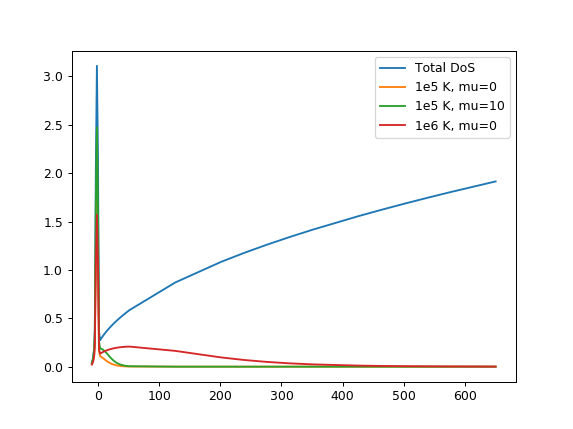

In [29]:
plt.figure()
plt.plot(PAR.E_j,PAR.m_j/PAR.enax_dE_j, label ='Total DoS')
plt.plot(PAR.E_j,PAR.FermiSolver.fermi(1e5,0)*PAR.m_j/PAR.enax_dE_j, label = '1e5 K, mu=0')
plt.plot(PAR.E_j,PAR.FermiSolver.fermi(1e5,10)*PAR.m_j/PAR.enax_dE_j, label = '1e5 K, mu=10')
plt.plot(PAR.E_j,PAR.FermiSolver.fermi(1e6,0)*PAR.m_j/PAR.enax_dE_j, label = '1e6 K, mu=0')
plt.legend()

## Run a simulation for a single Fluence

In [30]:
%%time
fluences_joules_nm2, dA = XNLdyn.calculate_fluences(Nsteps_r, pulse_energy_max, pulse_profile_sigma) 
# These are just to get an idea where to calculate Fluences

fluences_simulated = np.logspace(np.log10(np.min(fluences_joules_nm2)),
                                 np.log10(np.max(fluences_joules_nm2)),
                                 N_local_fluences_to_calculate)


CPU times: user 502 µs, sys: 0 ns, total: 502 µs
Wall time: 383 µs


Simulating for  0.6495035682088592 photons per atom
Initializing a simulation where ['I0_i'] are changed to [41555.23829400282]

t:  -30.0
-27.991755802292317 10.898961551034935 -> 628.1464593137915 -0.03213100747442176
Photons impinging per atom this timestep:  [18.41665168] i.e.  [0.2014951] /atom
t:  -29.999722888868305
-27.991754979680415 10.898961230740078 -> 628.2133895843817 -0.032137584601298605
Photons impinging per atom this timestep:  [18.41818278] i.e.  [0.20151185] /atom
t:  -29.999411144002107
-27.99175405425733 10.898960870414319 -> 628.213231498546 -0.032137600068690084
Photons impinging per atom this timestep:  [18.41990537] i.e.  [0.20153069] /atom
t:  -29.999116716003158
-27.99175317494503 10.898960529983823 -> 628.2130922968023 -0.03213761369131743
Photons impinging per atom this timestep:  [18.4215324] i.e.  [0.20154849] /atom
t:  -29.997644576008422
-27.991748547472106 10.898958827697717 -> 628.2245641308227 -0.03213885476043576
Photons impinging per atom this tim

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.837e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 1.091e-04 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -1.507e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 7.107e-05 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)


 10.894289094238951 -> 829.8095073393362 -0.05200029364803194
Photons impinging per atom this timestep:  [40.4597029] i.e.  [0.44266633] /atom
t:  -27.17521007745761
-27.893589840305122 10.894109912816937 -> 829.8095073393362 -0.05200029364803194
Photons impinging per atom this timestep:  [41.29721335] i.e.  [0.45182947] /atom
t:  -27.08109768241304
-27.88793263813114 10.893878425455231 -> 829.8095073393362 -0.05200029364803194
Photons impinging per atom this timestep:  [42.36514532] i.e.  [0.46351362] /atom
t:  -27.08109768241304
-27.89369622587095 10.893875768405149 -> 829.2216792120354 -0.05205164317095404
Photons impinging per atom this timestep:  [42.36514532] i.e.  [0.46351362] /atom
t:  -27.801565846172558
-27.926535186285367 10.895516180000543 -> 895.0345332874753 -0.05843710068867885
Photons impinging per atom this timestep:  [34.76530549] i.e.  [0.38036439] /atom
t:  -27.738294150351752
-27.922323593573516 10.89538014159564 -> 895.0345332874753 -0.05843710068867885
Photons im

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -5.599e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 9.113e-05 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -3.222e-05 under minimum of -1e-05.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:25: UserWarning: Found values 6.818e-05 over maximum of 1.00001.Valence occupation in proc_res_inter_Ej()
  warnings.warn(string)
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:22: UserWarning: Found value up to -2.674e-04 under minimum of -1e-05.Valence occupation in proc_res_in

t:  -26.41306863436634
-27.60931049282892 10.892067539836598 -> 4942.3755057724475 -0.3356881876092728
Photons impinging per atom this timestep:  [50.65329408] i.e.  [0.55419359] /atom
t:  -26.302955577403296
-27.568670875472115 10.891745649708545 -> 5103.274556837727 -0.33569181026313616
Photons impinging per atom this timestep:  [52.144978] i.e.  [0.57051398] /atom
t:  -26.165314256199487
-27.52566003030597 10.891320951907648 -> 5270.04843416138 -0.3349634699750216
Photons impinging per atom this timestep:  [54.06228931] i.e.  [0.59149113] /atom
t:  -26.165314256199487
-27.53572345974429 10.891311028724619 -> 5231.138171599387 -0.3352475860736935
Photons impinging per atom this timestep:  [54.06228931] i.e.  [0.59149113] /atom
t:  -25.92631745436147
-27.457513025794896 10.890561688117247 -> 5528.932321550537 -0.3324694013796826
Photons impinging per atom this timestep:  [57.53454526] i.e.  [0.6294808] /atom
t:  -25.80681905344246
-27.409873946790103 10.890135256206095 -> 5707.3510913

t:  -17.29444875757298
-13.172842964248058 10.806416410606019 -> 52779.92721742055 1.9760072510227666
Photons impinging per atom this timestep:  [371.58047] i.e.  [4.06543184] /atom
t:  -17.18090000149887
-12.724087023508586 10.8041821838267 -> 53873.52702861924 2.003226485497796
Photons impinging per atom this timestep:  [378.92512034] i.e.  [4.14578906] /atom
t:  -17.18090000149887
-12.752932018102936 10.804165421940922 -> 53803.94449164259 2.001335932006453
Photons impinging per atom this timestep:  [378.92512034] i.e.  [4.14578906] /atom
t:  -16.968157042389166
-11.897866748915328 10.79994647469176 -> 55844.89760979663 2.0484286842637625
Photons impinging per atom this timestep:  [392.94257088] i.e.  [4.29915285] /atom
t:  -16.861785562834314
-11.42720433110313 10.797676478582158 -> 56944.240508662115 2.071755333812921
Photons impinging per atom this timestep:  [400.07665905] i.e.  [4.37720634] /atom
t:  -16.32992816506005
-8.999005032984156 10.786139600749891 -> 62367.484836288924

Photons impinging per atom this timestep:  [1368.79249747] i.e.  [14.97584789] /atom
t:  -6.074290916480391
120.14125996270498 10.356887719997184 -> 228494.0621596504 -7.958232792949455
Photons impinging per atom this timestep:  [1378.52613253] i.e.  [15.08234281] /atom
t:  -5.929846472035946
123.50568468240462 10.34830575964609 -> 232561.62187030393 -8.410314733683666
Photons impinging per atom this timestep:  [1390.52943527] i.e.  [15.21366997] /atom
t:  -5.929846472035946
123.44113545782366 10.348312968650438 -> 232486.52462036718 -8.40233341935215
Photons impinging per atom this timestep:  [1390.52943527] i.e.  [15.21366997] /atom
t:  -5.669846472035946
129.55219827311834 10.332843151735261 -> 239877.77461631875 -9.239885954953152
Photons impinging per atom this timestep:  [1411.65696106] i.e.  [15.44482452] /atom
t:  -5.539846472035946
132.7990748853151 10.324962751144417 -> 243798.55073448163 -9.69176956719361
Photons impinging per atom this timestep:  [1421.9802815] i.e.  [15.55

t:  4.860153527964053
524.3696908643827 9.744474955755866 -> 638969.216311036 -78.06468613170547
Photons impinging per atom this timestep:  [1473.13752593] i.e.  [16.1174784] /atom
t:  5.510153527964054
556.8594599780075 9.720483122936926 -> 667233.5708641998 -84.34037236441058
Photons impinging per atom this timestep:  [1424.31500472] i.e.  [15.58331515] /atom
t:  5.625709083519609
562.6326033578091 9.716384428119154 -> 672227.8460556816 -85.4652167059062
Photons impinging per atom this timestep:  [1415.18030323] i.e.  [15.48337312] /atom
t:  5.7701535279640535
569.9977809361236 9.711465650429844 -> 678575.5465750383 -86.90011900475042
Photons impinging per atom this timestep:  [1403.58068071] i.e.  [15.35646259] /atom
t:  5.7701535279640535
570.1173126661583 9.711578754897651 -> 678668.3918745234 -86.91991556615626
Photons impinging per atom this timestep:  [1403.58068071] i.e.  [15.35646259] /atom
t:  6.030153527964053
583.3903075981535 9.702823601636721 -> 690081.0130734723 -89.519

Photons impinging per atom this timestep:  [448.48978827] i.e.  [4.90689046] /atom
t:  16.43015352796406
1168.2323336438305 9.653249806622743 -> 1168469.9500649057 -214.44541832531897
Photons impinging per atom this timestep:  [429.87974786] i.e.  [4.70327952] /atom
t:  16.560153527964058
1175.691175459206 9.655672519516745 -> 1174494.8868370212 -216.17164009973854
Photons impinging per atom this timestep:  [420.75966927] i.e.  [4.60349748] /atom
t:  17.210153527964057
1212.9003036749334 9.667956664784732 -> 1204661.9102110974 -224.8652084461609
Photons impinging per atom this timestep:  [377.02380018] i.e.  [4.12498687] /atom
t:  17.325709083519612
1219.4424229007195 9.670214191213422 -> 1209979.0594492205 -226.40529539148795
Photons impinging per atom this timestep:  [369.57520887] i.e.  [4.04349244] /atom
t:  17.470153527964058
1227.68672142485 9.673145282454554 -> 1216680.6114168027 -228.34908176404238
Photons impinging per atom this timestep:  [360.40338454] i.e.  [3.94314425] /at

Photons impinging per atom this timestep:  [34.10786319] i.e.  [0.37317137] /atom
t:  27.870153527964064
1771.890758765114 9.952338502498165 -> 1683715.1796735954 -370.9845207405936
Photons impinging per atom this timestep:  [34.10786319] i.e.  [0.37317137] /atom
t:  28.130153527964065
1783.9638416073958 9.959711249817914 -> 1694939.4048881487 -374.5586202076937
Photons impinging per atom this timestep:  [31.71302725] i.e.  [0.34696966] /atom
t:  28.260153527964064
1789.9054385314814 9.963370644867243 -> 1700478.346112559 -376.32414051423365
Photons impinging per atom this timestep:  [30.57167269] i.e.  [0.3344822] /atom
t:  28.910153527964063
1819.5107729656374 9.981626074836042 -> 1728283.9834123 -385.20928101677254
Photons impinging per atom this timestep:  [25.38784086] i.e.  [0.27776631] /atom
t:  29.02570908351962
1824.7226814051405 9.984851453793071 -> 1733213.8193260853 -386.78824977315145
Photons impinging per atom this timestep:  [24.55207321] i.e.  [0.26862225] /atom
t:  29.

<IPython.core.display.Javascript object>


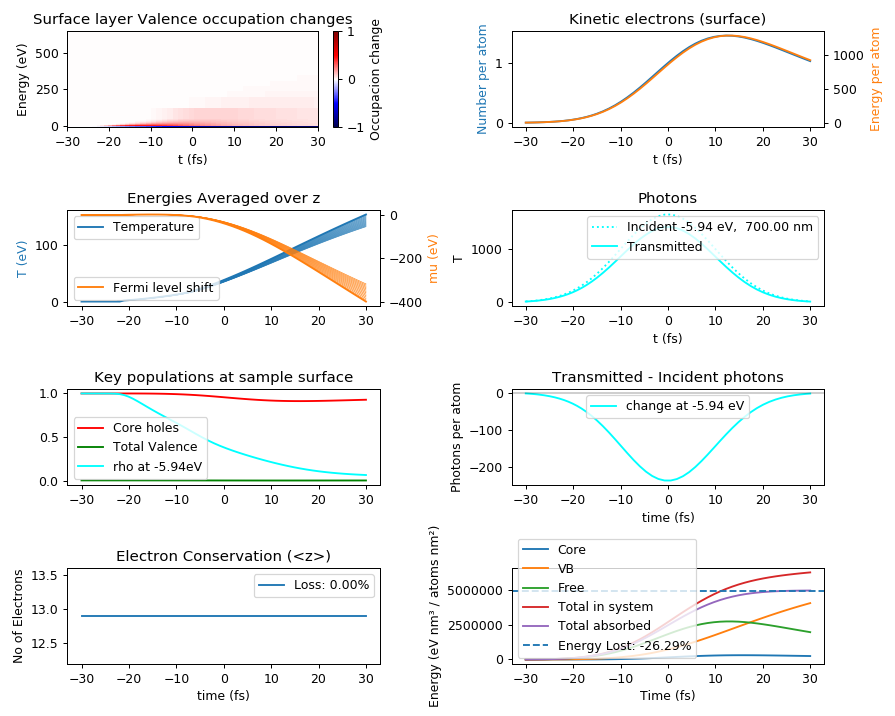

Done
Transmission:  [85.77980167]  %
CPU times: user 4.03 s, sys: 247 ms, total: 4.27 s
Wall time: 3.78 s


(array([41437.02404395]), array([35544.59704273]))

In [31]:
%%time

print('Simulating for ', 1.0*np.max(fluences_joules_nm2)* XNLdyn.photons_per_J(PAR.E_i_abs[0])/(PAR.atomic_density*PAR.lambda_res_Ei[0]) ,'photons per atom')

XNLdyn.run_modified_simulation(PAR, dict(t_span=[-30, 30],method='RK45', rtol=1e-3, atol=1e-8, plot = True),
                               ['I0_i',] , [1.0*np.max(fluences_joules_nm2)* XNLdyn.photons_per_J(PAR.E_i_abs[0]),], debug =True)

In [32]:
sim.par.FermiSolver.solve(449.6452969906646, 9.445639722867131)


(588858.0995857415, -69.41362754718025)

<IPython.core.display.Javascript object>


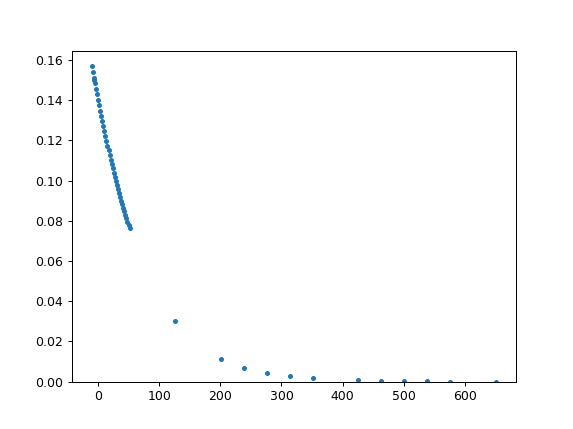

(0, 0.1645514389800773)

In [33]:
plt.figure()
plt.plot(sim.par.E_j,sim.par.FermiSolver.fermi(*sim.par.FermiSolver.solve(800, 9.445639722867131)),'.')
plt.ylim(0, None)

<IPython.core.display.Javascript object>


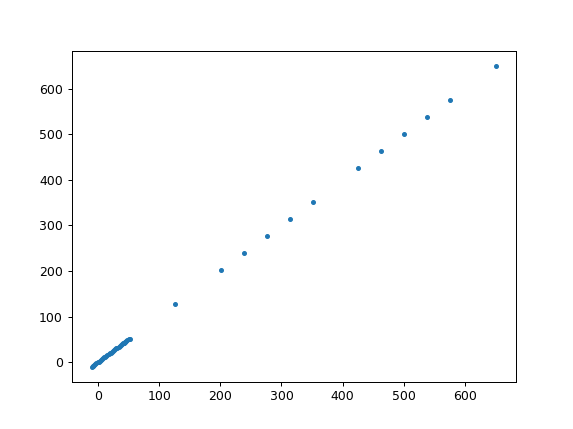

In [10]:
plt.figure()
plt.plot(sim.par.E_j,sim.par.E_j,'.')

In [11]:
np.sum(sim.par.FermiSolver.occupation(*sim.par.FermiSolver.solve(800, 9.445639722867131)))

9.445639722864199

In [12]:
type(sim.par.FermiSolver.solve(449.5452969906646, 9.445639722867131)[0])

numpy.float64

In [34]:
M = np.sum(PAR.m_j)
f = 10/M
occ = f*PAR.m_j
np.sum(occ)
np.sum(occ*PAR.E_j)

4025.552720657546

# Load a spectrum to simulate

<IPython.core.display.Javascript object>


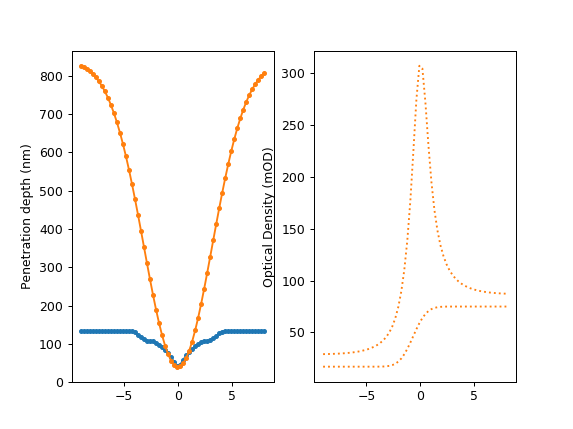

In [35]:
N_points_E = 62# 23
E_fermi = 850.7
Erange = 6
E_min, E_max = E_fermi-1.5*Erange, E_fermi+Erange
enax_abs = np.linspace(E_min, E_max+2, N_points_E) # Absolute energy axis to sample
enax_rel = enax_abs-E_fermi # Rélative energy axis to Fermi Energy, i.e. detuning

ld = np.load('../../Penetration_depth_deconvolved_spectrum.npz', allow_pickle=True)
pendepths = np.interp(enax_abs, ld['enax'],ld['spectrum'])
pendepths[enax_rel<0] = np.interp((E_fermi-enax_abs[enax_rel<0]), ld['enax']-E_fermi,ld['spectrum'])
pendepths = sc.ndimage.gaussian_filter(pendepths,1)

pendepth_simple = 40 + 800*(1-np.exp(-(enax_rel**2)/20))

ld = np.load('../../Penetration_depth_deconvolved_background.npz', allow_pickle=True)
pendepths_nonres = np.interp(enax_abs, ld['enax'],ld['spectrum'])
#pendepths_nonres[enax_rel<0] = np.interp((E_fermi-enax_abs[enax_rel<0]), ld['enax']-E_fermi,ld['spectrum'])

plt.figure()
plt.subplot(1,2,1)
plt.plot(enax_rel, pendepths,'.-')
plt.plot(enax_rel, pendepth_simple,'.-')

#plt.plot(enax_rel, pendepths_nonres,'.:')
#plt.plot(enax_rel, 1/(1/pendepths + 1/pendepths_nonres),'.:')

plt.ylabel('Penetration depth (nm)')

plt.subplot(1,2,2)
#plt.plot(enax_rel, 1e3*(25/pendepths),c='C0')
plt.plot(enax_rel, 1e3*(10/pendepths_nonres),c='C1',ls=':')
plt.plot(enax_rel, 1e3*(10/(pendepths_nonres) + 10/(pendepth_simple)),c='C1',ls=':')

plt.ylabel('Optical Density (mOD)')

pendepths = pendepth_simple

In [36]:
pendepths_nonres

array([588.51439792, 588.51439792, 588.51439792, 588.51439792,
       588.51439792, 588.51439792, 588.51439792, 588.51439792,
       588.51439792, 588.51439792, 588.51438486, 588.51430095,
       588.51392956, 588.51241039, 588.50666727, 588.48660153,
       588.42181171, 588.22844188, 587.69550917, 586.34076555,
       583.17217518, 576.3866056 , 563.19183508, 540.1780358 ,
       504.70120728, 456.97946233, 401.22613953, 344.1876871 ,
       292.06044694, 248.4033618 , 214.07948098, 188.28625668,
       169.56551181, 156.39582309, 147.43247764, 141.56202728,
       137.89004754, 135.71396599, 134.50121668, 133.86948594,
       133.56329494, 133.42562816, 133.36832043, 133.34624531,
       133.33838296, 133.33579442, 133.33500671, 133.33478517,
       133.33472759, 133.33471376, 133.33471069, 133.33471006,
       133.33470994, 133.33470992, 133.33470992, 133.33470992,
       133.33470992, 133.33470992, 133.33470992, 133.33470992,
       133.33470992, 133.33470992])

## Run it for all the fluences in the spot

TODO: Find solution for low temperature error
      and high temperature Error
TODO: Properly integrate FEG model following PHYSICAL REVIEW E 102, 063204 (2020)

In [37]:
sim_options = dict(t_span=[-30, 30],method='RK45', rtol=1e-4, atol=1e-8, plot = False)

In [38]:
%%time
print(f'I will run {N_points_E*N_local_fluences_to_calculate:.0f} Simulations')

timeout = 500

progressbar = IntProgress(min=0, max=N_points_E*N_local_fluences_to_calculate) # instantiate the bar
display(progressbar) # display the bar

try:
    mp.set_start_method('fork')  # 'spawn' on windows, "fork" or "forkserver" on unix machines
except RuntimeError:
    pass
with Pool(processes=100) as pool:
    tasklist = {}
    for photon_energy, pendepdth, pendepth_nonres in zip(enax_abs, pendepths, pendepths_nonres):
        for fluence in fluences_simulated:
            #progressbar.value += 1
            fluence_photons = fluence* XNLdyn.photons_per_J(photon_energy)
            tasklist[(photon_energy,fluence)]=\
                pool.apply_async(XNLdyn.run_modified_simulation,(*(PAR, sim_options,
                                            ['I0_i','E_i_abs', 'lambda_res_Ei','lambda_nonres'] ,
                                            [(fluence_photons,),(photon_energy,),(pendepdth,),pendepth_nonres]),)
                                             )


    resultdict = {}
    for key in tasklist:
        resultdict[key] = tasklist[key].get(timeout=timeout)
        progressbar.value += 1


I will run 3100 Simulations


IntProgress(value=0, max=3100)

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22390657577981035,), (841.7,), (826.0621002884052,), 588.5143979189709]

Energy -9.00 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.28682739106084787,), (841.7,), (826.0621002884052,), 588.5143979189709]

Energy -9.00 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3674298174417061,), (841.7,), (826.0621002884052,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.47068262987688053,), (841.7,), (826.0621002884052,), 588.5143979189709]


Energy -9.00 too close to others to satisfy the resonant bandwidth of 0.80
Energy -9.00 too close to others to satisfy the resonant bandwid



Energy -9.00 too close to others to satisfy the resonant bandwidth of 0.80

Energy -9.00 too close to others to satisfy the resonant bandwidth of 0.80
Energy -9.00 too close to others to satisfy the resonant bandwidth of 0.80

Energy -9.00 too close to others to satisfy the resonant bandwidth of 0.80
Energy -9.00 too close to others to satisfy the resonant bandwidth of 0.80

Energy -9.00 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2735.9633382703337,), (841.7,), (826.0621002884052,), 588.5143979189709]


Energy -9.00 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3504.806518616645,), (841.7,), (826.0621002884052,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4489.705165677

Energy -9.00 too close to others to satisfy the resonant bandwidth of 0.80
Energy -8.72 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.077774377572494,), (841.9786885245902,), (822.1581283438142,), 588.5143979189709]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(52.01230637039684,), (841.9786885245902,), (822.1581283438142,), 588.5143979189709]
Energy -8.72 too close to others to satisfy the resonant bandwidth of 0.80
Energy -9.00 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.62847702136898,), (841.9786885245902,), (822.1581283438142,), 588.5143979189709]




Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(140.0622857095074,), (841.9786



Energy -8.72 too close to others to satisfy the resonant bandwidth of 0.80

Energy -8.72 too close to others to satisfy the resonant bandwidth of 0.80
Energy -8.72 too close to others to satisfy the resonant bandwidth of 0.80
Energy -8.72 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15482.565359542807,), (841.9786885245902,), (822.1581283438142,), 588.5143979189709]
Energy -8.72 too close to others to satisfy the resonant bandwidth of 0.80


Energy -8.72 too close to others to satisfy the resonant bandwidth of 0.80
Energy -8.72 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41692.507874225805,), (841.9786885245902,), (822.1581283438142,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0037078175545288694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01351978172853574
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNL

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00868321208077738
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013278844424824854
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005422667947422077
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008639774047161541
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004343144698289336
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.36903452015854044
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04014017210464438
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4701741361411932
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003007800103866032
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004071296307422312
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005404295369461742
  warnings.warn(f'negative electron hole density found down to: {

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011360588503690039
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003099307095277837
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010673765620794917
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01605383075892952
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009728258346148877
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015905918329295332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00869029234778207
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08073758540090559
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00040997208057014234
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009714398948990066
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006427543476064557
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010210761268488078
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [95.82973829]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003993580158582866
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83001132]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2866375785294175,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021467447488348057
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2237584020862329,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002604989375942779
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010271318561815956
  warnings.warn(f'negative electron hole density found down to: {mn}')



Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022049999587545166
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03134657734565982
  warnings.warn(f'negative electron hole density found down to: {mn}')


Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Transmission:  [95.82990155]  %
Transmission:  [95.82996739]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.47037114825322257,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00440724558693617
  warnings.warn(f'negative electron hole density found down to: {mn}')



Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3671866649885403,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016721469497467112
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03336132914825596
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035026189502556093
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012025791730021496
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09427661891462868
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006810223237159185
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013458908293287664
  warnings.warn(f'negative electron hole density found down to: {mn}')


Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028697918301974212
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029145785849884476
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001350960814539004
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08665004413282329
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.82978241]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.602551884927417,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025210464798162135
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008301542338529089
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007855990533871093
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07689963063769323
  warnings.warn(f'negative electron hole density found down to: {mn}')


Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003481875110763255
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003821378796848407
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82977729]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012738926945372597
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7718772194635616,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008469679132228514
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00045806715735707826
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07132289286853233
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008704786208944881
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82922852]  %
Transmission:  [95.82967635]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002067560203808938
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9887852927363602,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00711136268090673
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02192137878291245
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06494232367958919
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03439502056173094
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82998124]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6225928083346755,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.26664750620728,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.26363112453092175
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019956391863907186
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2548170645544925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011078493267714151
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004557893217924658
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15232479924597175
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008242237798321561
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00384755620599897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [95.82806705]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009745701209897817
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004935629194243951
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005259412317471401
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001254752132302528
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.078563616757774,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09096348719429859
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3669576241703316
  warnings.warn(f'negative electron hole density found down to: {mn}')


Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0144487590808966
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004356419889934848
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010877235376787198
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08396557337552402
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [95.82590498]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007162511816058981
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06606077694651624
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2355860091220583
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00034297059142751607
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6626684690802787,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008700734986166303
  warnings.warn(f'negative electron hole density found down to: {mn}')


Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.21291798847342314
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029449796110583293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0033532022020033025
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004823961356991369
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.632315289586273
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013681819948221374
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02714922095691019
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011397565516544361
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82957979]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0552606516573837
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006599613656934622
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.410914787055337,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025366798401419643
  warnings.warn(f'negative electron hole density found down to: {mn}')



Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009867761431658906
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00031881456123628027
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82957991]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000807066431948833
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.26899906530728757
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82957975]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021719405784748957
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82957985]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2547004320961177
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.597297860288927,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.170215241181453,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.369428571245075,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019035318758569453
  warnings.warn(f'negative electron hole density found down to: {mn}')



Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Transmission:  [95.82958]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006895751507398629
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82957991]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.766295241261053,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01586129753002652
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.185143954839837,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]
Transmission:  [95.82958025]  %
Transmission:  [95.82958026]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.30844459303993,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2130969546056436
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005463511418337674
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.072785400556809,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]
Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Transmission:  [95.82957979]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.73438204651415,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Transmission:  [95.82958573]  %
Transmission:  [95.82957975]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.68508225895365,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.5890244

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19974122421991503
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01492722750961839
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958438]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.995096390029936,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(85.323750353987,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80

Transmission:  [95.82958184]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(109.30089312619437,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]
Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004567844400762411
  warnings.warn(f'negative electron hole density found down to: {mn}')



Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Transmission:  [95.82958137]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012827593527236836
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(140.01594150069573,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00034129251984271747
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81634751]  %

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(179.36233926004368,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Transmission:  [95.82958431]  %
Transmission:  [95.82958563]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00976028264297124
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(294.3328990705671,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008128340890303676
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82963623]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(229.76561382958775,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]
Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Transmission:  [95.82958187]  %
Transmission:  [95.82958745]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(377.044476026501,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00027369193994797314
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82959251]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(792.599703419282,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Transmission:  [95.82960637]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(482.9991392434028,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]
Transmission:  [95.80751795]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1015.3310785785978,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1300.6530215445139,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

En

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000179514047085938
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958135]  %

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Transmission:  [95.82978061]  %
Transmission:  [95.82973516]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1666.1543393522002,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2134.366534777744,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Transmission:  [95.82958951]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2734.1527715555685,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Transmission:  [95.82958096]  %
Initializing a simulation where ['I0_i', 'E_i_abs

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005855132122925433
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82967324]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4486.7340327616175,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5747.567763559106,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]
Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Transmission:  [95.82958044]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7362.71304594593,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Transmission:  [95.82959588]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004590476464827908
  warnings.warn(f'negative electron hole density found down to: {mn}')


Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9431.736279934537,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]
Transmission:  [95.82960047]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12082.18338798568,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00012917698418046797
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15477.442444131797,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]
Transmission:  [95.82961565]  %
Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Transmission:  [95.82958068]  %
Transmission:  [95.82958098]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25398.422676537775,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]

Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Transmission:  [95.82958247]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32535.727403272285,), (842.2573770491804,), (817.3373631837718,), 588.5143979189709]


Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Initializing a simulation where ['I0_i', 'E_i_abs',

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029200698424673988
  warnings.warn(f'negative electron hole density found down to: {mn}')



Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Transmission:  [95.82958067]  %
Energy -8.44 too close to others to satisfy the resonant bandwidth of 0.80
Transmission:  [95.8297002]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2865427664411088,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22368438875732027,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Transmission:  [95.77770451]  %
Transmission:  [95.82958043]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.47021556198615017,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001964519868982606
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3670652094045052,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]
Transmission:  [95.82961395]  %


Transmission:  [95.82958011]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6023525767877884,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]
Transmission:  [95.82962369]  %

Transmission:  [95.82959616]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7716219030062054,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9884582288566893,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.26622853289

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007598514380298127
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.72710484]  %
Transmission:  [95.82957984]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4097865471516124,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.661787729160124,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]


Transmission:  [95.82958011]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.367983280471685,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Transmission:  [95.79490193]  %
Transmission:  [95.82958967]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.595446423007945,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] a

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05675934384645842
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.65285363]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.067799723982969,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.22260133780782443
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.18773168158197695
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83002015]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04871239481118472
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.30205787304581,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Transmission:  [95.82958733]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.040539099733043926
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010889701964345022
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.726200570704567,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009196453955776285
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005049526230981094
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83352266]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.67460167635657,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Transmission:  [95.82960085]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.57559868476251,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Transmission:  [95.39281605]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012362769689047148
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.97789779487069,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]
Transmission:  [95.8304165]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.58439916472759,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005272425779739187
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.35064152]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(85.29552752641882,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004667798412023139
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.83058187]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(109.26473929743098,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Transmission:  [95.84979421]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(139.96962795074774,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]
Transmission:  [95.32468588]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(179.30301096807153,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]


Transmission:  [95.85727891]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(229.68961347478262,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]
Transmission:  [95.82988003]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008271587076995601
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010705326753742472
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006880537348323834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0101709372

Transmission:  [95.28450085]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02250618127829407
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04855178217033229
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013055359322204474
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02178692722402742
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2133.66054308811,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021695724195591293
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.70710897]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.035633772279282994
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015673612156441585
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002848403257745602
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014735819129777283
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2733.248386529166,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005415461845283964
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01363353042678428
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02273709183785355
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026784075261820917
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.6965109]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00019257863463817415
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010468133594564666
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007494197705200101
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3501.328628241773,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004757425039468188
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020677515523157997
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010156707534147102
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012004827819316333
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017612831478787783
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005652390901280668
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011068088214063465
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022706879428230575
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.41556785]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006885935619403316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010286101985893303
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00029542356197609365
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4485.249940461109,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006831440577144132
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01687003204158266
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00023461418309178583
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007438140484273159
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.80239567]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5745.66662099031,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002108084149078593
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02238422561190534
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007211732302244034
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006939366419458359
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007772369829225134
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005394995283412474
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.037338286382350816
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006150487716844566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.82957979]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02036957948505247
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003947037126319497
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005325988901188516
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7360.277656269931,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0033206501605680394
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6127933649034818
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005690341357218909
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004830729637371078
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [95.81340835]  %
Transmission:  [95.82957975]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9428.616512395103,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003573534665827438
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12078.186923027313,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001730113700487479
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00334545034038225
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007916321191749454
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.035369719200327054
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010665818748654132
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005238601829224976
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008823251953504752
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006773602086067143
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001979344126825211
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004635307513036757
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [95.8295799]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029799837526581108
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002895839769611719
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00260358688275808
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15472.32291776915,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006667804073714478
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021731681008759995
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010928038608987833
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.8763640168060878
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002423465552320092
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021815076113571585
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01522647984425518
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [95.82958024]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022390743817495284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001499759904102227
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0052935397830951025
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018406173861871267
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Transmission:  [95.82957984]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19820.25762619381,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09452512105008282
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08711640863750958
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25390.02155374688,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01365653320581961
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.040801219140578215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.820494360862206
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020702313869231936
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007624227208555823
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005066918400907561
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008756861668527183
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: 

Transmission:  [95.48448959]  %
Transmission:  [95.82958042]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41664.926328507594,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]

Transmission:  [95.67643064]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2236104243754991,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32524.96544988301,), (842.5360655737705,), (811.4367632715171,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00014005766422986454
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029012945887179065
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010091873886022285
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006451113231595862
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:52

Transmission:  [95.82957999]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011258303270311742
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005259890699194081
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003931383287833157
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03485213064355275
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2864480170546948,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00464873179272951
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2071319332483772
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13675564103253812
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0038534072286715

Transmission:  [95.82958065]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36694383414245635,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016309247166597096
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009231797640490758
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0037452206661354737
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012779980254720158
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [95.8295801]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009610478329040717
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.47006007861264243,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006826297674271231
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005017187657494482
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1580851757963253
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017226091091190998
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09421088630284347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00031268929028493986
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [95.82958094]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004214498287026913
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6021534004562259,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Transmission:  [95.28150303]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0946998962550123
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012196759560105797
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1340471870345059
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00046063412029173634
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [95.60644815]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7713667553967876,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00018035064670307577
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9881313812735406,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002452934884656255
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002453707422684914
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011790454716970267
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12365338786412527
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00300931050340969
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011345317573698832
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00023340470482224873
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01720602251006076
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06067069514097945
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958132]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.265809836664918,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024954583623515436
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004971322143604073
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010716713790315247
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05523349895

Transmission:  [95.82984114]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026426731301308237
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005037847395668038
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.621519742174961,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006549238252450351
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022567128382281698
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016256213021303978
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018218669616676397
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [95.82958321]  %
Transmission:  [95.66160648]  %
Transmission:  [95.82958242]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.660907571697995,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.077189004306333,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027563180424903244
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008547820286910479
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10973210311784731
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8295818]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.366538945509642,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.408659053384598,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2058644474525062
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06454835542533433
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17742363680890572
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006902501734343147
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958719]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002798562485825329
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00575201220057453
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.593596210134394,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005547962477691293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004535905576492638
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04758350144268464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017093261279850225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.82960007]  %
Transmission:  [95.82958932]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17048804570407272
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.179069561375615,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.165473376621437,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003436591279514456
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82962281]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.758513860015094,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003405972190424933
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958552]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.062817344576963,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03161009370628065
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002978307194121399
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82965086]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0483156214081486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024145185455251017
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82963507]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011912667389444298
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.718024505534537,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.295675376768855,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.032154957847058796
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82959206]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.66412802486288,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]
Transmission:  [95.82959557]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.56218179371162,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008153782920228725
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010115030295615224
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00038754804346474714
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.041258736948736274
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [95.82958422]  %
Transmission:  [95.82977551]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.96071057362508,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]
Transmission:  [95.82960585]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.56238209884958,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009001668767387727
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(85.26732336339855,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09836454764998859
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022013143713346395
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000498559249653141
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82961328]  %
Transmission:  [95.83020392]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(109.22860937820916,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(139.92334502925004,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005291722005735799
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01393300489613214
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83020402]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018929170659687244
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010288020885600435
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(179.2437219115638,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07440131591216881
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0688911273580195
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003775066827973461
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007117211862790462
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82969747]  %
Transmission:  [95.8296712]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(229.61366338114496,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013571883825944653
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(294.13824846441327,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00031130545349888905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011338885218110661
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83020379]  %

Transmission:  [95.34771596]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(376.79512593333345,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(482.67971835799585,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]
Transmission:  [95.83020341]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026256013769709874
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(618.3193318572157,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.056146026816946026
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05148842139882692
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00022359494673551694
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82973144]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007632330875519955
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83020103]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1014.6596116426343,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00017318149926914828
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(792.0755349923236,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006005760993081921
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83020363]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1299.7928632005471,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007552879060894746
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83020234]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1665.052464729537,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Transmission:  [95.83020314]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2132.955018290593,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010954273688490446
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04240875301508229
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00034321528575453897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002238283474849112
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Transmission:  [95.83020177]  %
Transmission:  [95.83019733]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2732.3445995979614,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3500.1708648011527,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03161004515917609
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028464454836222064
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83019535]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4483.766829632487,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Transmission:  [95.83018957]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5743.766735700447,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023166363049939243
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83019888]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7357.84387718547,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]
Transmission:  [95.83020009]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020652767837614494
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.83020279]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9425.498808045495,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12074.193101043378,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016655071723378878
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014671511633069567
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83018542]  %
Transmission:  [95.83019282]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15467.206777092959,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19813.703779897238,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011685068595209902
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010127533058321259
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83018011]  %
Transmission:  [95.82990775]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32514.210613675532,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007911018152690907
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25381.62598685425,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Transmission:  [95.83017332]  %
Transmission:  [95.82471023]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006693262307755354
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41651.149235986144,), (842.8147540983607,), (804.2783630865779,), 588.5143979189709]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22353650889223037,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0050545111184781
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83013938]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004103652895323329
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2863533303079964,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028937828338158056
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002150558771135014
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83016463]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3668225391227413,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012568514170423484
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83012133]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006743057235145677
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.46990469803066365,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]

Transmission:  [95.83009835]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6019543558020201,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]

Transmission:  [95.83006912]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7711117764678677,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]

Transmission:  [95.83003205]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9878047497724207,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]
Transmission:  [95.83015354]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2653914172

Transmission:  [95.32291682]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5741.868106442719,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]

Transmission:  [95.63393505]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7355.411707095382,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]
Transmission:  [95.51492211]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9422.383164839723,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]

Transmission:  [95.59536659]  %
Transmission:  [95.82849074]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12070.201919412932,), (843.0934426229509,), (795.6715815600649,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] a


Transmission:  [95.90490875]  %
Transmission:  [95.63360016]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(376.5461054266296,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(293.94385514392604,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Transmission:  [95.86647821]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(482.3607196773642,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Transmission:  [95.63289143]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(617.910690177092,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Transmission:  [95.82956714]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are c

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.404303573557189
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82956672]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -16.894493983329863
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.6320898]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3497.8576333862197,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]

Transmission:  [95.82956703]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2730.538817649493,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -18.05334183762665
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4480.80354849903,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]
Transmission:  [95.82956649]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5739.9707319719755,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.36444342615817593
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2823918580703886
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82956583]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7352.98114440461,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]
Transmission:  [95.63179583]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9419.269580734495,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]


Transmission:  [95.63154475]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12066.213375518495,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]
Transmission:  [95.8295662]  %
Transmission:  [95.63151566]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19800.609081438153,), (843.372131147541,), (785.4166641624524,), 588.5143979189709]


Transmission:  [95.82956398]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029063383531009457
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008819712818447734
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003171393352050522
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00024815793242938256
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Transmission:  [95.82953476]  %
Transmission:  [95.68207046]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00018252128126494682
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.588052905824343,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.158372327857814,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002697535522949046
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002367893034771029
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007773084091446947
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.6656294]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029154184604323063
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0053043017485974175
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.169973020626099,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008854004434753815
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002341859634280574
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004758767802682584
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.63924094]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016291145280460384
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011688841112773574
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00914788489204943
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.746861066693702,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003816515880989968
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013400700887986616
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011184379911601816
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006838746249737682
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00032577149577495135
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00025909359469178384
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:52

Transmission:  [95.82954193]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.04788995669072,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002331981289318996
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002436070120181988
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009111069548304318
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005074086861478477
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013172410658901512
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [95.82951388]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.276553188383577,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00018997361858819062
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001454469660735036
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/X

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1019152684636433
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008939312098785734
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09601799367671138
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017414104419612997
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [95.82952559]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002562276790989415
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014426540263370313
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005814690536890765
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.693528720241844,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005232755979812431
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00027459600235424375
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005427741317229007
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82942445]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016743754045789316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005327862785389215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004406782955916455
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00018296402420059366
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.63274858831431,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00044822638695229955
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00045168222699398797
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00043896144980060114
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00034193142469263194
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py

Transmission:  [95.82947981]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004048419775339873
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01112008796451569
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0033734078030498438
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.521984305599275,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011551426121449992
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004648373348321577
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01058070829651303
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82938503]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.90921704065354,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031841795169693654
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00019874233342509484
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01580214971053895
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002052315802325566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [95.82933503]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024891541427889408
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.49641817765927,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00015216929256300915
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002549175766451306
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015130648809510205
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001983731315959858
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00127944100

Transmission:  [95.8292718]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00021658137256608256
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00014605573948456296
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00011905335889617064
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.5947867988889262
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(85.1828226766578,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010837307474220736
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003177443179871453
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004462541578686974
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00015885696565121066
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:52

Transmission:  [95.82949891]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(109.12036284084738,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00025284017519000557
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02795750776226047
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.032644532102951374
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82919212]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001510387507348554
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(139.7846797319281,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00011383826517619156
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001688319315011455
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014633034140141277
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2188591542264744
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.82896773]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017110149731953683
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002443019132690516
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(179.06608976600035,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016114656588728238
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002046271176872949
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12875394807233143
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01565717139

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003524944426418486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014008326995735843
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00020590998460701115
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12799020191560828
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [95.82945546]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(229.38611416914407,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016747313800280494
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08788067494433793
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82881394]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001243708613718475
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82909221]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(293.84675480644967,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(376.42171856406213,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006119456315412108
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08290352497735753
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008584281196677424
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0043303092993278725
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003613262533599837
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005155477655760521
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0206736325

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005024086912497339
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03424207411570457
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000314164161252517
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00012469883448673613
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [95.82862607]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018032535464200805
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.23002507628729063
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09077845068719359
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015184318205

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(482.20137840233366,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04767682759143277
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010204883216158755
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00023723771208894462
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00042397817

Transmission:  [95.82840006]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04851265725696141
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001548193166343026
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006569884694193284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003178503826406498
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(617.706571820826,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02517351813561408
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017440299232815093
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.074798878946849
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011328608842021026
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.146625810900775

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001249533120262214
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017605692076939405
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.30027724081851304
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -5.043589869573694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [95.56393866]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014433659768640084
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012404186906977088
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06683684185251959
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0628022192533475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(791.2905809909865,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.060602420614682906
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05370371536679208
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000540292469969117
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003934785777205185
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [95.82957973]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1013.6540748131681,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0061446826996949255
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002579787325531768
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008157796389456351
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004552159797208688
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82813388]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030170517237811723
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1298.5047567462952,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06404357706959818
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.25803046229295745
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00032750610282983317
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023395643456067816
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006289451762695464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00025169884968256895
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003733876911589107
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Transmission:  [95.82957976]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030264048126158016
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06652822634208189
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1663.4023827147728,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00040470639599332614
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002795679936191675
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000328922797498965
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.69144371624286
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06221841732195621
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00018852969898297545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026076517354804984
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023338549236410877
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.82957987]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0047408076056765225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00025846011576824424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05632827694044984
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82957981]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2130.8412406238012,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02002873078848655
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017787267181446076
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82957994]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.052349495168221516
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2729.63682144836,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009541712964344917
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3496.7021638953543,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007207537156057597
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5839010613095384
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1735231970719564
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012482929079755678
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00014095077180797944
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6625817939187001
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1637122610615931
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015197497176508534
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [95.82958031]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4479.32337625147,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013373750167755993
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.426920584079953
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01603373169907485
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0777723706968354
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarn

Transmission:  [95.82749799]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5738.074611044712,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13391417450195142
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.48923457729625763
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00014575231599511795
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04636908200216716
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [95.82958003]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7350.5521875202085,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.30716549738760524
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011356293202515744
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00025674238291228946
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009878610479335137
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006088750703608703
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82686688]  %
Transmission:  [95.82716202]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07202170086263582
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006294776530504365
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12062.227466746048,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.036315978413527183
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9416.158053689229,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06717411768554626
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8278298]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2863004649726957
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.683014980565197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004342426248671316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01738873652436901
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958205]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15451.878635630663,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -7.169379279171704
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15644616156602176
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.270274337432002
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14816918956521796
 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008308292575557097
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19794.06822069077,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003611315509760793
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05477654946646471
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958152]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05057744989788837
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.21120005238397344
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -7.63494314668381
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01292054998780312
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarni

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25356.472566506516,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]

Transmission:  [95.82958016]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19981319141048903
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005023901565346378
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007114320453792011
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32481.988737611948,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12168365260506508
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024827824918958186
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958363]  %
Transmission:  [95.82958274]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41609.87257131377,), (843.6508196721312,), (773.3093633553439,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003644245302361071
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04641567565007865
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.042618228778429135
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22331505534930948,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07713250266864335
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.82958476]  %
Transmission:  [95.8295811]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.286069645285634,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]
Transmission:  [95.82958621]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5770168077562712
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3664591347226523,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.46943917201556323,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005890707171066545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004927666462501534
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.21160133018804128
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016673295846914016
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00022959527136912072
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04010215111488513
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.82675449]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.601358010599039,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03664857395729104
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.1288498380151886
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958051]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.770347850093008,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001995830781154062
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958077]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9868261496205474,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00397247235814735
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.82959045]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003196467366747946
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.035055615636714776
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009624687639959717
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82960246]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2641378170359534,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0344473553732092
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028288610242919177
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6193778621238362,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03133295040435602
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3463320265743155
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3253528053744654
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82960891]  %
Transmission:  [95.82962783]  %
Transmission:  [95.8266899]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002449485520116035
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0744452266174025,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4041565248999697,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19897057103539773
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003246419787217292
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19339134139252767
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6573927548891274,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018244209107702858
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029139067835473043
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026371138329652766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012406953349242578
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82959351]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.36077114483686,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11145116312239
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82842581]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.586207578454545,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.036632162178492855
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012432525984324982
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10538709780253619
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024188337737543364
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us


Transmission:  [95.82958807]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.15600843821639,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.29855688323649865
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021769205562956806
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82879606]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.166944845610496,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2822894466369439
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00030644002654511837
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06535132668046373
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4769701799420

Transmission:  [95.82959743]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.742981933013168,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.033390085319998875
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015726876999338835
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.30147989119021457
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82724577]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.042920733302397,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013964662628126234
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2837649155652997
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012321484476749411
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010846542678397242
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009455951321068135
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83064484]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008233465610189228
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.27018754514551,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]
Transmission:  [95.82961719]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.685374244045516,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0070813431534046956
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.84841879]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.622302592591698,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006075736337682436
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83434593]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.50860284197002,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]


Transmission:  [95.84006306]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.892075202420386,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005135313567109279
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0043127764246575495
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.87605085]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035531935365229472
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.47445924804195,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]
Transmission:  [95.86013284]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(85.15469298698395,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00288311892950599
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.82985693]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(109.08432832300258,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002274268262579149
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82707375]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(139.73851902090135,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017298643774266154
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.8298932]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(179.0069572627802,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012446706268178787
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008107291529615424
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82957972]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(229.31036462241252,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Transmission:  [95.82970685]  %
Transmission:  [95.81813624]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(293.74971859932896,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]
Transmission:  [95.79677584]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(482.04214236496665,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(376.2974138533589,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00043571637997708024
  warnings.warn(f'negative electron hole density found down to: {mn}')




Transmission:  [95.8295798]  %
Transmission:  [95.89719244]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(617.5025882754487,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]
Transmission:  [95.77932187]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1013.3193386109015,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(791.0292752748139,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Transmission:  [95.82957975]  %
Transmission:  [95.82348877]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1298.0759550853552,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Transmission:  [95.72746596]  %
Transmission:  [95.82981581]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1662.8530819125895,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2130.137578770865,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01743187026468984
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2728.7354209746854,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]
Transmission:  [95.82958001]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005121885487806566
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82957985]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3495.547457539524,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4477.844181590346,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021496665163844852
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0043891581792534495
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.37701412115164745
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010592464739121787
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.46882745244719537
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00526935316857

Transmission:  [95.82958012]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5736.179742419064,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09896347264171634
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.24465379166772383
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958027]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7348.124834851334,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]

Transmission:  [95.75595932]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07641691336304213
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0051376865819907636
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01733793976086595
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.8608026705364393
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9413.048581666028,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013213397830323714
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.9300796265700741
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019959867411600385
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0042446077662017245
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014091628349458318
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82957992]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12058.244190485024,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018586520307438903
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014008345493241592
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.22543411849402695
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0036411473438171527
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.82974897]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004400849368973336
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15446.776004169995,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.24456169288330543
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01694122447193358
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008450308459957867
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05184910729403

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0038510398853435213
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015228457477464374
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014941638809683688
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.9613523911839987
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [95.82958191]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015977001848245465
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8295807]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19787.53167988436,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012523796807513143
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25348.09916818386,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02216056107332065
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003689032639242029
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019300563119513114
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00457910928111005
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01800664965949217
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004643900803857015
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007823981356477105
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006430132323925086
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [95.59885183]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32471.262299646314,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005422384675533465
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0067859058213075585
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00913446646699878
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004067369487410488
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.82958046]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022486044427632024
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41596.13185732918,), (843.9295081967214,), (759.1469131906231,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003409155293064181
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007576434158957923
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008135446472707919
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012141612925216094
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006446011314203304
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [95.82958256]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22324133497614115,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00675684793109621
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005698363583335642
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958339]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2859752084776472,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006501168567165649
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029499897847564682
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007188588370768301
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000395340254047305
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002726864947992347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.32825158]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00029757341222325095
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3663381598778509,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00019198397937092437
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018537078311329225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032226045368126677
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012954427931850532
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:52

Transmission:  [95.477549]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026768676455368734
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005101140413235505
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003739803853120449
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031233740797622644
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.46928420158203515,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004648346898336264
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8295814]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6011594913506175,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


Transmission:  [95.82958101]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001395654206819863
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7700935442160959,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002346584912378269
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004245301080902486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015167353553682261
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023487204341865464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [95.80937765]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005478868047146257
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015318347477490946
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002169747804114941
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006114503219292189
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.98650038030827,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028228885215408894
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002446710048147338
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011680360875283569
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003911110890376435
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [95.82958446]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008983171052125982
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.22197962305513386
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001592565077205066
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006017704915466382
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2637205020839348,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00023713060283814258
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012776298277801246
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027401989973414587
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004141224940790167
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:52

Transmission:  [95.54237601]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6188432759531475,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00019139990155903064
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.28679000252196796
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15821424465409173
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958583]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001757824049930079
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0737604144089987,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00015372158875592845
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003019630049436728
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14857387248221698
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.39887497738074207
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.82958758]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.656515501068337,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.8258223574273451
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014464974600905123
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018227386253091282
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1651350500513491
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [95.24568021]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4030327507372893,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0036589610368364944
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009716879021244296
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003900501731211037
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001100872

Transmission:  [95.82958982]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007765529305618912
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.060731924178826446
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.359331574738927,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00020443248193213748
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05550484390741772
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005974845949729968
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002236747226866953
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.9067944834280173
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [95.82960722]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.5843634694371955,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004160066231353454
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04977389108453956
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -4.016505067397688
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00027305397577226387
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8295964]  %
Transmission:  [95.82960114]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.153646109301146,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04518405681229254
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.163918669906513,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.032689037244537644
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -4.287880386197898
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000451331452762993
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00032493006910394584
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [95.829638]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3478087923919041
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.30036361558341396
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.375102566235487
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.258182694086984
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.739105360478206,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000758497868356578
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.358060156095281
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8295927]  %

Transmission:  [95.82962508]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.037954790776642,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.26382610473734,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.058180678382178996
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.099699069290616
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.053013958057393396
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3617457807091844
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82965464]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030501783592864484
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.677225151731857,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.5403989712389259
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.027871613361253544
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017218086096931096
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4281955926558245
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [95.6488146]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.611863493696546,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0706233731001662
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028796754783811274
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02294971730852069
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.40599418]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007535880303747078
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01497906905677926
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025610123853135214
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.49523021327121,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1300138226666796
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030547393233407938
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11992843962241206
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.08351463]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.87494468185419,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020263083395703596
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02590686169971068
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14921088520379566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022563796965222593
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [95.82970384]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.45251481651106,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13132120097724087
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09221913610607757
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08448965091173566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01876327651025189
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013348431206372524
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08408329776761292
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016824037466767194
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010971636971156329
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [95.82961503]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00021540254337804043
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(85.12658186955741,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006257512121034203
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013641922374166171
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003986375760624661
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82973978]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011956518440054964
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.065203878546229
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2469763301116119
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010207675304030772
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(109.04831759646105,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05878053387735793
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.20600802321320533
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8296761]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011376821599893283
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003449060656862457
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009675261821476155
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004327308692875675
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(139.69238878686002,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0067357630298818805
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021452050862021288
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012028085459601101
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.059573110819607145
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.16209073]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000804436336462544
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(178.9478638009959,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017055278007427788
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030815414976983035
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022740660785647293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02701351213391856
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020805994335972855
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030336874320084917
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010457211341963202
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031518540008885765
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004864424833514569
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004600539288525773
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0069047389372141055
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03273708007816456
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012291101725976361
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009244761091726339
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004388172481847086
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015184689526774875
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.69195457]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(229.23466508829517,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011589352153134058
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08735497619793975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0036592183588251004
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003483817133723477
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009990422394681175
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019090863225587285
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003153832117268607
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82957971]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002121241413734154
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(293.65274645905225,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]
Transmission:  [95.82957998]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002751144667339389
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00026538628094385786
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017744632833682772
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82957983]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00313198237107315
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.037673870740191795
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(481.8830114610407,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003999997393222543
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(376.1731912131604,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03513963760127048
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01820445221151612
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008965495669031043
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002685117717353691
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015312117988095508
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009683663627333416
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001249055052058079
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005346492891624699
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [95.82957978]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014381972123400644
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.7373128912919801
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002047228880384111
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.027689489666827605
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: Us

Transmission:  [95.82992695]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(790.768142082208,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(617.2987394074497,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00015185268164952248
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025514983587245688
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.299450601751608
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016403728619795999
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001611752134484945
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00107015531848

Transmission:  [95.82958022]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1012.9848234136872,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002372535288850841
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013235648691312107
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001998125251870597
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008559012840851921
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [95.8295799]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001190085172752653
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.4914034620454153
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002609332658085606
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1297.6474365349152,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009754437824547324
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07219569216888644
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012733909306001934
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00012818136688341752
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [95.82957974]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004439161339604425
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007083401601013506
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1662.304143778835,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001336397807922829
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031699532480020665
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958039]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005372944075006103
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002987247362113976
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004443176974964658
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958008]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2727.834615638488,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017302319072323158
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021338401922257333
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008381204895897554
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2129.4343815011543,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Transmission:  [95.8295809]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3494.3935135629554,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00036615391452432533
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001418628384802112
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006678926636887184
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035113729784175263
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Transmission:  [95.82958174]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020819082345795437
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017349573901892512
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4476.3659635475,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]
Transmission:  [95.82958127]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00042347549720744837
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0178879994828689
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005618151433139928
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00025700595667865755
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958062]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5734.28612485481,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7345.699084809245,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002856447209573787
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001144173549419314
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011949138224203182
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0033968272411977196
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005735163304387392
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [95.82958409]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9409.941162629695,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00019859467957061838
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015048414507221608
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00242709620767112
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.0396591809533868
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.82958234]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12054.2635441283,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004795862494662906
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001373884135773551
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.428464914800875
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02566923058630799
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [95.82869012]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000350992788751725
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006094261391303313
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.9605554640114526
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958698]  %
Transmission:  [95.82958311]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19780.99945474065,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1279763227299151
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25339.731298284256,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006195149269689892
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00041949849472455725
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15441.67674165277,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


Transmission:  [95.82958536]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004798188704460138
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32460.54294366634,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004430298917990072
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002823336258845899
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.0275764028364218
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05660809760339114
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.1137132080031265
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.1410892344594061
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarni

Transmission:  [95.82980476]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0033044244707385317
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.24017295362798396
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41582.40021546524,), (844.2081967213115,), (742.735289366971,), 588.5143979189709]

Transmission:  [95.83204162]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0101285965288751
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2231676632597901,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010586206403102594
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008364912874534447
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958906]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.28588083399970987,), (844.4868852459017,), (723.897667343623,), 588.514384856016]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07871788608236763
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028532485668470997
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009258768913644744
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4575406115798879
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0054187616148402284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.82959515]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002785388394990207
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001993210861863659
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07433544486953814
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019042666051296564
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3662172648786969,), (844.4868852459017,), (723.897667343623,), 588.514384856016]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016013845322424558
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07057849985166076
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02253217013921649
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.053412591845567015
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82959173]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17960103635977287
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.46912933343187524,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010088076127665602
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00020342983533039316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013175771056710417
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09441148438767577
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [95.82960518]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6009611031285921,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010085822287475565
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07715497674635863
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000246458058113852
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001477253798163325
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.82959954]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026452880486542263
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13022624954800932
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7698394061857918,), (844.4868852459017,), (723.897667343623,), 588.514384856016]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007851949458821395
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12257959544742025
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00033211902583474284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013108247723983446
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000539578089552073
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010797847139916605
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82961243]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002656687720947737
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9861748260097973,), (844.4868852459017,), (723.897667343623,), 588.514384856016]
Transmission:  [95.82964929]  %
Transmission:  [95.822017]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00036477909582899315
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.43380533]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00599109319496538
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2633034625675457,), (844.4868852459017,), (723.897667343623,), 588.514384856016]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0730760541893885,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004524673972811755
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6183090426192732,), (844.4868852459017,), (723.897667343623,), 588.514384856016]
Transmission:  [95.82963378]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016808677872859334
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6556388262513826,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05853794767589893
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00030963262911543055
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022596736606699253
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002469564793852186
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029979723448067652
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001218228957048595
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82962176]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.5504435378505699
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4019097182864555,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -5.57642824047761
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009917388389228066
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00026813086174115597
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -5.832065928200346
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Transmission:  [95.81444647]  %
Transmission:  [95.0154111]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.582520577566093,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Transmission:  [95.82966933]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.151285339566918,), (844.4868852459017,), (723.897667343623,), 588.514384856016]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.35789295478403,), (844.4868852459017,), (723.897667343623,), 588.514384856016]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00023234838243668676
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04778345696118613
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00652523485840284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00018012478747886362
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [95.80403557]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3433194557810646
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13090593479186374
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10473338063828663
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00020518612051656504
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.160894491534771,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Transmission:  [95.62054034]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.73523134655321,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001570852481913576
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1217837470553853
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01975592307010121
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.20278166189683589
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [95.74009194]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00017261882643992976
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06603616644478905
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.032992125865304,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013050928859215105
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.76685196]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.257468862998145,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06911604955431994
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.054791769987331485
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.059410133503775775
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04945530439089474
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.78934353]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.669081437970675,), (844.4868852459017,), (723.897667343623,), 588.514384856016]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016452398497079912
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018571816104588024
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04007887564322132
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82957973]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.6014312848008,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12108119963632547
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014127440282242887
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.035769443379062515
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06418328504945592
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [95.8295797]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.481866410756055,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017464373532956046
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3175990883636084
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028402242483202222
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3025627004895286
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [95.82983066]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026717344373984986
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.22869620385012812
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.85782546775015,), (844.4868852459017,), (723.897667343623,), 588.514384856016]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019409105639774715
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82957976]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.21497114969190712
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016754292413179606
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82957987]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(85.09848930599118,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.43058486871308,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Transmission:  [95.82957981]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(109.01233063766874,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012599956950128721
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82957994]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010549399395602066
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8006804]  %
Transmission:  [95.82958004]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(229.15901551727814,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(139.64628899963108,), (844.4868852459017,), (723.897667343623,), 588.514384856016]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(178.88880934199537,), (844.4868852459017,), (723.897667343623,), 588.514384856016]


Transmission:  [95.78571648]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(293.5558383221915,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Transmission:  [95.56700541]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0074901083369711685
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(376.04905056221475,), (844.4868852459017,), (723.897667343623,), 588.514384856016]

Transmission:  [95.82958016]  %
Transmission:  [95.35439326]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(617.0950250834946,), (844.4868852459017,), (723.897667343623,), 588.514384856016]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005913742163597746
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958032]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(790.5071812423655,), (844.4868852459017,), (723.897667343623,), 588.514384856016]


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(481.72398558647075,), (844.4868852459017,), (723.897667343623,), 588.514384856016]
Transmission:  [95.8241194]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019571228770296045
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1012.650529002724,), (844.4868852459017,), (723.897667343623,), 588.514384856016]
Transmission:  [95.82958052]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1297.2192008146876,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01987485829846225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09374199707803266
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09487191620907032
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09052586266086093
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08933861517636554
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWa

Transmission:  [95.82958078]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1661.7555679544575,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0309418302261939
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.53818466367193
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009409896516463512
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009215022730684197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [95.82958111]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005535217265486114
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011906450911757016
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016021225840892495
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2128.7316483547193,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.034452621841673636
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15998154137406312
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013696231124097125
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.03817494]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2726.9344048505645,), (844.4868852459017,), (723.897667343623,), 588.514384856016]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005635801007977115
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03856775043967353
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02830194439856637
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.35356108700854

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17637822571578682
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000914499437112859
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03176664749305225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.4973793152923291
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [95.82958153]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008886868182331753
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017526473012638988
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3493.2403312108713,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005813649016230826
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007553386538095008
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012404782473832476
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.4059032685060449
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [95.83000712]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4474.888721156053,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010764268258753429
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.624322070835433
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958207]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00908767821127432
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016282455781491567
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012830341260347655
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.5571296602959461
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5732.393757113364,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001982891774959139
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04417116205904126
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0048267312544938434
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003349395486233142
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.82958276]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03636014193022463
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00085972472210738
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008918196842926385
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7343.274935807295,), (844.4868852459017,), (723.897667343623,), 588.514384856016]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003875457520828629
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029963404703079455
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.82867736]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9406.835794547716,), (844.4868852459017,), (723.897667343623,), 588.514384856016]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003159180903575365
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02107364291795122
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029969066802092215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.041661127375043794
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04397423369602205
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.70193445]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007570401378548919
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008575337546417039
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06454907157873935
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0344584390313063
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12050.285525072202,), (844.4868852459017,), (723.897667343623,), 588.514384856016]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01825090900916848
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007280078983104676
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03599650041035396
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007005653607775386
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0409709260803

Transmission:  [95.35684863]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005728664449101917
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15436.580844743636,), (844.4868852459017,), (723.897667343623,), 588.514384856016]
Transmission:  [95.74184624]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014862055547594899
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0047797103031217425
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009659045803095179
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19774.47154098702,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03727724228528251
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025201600871462837
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008219270585847482
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005678553387157503
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.8295848]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006132424570273631
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25331.3689513344,), (844.4868852459017,), (723.897667343623,), 588.514384856016]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005138423805433057
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008259604706783996
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958626]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32449.83066266066,), (844.4868852459017,), (723.897667343623,), 588.514384856016]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007934750327767137
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003808910483555916
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958365]  %
Transmission:  [95.82959054]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014881588045358995
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4897888306812003
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00058665016389714
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.27614956]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22309404015210058,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009312197715966253
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82948488]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41568.67763674031,), (844.4868852459017,), (723.897667343623,), 588.514384856016]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010468538187442533
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3660964496461668,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.403991425510028
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010299924076617728
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003089167992937014
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005791960843140043
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0038687053230379576
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.285786521790134,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004855759903849677
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00316177684402863
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005899504283565005
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.530457717583843
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008780984136792735
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004091539705902925
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958814]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00793484497332031
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2087985370072314
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003342642652202521
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006834444241627935
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.46897456746385346,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008742530558016881
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00033234042635221783
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82984937]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.0837529459872606
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03633134383404535
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6007628458032853,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004933134522123961
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01327096142906381
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018811331037644763
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006405196382755385
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.8296027]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025544977536950952
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020020577507153803
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003156835750267817
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014041686227050931
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7695854358359779,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]
Transmission:  [95.83090366]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009610869820080303
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025858192478822595
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9858494865123295,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0042315325896660205
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021711928104112932
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026405047247656466
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020296167160198664
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [95.82959363]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2628866982141864,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002539574216323004
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011219603998959826
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019740709355140496
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027376942859209663
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [95.8296177]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007418816218596191
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.30355481929680384
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004100277169500899
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001479446866969436
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6177751617730103,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11121816097573856
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000377007622224923
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.29247276739895023
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0064454343369049205
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10430805984792713
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010333370675859044
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005843044262308084
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [95.81145568]  %
Transmission:  [95.82960926]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00022862903134601709
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005191683646004197
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.072392145511237,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6547627298652228,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012718647057643473
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001619875907388657
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82962858]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.4007874268133946,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011503441040026097
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013506405792762521
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.16731304295051963
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006567213646690995
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1568406844935728
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013129138867462586
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004247604307956898
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.8295976]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005331070306436647
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023811695992237425
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.356455284031813,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12083579290290114
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10542370026154257
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11179185912952949
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007550619160507921
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82981894]  %
Transmission:  [95.10872077]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001242109251384349
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.148926127470583,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4906034816278799
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.507287]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.15787230851851,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]
Transmission:  [95.82966083]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011403273961554383
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000581932619937664
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.70762327]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003821958610132903
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.580678901636626,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08790821624235523
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.731359888705919,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4723732511659646
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.028032735324526,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]
Transmission:  [95.82964264]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.251115815772494,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.034160542678565164
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0803452812908989
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022292386632600802
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009266509294993952
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.26241684767391726
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006258601438213773
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.82981928]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.66094309743881,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09666900158695713
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00025159057598678203
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05613458515584613
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04187187571461193
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03715577035610007
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [95.18898024]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.59100595908542,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023492489813804696
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82981952]  %
Transmission:  [95.82968444]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.840717548918235,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.468511425689236,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009089342080199625
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01640831618607086
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.62115802]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013770960674485355
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.40866939031345,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]
Transmission:  [95.66721159]  %
Transmission:  [95.82982138]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(85.07041527792244,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(108.97636742310267,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]





/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12108273692509908
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6069175371859421
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82975539]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5745014991407622
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(139.60021962908124,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03321498438934789
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008807888647978768
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.82982073]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(178.82979384717743,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006853644645525403
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.82982639]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00835464327156199
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(229.08341585991286,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0033799262370757255
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007661969785505818
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82980821]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2303531082622472
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019367391179518911
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(293.45899412540246,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002413845469790399
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05482728290076766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.0689716964123956
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1953514297542216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Transmission:  [95.11689562]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(375.9249918193768,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00118393629878355
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1677685605568766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.0317436921541177
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009970072848481948
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [95.82987802]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(481.565064637309,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010824505926067651
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007008654813449589
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002132415673705701
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.046904210263702506
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8298315]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03999897374066119
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4257110276831688
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005626702246877002
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006999663333685735
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82983988]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(616.8914451704251,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09780643254814025
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.05075528]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(790.2463925847087,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1012.3164551594997,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08603701507670092
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82971519]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1296.791247644755,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.5395487805541848
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035047791570033127
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00035335690704219047
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.450622119358603
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [95.5866319]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.043918052540088404
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1661.207354080879,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03678493931656179
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010238359863423696
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009944595467206163
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82982863]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04024390169727132
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002235598436852726
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2128.029378872216,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.036299663405712224
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008413867716748236
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025773935075450893
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00464604918575251
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022999501476725914
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82986354]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2726.0347880224904,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016007254007887717
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82989238]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3492.0879097294905,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]
Transmission:  [95.50709762]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014093868951976951
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4473.412453450401,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]
Transmission:  [95.46074559]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5730.502637957775,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009526212983166804
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82991273]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7340.852386260934,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008218207176202252
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82987621]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9403.732475390256,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Transmission:  [95.82993749]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005245311519213036
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12046.310130716483,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004352774854765151
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.82981992]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15431.488310111647,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Transmission:  [95.82999381]  %
Transmission:  [95.8299892]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25323.012121868225,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19767.94793435647,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Transmission:  [95.82996506]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32439.125449627165,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]
Transmission:  [95.82994427]  %
Transmission:  [95.82937218]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002414402959569628
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41554.96411218457,), (844.7655737704919,), (702.4839009855663,), 588.5143009475719]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2230204656049804,), (845.044262295082,), (678.380747083319,), 588.513929559305]
Transmission:  [95.82977486]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.28569227178731266,), (845.044262295082,), (678.380747083319,), 588.513929559305]


Transmission:  [95.82982034]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001803656109552687
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3659757141013416,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Transmission:  [95.82981913]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005494966419927749
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4688199035768733,), (845.044262295082,), (678.380747083319,), 588.513929559305]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001422021743540114
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.82855555]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.6005647192451914,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Transmission:  [95.82982503]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7693316330007551,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Transmission:  [95.46539475]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9855243616033479,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Transmission:  [95.82982246]  %
Transmission:  [95.83026437]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.617241633065616,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Transmission:  [95.82982358]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_


Transmission:  [95.68663806]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7338.431434587697,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Transmission:  [95.79652784]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9400.631203130162,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Transmission:  [95.64343028]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12042.337358464334,), (845.044262295082,), (678.380747083319,), 588.513929559305]

Transmission:  [95.5135841]  %
Transmission:  [95.51354244]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19761.42863058765,), (845.044262295082,), (678.380747083319,), 588.513929559305]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to


Transmission:  [95.10301075]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(375.67711973398,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Transmission:  [95.40798323]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(481.24753710010486,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]
Transmission:  [95.44220131]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(616.4846880451863,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Transmission:  [95.37241873]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(789.7253311347655,), (845.3229508196722,), (651.5224628857144,), 588.5124103903298]

Transmission:  [95.35463451]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] ar


Transmission:  [95.8294998]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.23208179970469,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Transmission:  [94.38031293]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.636560262092758,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020270009057374416
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8294332]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.559771212965895,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Transmission:  [95.82885051]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01610257949995475
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82935207]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.789461452376344,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.428499287998726,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]
Transmission:  [95.82900412]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.34300962844236,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Transmission:  [95.8292939]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.98630422343655,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Transmission:  [95.82865545]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(108.868620009997

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004935679027768813
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0039107494092656125
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8294828]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(139.4621937167696,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06380930828574716
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.21480348492135892
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82946104]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(178.6529807625717,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2017366316975746
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00553608052821275
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82912486]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(228.85691587621986,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]
Transmission:  [95.82939759]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(293.16884454327555,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2826118656824862
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3999998864236741
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008404130686264999
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022247407017361276
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002191134933813288
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [95.82956581]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029614734279560295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028315746511280437
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(375.5533062296659,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022507726355139646
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002303069895372545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024198104061849968
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025141679848019294
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009751213139836068
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.82770431]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020524567893343004
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006212923856709907
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029430604107920644
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82809645]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(616.2815105675776,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008326994112427322
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01045824808759388
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(481.08893030485183,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00023683313842237652
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008959358826126973
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.82840838]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019051239779237505
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(789.4650580024474,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014905696472879981
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82956585]  %

Transmission:  [95.82921962]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1011.315554855455,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016133851410836897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006085442233673355
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1295.5090806430878,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]
Transmission:  [95.82956582]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00027246856461493607
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004970745562744128
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013591392310693173
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1659.5648805862454,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011765237775396287
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017807082899715887
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008488202719290072
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014409128637029589
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011540316649870874
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.82956581]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2125.925347823947,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005556864054738764
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82956588]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008474026222800468
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006020305864993247
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2723.339495424744,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01273636131940048
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82956591]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3488.6352029866684,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.25693208324896244
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007173932926900051
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009522739252717294
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010616020094391665
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.371054232255967
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012647455449565026
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82956622]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.047323657784300366
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000341175121740811
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82956584]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07129924318530012
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008272226848556663
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4468.989488811275,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.045303742031713945
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00619906397294212
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82956594]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5724.836759661094,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08516905056823099
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0066781530733961425
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009744999443817903
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00942397102733139
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005210688753057191
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7333.5943185411925,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007930827762047343
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016809349959881814
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0036516282338028283
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028449960296454968
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.582764682794963
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0229973638130625
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82956651]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00014816207750989463
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9394.434791206817,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02760763135272981
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82956635]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12034.399669900602,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5271551004173826
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004451015545141601
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82956613]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15416.230846634953,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007004806543684516
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.7278459214123624
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82956599]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003688124791057845
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005903115704740003
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022468131217383558
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6646491040056838
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031815115936120186
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19748.402914617836,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005582233030436257
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005164989486737603
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029338979808390953
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82660543]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030895752141359978
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004331601847556321
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09867868689512438
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024946344510601293
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25297.97468381916,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Transmission:  [95.82956672]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32407.05214847712,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]

Transmission:  [95.82956699]  %
Transmission:  [95.82585713]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2228000328470649,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020371220940136325
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03519916933162737
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41513.87777401189,), (845.6016393442624,), (621.9013117232502,), 588.5066672681878]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03425170211688933
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0063883450680872755
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09212070152843399
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0037422583638573315
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.82956776]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012667907569098524
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025279499866075916
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002134251259962916
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010539132566311338
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.28540989440452674,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013783778854773665
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019029403627315311
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017626146547025101
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011827265790635977
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [95.82721402]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007875041895816892
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007285606051392612
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36561398480546453,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01023957312420265
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005365529159235827
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82956733]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010781501806702565
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008462087968622356
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82956905]  %
Transmission:  [95.82260047]  %
Transmission:  [95.82956998]  %
Transmission:  [95.82957117]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7685712279269249,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9845502722863345,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5999711228816879,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Transmission:  [95.82956832]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02438384126225479
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000768604539538309
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005204378354939365
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.46835652339321704,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2612223869916444,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6156431562961169,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006965903937370399
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03802630038378396
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82956605]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00015371202309699683
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007662351877970153
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0696610172871774,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00585943123962096
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00022583866772052374
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0077002015542779745
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006404432511403435
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [95.82494863]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05953048390852267
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010547188807050745
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.027736424127349224
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025579984406425282
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6512641171941507,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008562862242425417
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030669995407404116
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82958059]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3963056560512754,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002104639730618363
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82957271]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004222805701060928
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004520547301528843
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020203743162663823
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.350714074285943,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019489645502699382
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026015132565477828
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010175599024719872
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82117607]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035221918847510025
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003738923427592411
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.5733243332984435,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.21233290599151566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19326263916262487
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002100778537881709
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8295747]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3261305350787175
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.139504824672875,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.18305650529376027
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10713524594605861
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.82386434]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.145803490564195,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031684580091360104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030617032266126998
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017311945787890082
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013380730985899092
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524


Transmission:  [95.82958492]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.715899567565423,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012045267717916808
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03984152501166527
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81814367]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021540134530306787
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1465529229386
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010460419235949203
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021077175175534535
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.008227852139441,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007349943410686066
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12126648933205786
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016321570973101274
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.82960772]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.225745489088435,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028083424856292893
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014412931873506452
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012725434015319337
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81687483]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020544311647539004
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011122261416316448
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005053837287123386
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008971329255667015
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.628443361386815,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01731307594091991
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.7936194232894467
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00025753708544229426
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.7993720951217513
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82957726]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.549373351961247,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]
Transmission:  [95.82962068]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008799186211581045
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006134016609129489
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006191294344271014
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.415179485602614,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00031509005194774176
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03577237750117401
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82959796]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.29546063039844395
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.772398603027604,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00043673654001974427
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81964975]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013187126737405741
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2817668126089865
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.32115188466813,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00022844232836849443
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01114420358059931
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82959056]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.9583041542139,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]
Transmission:  [95.81662103]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021868926552958357
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(108.83275153772625,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009272639648818526
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.21527025373255615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007781716073416156
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2024997571851488
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81619314]  %
Transmission:  [95.82393972]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006566346048273886
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(139.41624571239768,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(178.59412073949042,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005430369908093091
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004522741704191979
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003641898371385288
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12372379198957528
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8188866]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(228.78151538027913,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6177875993336048
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5832331252281744
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002934653875447779
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022449972933662465
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [95.83294395]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(293.07225547499985,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.046046710321894224
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.33544645363306813
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0594405927341537
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17380820060195568
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2995618152330213
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarn

Transmission:  [95.84724958]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(375.42957430994886,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11092217640123003
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016745608804385803
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04383360770185618
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82893545]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(480.9304280205853,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.045393990729795775
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028355876044914297
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.26275731063983976
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03857375696702636
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.031204309378865425
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [95.82969348]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000997380110534074
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007799807336468234
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.056313355270151355
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0963693067341449
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(616.0784669699743,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007868519385834105
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0724396755786918
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004118985288035226
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.224299593148932
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007348511832825366
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015451622933288611
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013021248131916519
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013433124902192617
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6390662769365842
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013163404277345414
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3224738144208794
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002655927648950396
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.16629987379350908
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004726276236090676
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [95.82952583]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00025265633451665437
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005833891670211422
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0049975900795353745
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014193004519575503
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(789.2049563722504,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005139381511595431
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004766471557865692
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5451004796766377
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.21292463455731
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarn

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00023919508596348393
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017846787071354342
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0213685866531943
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005801456997447829
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.82952583]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1010.9823611038189,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007104442573050207
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013963123610426287
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.18451735179110162
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.7680442332835051
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [95.82952583]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005304694474076221
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007294020064139595
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82952583]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1659.01811093953,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014462624723083906
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1752357519502823
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004479916327760236
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1295.082254882537,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Transmission:  [95.82952584]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2125.2249284158415,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06147418798846971
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014529076908994298
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0037523793909421954
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004424544608251146
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014954132236534079
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006204354180220584
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82979966]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2722.442248567319,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]

Transmission:  [95.82952584]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1470275226076252
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3487.4858174701576,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005232603047925721
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003979501237378891
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0065724992612024025
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032317733024447293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13829022706503036
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002669409297697989
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.82952584]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4467.517110218213,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0055080096747950336
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002957537149455902
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004551874347217044
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003811535440589431
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022564977740984205
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82952583]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5722.950622512014,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024652227023524986
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01842416191673646
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018170933101604447
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004914976148135075
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82952586]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00216198108122434
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003276092414504106
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82952585]  %
Transmission:  [95.82952587]  %
Transmission:  [95.82952585]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12030.434748412496,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9391.339647502604,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017826090202923695
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7331.178151013421,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0041282598106944235
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027034385408271078
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004500541581723638
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014903571601303511
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05892189817953941
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15411.151727889852,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010303666475828699
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05528773256464614
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11576022867522884
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011440680512118107
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022793036046317994
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82729726]  %
Transmission:  [95.82973773]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015391709887930816
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014918232245708651
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0036440752809348
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19741.896493922188,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10800746345626866
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030481025512676396
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001831646695806377
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25289.639869771036,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008866119916177695
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012429221019649717
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03542515319351747
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025203973370333088
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.24035800253139605
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006116676488572281
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014961805609559065
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.68854821]  %
Transmission:  [95.82952588]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41500.20037667129,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005220602735460211
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000738211542056888
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.82952591]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32396.375137495754,), (845.8803278688525,), (589.5774339733995,), 588.4866015348777]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004098179277507441
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22272665206256714,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.033722730693908076
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008789780212179465
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028911840017594947
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11721773841184824
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028898874260705476
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.83019753]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001387605697362737
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00020897263215235995
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0892003195784854
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.28531589261427925,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00039150947168753447
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014031786897796827
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82952589]  %
Transmission:  [95.82952597]  %
Transmission:  [95.82952594]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3654935672243469,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5997735181007977,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0811527574979225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012795421199349732
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016749581361086285
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000997482489760948
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.46820226682210236,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00011763516698426457
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.037729461330640035
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005378535335451851
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008021141528473663
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030874725033965156
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82952601]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06441911202367567
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7683180934954484,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05798088916286126
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005779361045608056
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017194729912883844
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00025650500126195297
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004251455311266028
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.044671767862733525
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [95.82952676]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008506638654820264
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.984226003611709,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02979605155642684
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82952607]  %
Transmission:  [95.82952623]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026025674158320022
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09584318694672866
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82952614]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.615111032665961,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.068979359626933,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Transmission:  [95.83147722]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2608069943770164,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6503909043927685,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6118359167578618
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018902196924096337
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5999422858242189
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82952653]  %
Transmission:  [95.83238279]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.395187058489819,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006706737396791063
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.3492811354850955,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]
Transmission:  [95.82952752]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005576009234068202
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82952708]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.57148871906351,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01608445259699387
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.137153377690282,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030482039076164646
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2772042437876161
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82952636]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2617341962081676
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011043904350734657
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.142791254765017,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008988342404655292
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.52846803]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004528301584902472
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.712040852239491,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2392256338756047
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003664974795207776
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005478875701471431
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003955948208145266
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [95.82952905]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15.003284784943096,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014786272960662927
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008479937164698192
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.8939493]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002924097519930946
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.219413352290626,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00225096397557234
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.054247052274434715
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006230804120916922
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005150554151347464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04567352449532347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021042091089666926
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82952815]  %
Transmission:  [95.8295323]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.620331807399488,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003553580363395703
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00027461400892958565
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001688093923453593
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2367392014873113
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.538982340176396,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012729510899041507
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011578378420882274
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19957427213958034
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016089587808698624
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008449570235685933
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [95.58626156]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.051547239202253
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -4.388140954680157
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007199227060077362
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00029100186771335856
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82953036]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05578464911809089
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -4.694410119582043
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.75534699322184,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002994554922421955
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04734347803342054
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.4018684571509,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003687194178345621
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00023316599021416806
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014731577765237702
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.24305781327027898
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.82763596]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.29930853890241,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00022308495187806088
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016271954262014887
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05739473371723314
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04887296515484518
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [95.78493961]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.93032252903743,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004299599539692167
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.82938621]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(108.79690669253107,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003259138621802826
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009603281506862515
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82938619]  %
Transmission:  [95.82938616]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(139.37032797463357,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(178.53529948834841,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Transmission:  [95.82938614]  %
Transmission:  [95.8293862]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00028328366300822694
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(292.97573003132527,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(228.7061645517238,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Transmission:  [95.82938611]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(375.3059238942174,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


Transmission:  [95.82938603]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00019648747315015314
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00040129848436532
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(480.7720301440409,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014541528489004918
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019674604645567584
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009352556982937354
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014674093956390521
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010122439833182284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Transmission:  [95.82938618]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(615.8755571200936,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Transmission:  [95.82953963]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(788.9450260747183,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016591299567192408
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82954942]  %
Transmission:  [95.82938589]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1294.6557102782208,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')



Transmission:  [95.20161269]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005668973660749366
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00048752274329810774
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1658.4717014578032,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1010.6493868316737,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09901193750094794
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001700991131007079
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09325362767726908
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82938597]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2124.5249703840204,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010498612567305443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010938489534718876
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023302697728704302
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024661705102121623
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.65188802]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2721.5455927392345,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008446127006510373
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74475398]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3486.3371890703297,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]
Transmission:  [95.29210928]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4466.045701501995,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022923785402156227
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.82938508]  %

Transmission:  [95.82938566]  %
Transmission:  [95.82938607]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7328.763575049766,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5721.065727788457,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00875461545412115
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0070547382517425206
  warnings.warn(f'negative electron hole density found down to: {mn}')




Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9388.246542613828,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0543487552603219
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.35471535399533316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0065697871169181354
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.34541362682230137
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.73339136]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0054483582846289735
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12026.472438674895,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01645951348000274
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Transmission:  [95.82938579]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15406.07595483293,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4401527219409269
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023829354841344852
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020857675221964023
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6954753252105477
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.5497580601505687
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [95.82938493]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004152407498954069
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02729378073885247
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.315483848326391
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.674570190053319
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarni

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19735.394359098933,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02198718134228006
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009166901665852656
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82938529]  %
Transmission:  [94.79065667]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017848247913486937
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011654114786074032
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07061815763828783
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005879881959272915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.032849698682026585
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32385.705159614266,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25281.31054598416,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03225369094787833
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12361761724392295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003720705445012129
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0259785178804659
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [95.82938332]  %
Transmission:  [95.82938398]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005790577264705554
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41486.53198882799,), (846.1590163934427,), (554.6874854126816,), 588.4218117086924]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1149968224292186
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22265331959912707,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0255787478283791
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012276299085893783
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004799595357023456
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010347788699477611
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020301557898402045
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8293855]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019712889251972676
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03599376951309896
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005346075407417494
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2852219527239686,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04809343850514214
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00277816586634394
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006585208344615623
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03993591803416763
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019770921421715215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016300997361349268
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0166570990455277
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08999950926076838
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [95.82937987]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005034365466771717
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0828523845904634
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016726906324461943
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010961801654520542
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3653732289378964,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016497985523821868
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007062604139543183
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013925102965740344
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2491503275562177
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02043660986651563
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003172565308719122
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01730330721105311
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.711111839494677
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Transmission:  [95.82938245]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4680481118285426,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008497083577788445
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0060252303546892705
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.8423066570378464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020472149352599445
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.82970668]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001703012757129585
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.059600311600390476
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009677368079628934
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008177515969109095
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5995760434421471,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Transmission:  [95.82938448]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010449295524209923
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006012497759310342
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009674290820385067
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010767377422110869
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7680651257523434,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000845084543807495
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018842223761060595
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008822805976061332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004342710934473359
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008172611316918932
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.82938154]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9839019484671708,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006643175233773668
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005490895897892756
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0424056008915672
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009429310609861297
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82937581]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005516762466009517
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09250322681731316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003052928717058201
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2603918752973555,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004263278682151039
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000609250757772628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08713883976122716
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024803242232165346
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.46692043]  %

Transmission:  [95.82937269]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006858341754894859
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004404681875733729
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004560721008435742
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005718218345711179
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6145792594378456,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008163007175365777
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003742054500236236
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.068298150836503,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12985331832746994
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03328749661503316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0637468886135224
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002044816802213134
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02978959206384335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [95.76422638]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.33760091044199747
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024417407448806827
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82937838]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6495182665997676,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006769188927648884
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003720998057128888
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021536173405847236
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8293688]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023447782908743164
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.34784914027076,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005069787897289402
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3940691975219766,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3239427899765426
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.12550768]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023275093141625014
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016026899632146652
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.569654313575824,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020603270707327148
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012512104076618513
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001892001694049128
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002775502299128263
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [95.82936397]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015963339067406324
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19487315602611321
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022994426427311865
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.134803479129473,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002620390714920262
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013935010997871977
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010734030508006143
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010349891609768846
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016175994720235565
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007075221357215611
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:52

Transmission:  [94.80687884]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012152886012657405
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.139781002515358,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00034106358612184806
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002462035417112318
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010628081854282101
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00042649704449804204
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009092068147930732
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013488450619725256
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000783538644985704
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003254801905070437
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [95.25447622]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005599839818603236
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82935045]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.998344972743775,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.70818467786767,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013314848142320201
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011243992235106859
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82893677]  %
Transmission:  [95.828937]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.213085385188602,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.61222559484958,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Transmission:  [95.82893645]  %
Transmission:  [95.82935833]  %
Transmission:  [95.82893659]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.38856619397715,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008576752982633273
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.73830661185723,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0039238248111264085
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.528598170846053,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007238339707736685
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030508418355355005
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82893729]  %
Transmission:  [95.20707945]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.90235932968908,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.27747957692364,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006024706529395907
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018437480412769602
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0050374194720221865
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011782219461187182
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [95.82893767]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(108.76108545107415,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00030578462671293494
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002898383353402423
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001347671656399818
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023071489881107965
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83665862]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(139.32444047358157,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]
Transmission:  [95.82893958]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(178.47651697084882,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018468111250333763
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8289406]  %
Transmission:  [95.82932986]  %
Transmission:  [95.8289419]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(375.1823549019664,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(292.8792681494068,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(228.63086334149503,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013812930995360517
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82931601]  %
Transmission:  [95.82934107]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(480.6137365720905,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(615.6727808858266,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Transmission:  [95.59982268]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(788.6852669406179,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]
Transmission:  [95.82894572]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010189901231951737
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1010.3166318222294,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006499981269660893
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8289565]  %

Transmission:  [95.82893878]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1294.2294465524283,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1657.9256517853132,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


Transmission:  [95.82894847]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2123.8254732727614,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003648192231340275
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.53849945]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2720.6495273567048,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]

Transmission:  [95.82895199]  %
Transmission:  [95.8184445]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4464.575261704628,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3485.189317039346,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


Transmission:  [95.82896228]  %
Transmission:  [95.82897896]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5719.182074263223,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are cha

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004213199100683074
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8290012]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19728.89650591472,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004040591174736541
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000490052442700506
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00044308596908093634
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82929992]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25272.986707035558,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017387542118709298
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.67003149]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32375.042207885745,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.9551201093725845
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.8290106]  %
Transmission:  [95.65249207]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41472.872601582894,), (846.4377049180329,), (517.451420377538,), 588.2284418840215]
Transmission:  [94.88035899]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.0624966576054817
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2851280746724735,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22258003540903137,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016796291995071488
  warnings.warn(f'negative electron hole density found down to: {mn}')




Transmission:  [95.82894336]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36525296986781575,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.036262719388346465
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029433911486984154
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016261267835587567
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013882635246501795
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82877737]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4678940583122378,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009439233522773538
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00809510462365326
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.30528501]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023510776933486355
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82764859]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5993786987772504,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002116358702261234
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7678123245330181,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]
Transmission:  [95.82628421]  %
Transmission:  [95.82397727]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006498128422861349
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9835781066418757,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2599770294825674,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00554374470273622
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82928189]  %

Transmission:  [95.82840004]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6140478362657757,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.067617390472663,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Transmission:  [95.81470206]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6486462032473725,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]


Transmission:  [95.58398658]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3929520724204196,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0046736970321470395
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82893835]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003947018240952449
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.346418087711218,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]
Transmission:  [94.88746307]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.567821115641841,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0033444870460823672
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80654865]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.132455127461501,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Transmission:  [95.8202962]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027775479257190483
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.136772731856617,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Transmission:  [95.68259039]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.704331041940959,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Transmission:  [95.79509219]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.993408412327417,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023216255155080745
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018742990102924573
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015194190289036236
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.12883604]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.206761583665102,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011639726161609687
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83732508]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.604124718462835,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Transmission:  [95.82894425]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.51822083721382,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Transmission:  [95.7795074]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3403426250136676
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.37527268742633,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]
Transmission:  [95.8373254]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.9008707044713242
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.72127744784656,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Transmission:  [95.83732522]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.25566498452895,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008859576697592964
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.9647384756181872
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000601926112454354
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83732592]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.8744145379748,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Transmission:  [95.83732563]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(108.72528779004864,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021440852759902373
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.95130832]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(139.27858317938527,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19197394682138436
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.83732629]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00038431286523898933
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.18257985175853308
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(178.4177731487452,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]
Transmission:  [95.75890917]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(228.55561170059863,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001561382469015271
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005637793995953544
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10628395774343247
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09596760150816452
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83732738]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(292.7828697664822,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09934727248129738
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.83732917]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(375.0588672527964,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08871739466994333
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.047369619363875515
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.82837581]  %
Transmission:  [95.83732817]  %
Transmission:  [95.83732677]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(615.4701381352382,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(788.4256788009386,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(480.45554720174124,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]


Transmission:  [94.59499995]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1009.9840958589812,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05360434187095642
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.83733046]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007076593979551404
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3837786314528633
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1293.803463427814,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]
Transmission:  [95.69904074]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.060995845416911276
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.055500940832291956
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.37313567831356753
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1657.3799615667763,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Transmission:  [95.83733693]  %
Transmission:  [95.83733211]  %
Transmission:  [95.73238584]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2719.75405183671,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01684326264836189
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2123.1264366269406,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3484.0422006303506,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.18862842641756217
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.70764705]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17737086693763615
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83733422]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5717.299660710723,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4463.10578986938,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04130186196462615
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83734039]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7323.939191528629,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Transmission:  [95.65805166]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9382.066441229912,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.037082388048073955
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00686748664207304
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02817342722848304
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12760926051857124
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.6087397]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1181406808475689
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12018.555644135626,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024935074660537015
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024455966903564885
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.77794443]  %
Transmission:  [95.83734483]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08840656804654357
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15395.934432569213,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19722.402930141758,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018898315737954086
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0807443885935264
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0164223840433273
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001473093933291203
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83737631]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25264.66834750937,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Transmission:  [95.83738468]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.059768769396316035
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012205792785112468
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32364.386275372406,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0538105153234385
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010340508611576649
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83735766]  %
Transmission:  [95.83700741]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22250679944462967,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41459.22220604861,), (846.716393442623,), (478.1768098638787,), 587.6955091734111]

Transmission:  [95.83736644]  %
Transmission:  [95.83735319]  %
Transmission:  [95.83735051]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.46774010617302036,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008167703983623653
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.28503425839875307,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007379006635547025
  warnings.warn(f'negative electron hole density found down to: {mn}')




Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36513278993591086,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03907170501184343
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0059621269974150515
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.034596111920520034
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83738352]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003840664181812503
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5991814839777913,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00037886775410456153
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027618150070658487
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024489288293898515
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021192484419014335
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.83649043]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7675596896730975,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Transmission:  [95.83550657]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9832544779252573,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00123294789230588
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.55058811]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00040985911590274426
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2595624566629138,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]
Transmission:  [95.31952273]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014267835493170455
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6135167628042133,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01185633616102999
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013312064754877895
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.18118436]  %
Transmission:  [95.48323062]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0669370780927734,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6477747137685554,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]


Transmission:  [95.46344754]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3918356824587783,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]
Transmission:  [95.6653172]  %
Transmission:  [95.81965726]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007117739734216588
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.344987976875978,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0053630100028554395
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.565989124069593,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]
Transmission:  [95.83725293]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.130108321159438,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]



Transmission:  [95.54132423]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.133766440832774,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]
Transmission:  [95.40633821]  %
Transmission:  [95.8309044]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.700479941953677,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]
Transmission:  [95.22225788]  %

Transmission:  [95.07212341]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'la

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002972832785549606
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.20044194360831,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026124956986182113
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.596029172971953,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Transmission:  [95.80994625]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.50785033253223,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]


Transmission:  [95.83377295]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.36198792885483,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001986450986739996
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.82640308]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017243476276158631
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.704259490117245,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Transmission:  [95.72250218]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.2338647475342,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012894787390225204
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.29231931]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001097901494249598
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.84648813572451,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007947425128085328
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006537955300744969
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.79645719]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(108.68951368617844,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]
Transmission:  [94.73363065]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(139.23275606222762,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004417332852435507
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003372039626858836
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.60091693]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(178.35906798384153,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]
Transmission:  [94.47688559]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00018841127401181268
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(228.48040958010498,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00011232583594367185
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.68652914]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(292.6865348198719,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Transmission:  [95.77830301]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(374.93546086641413,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Transmission:  [95.72426517]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(480.29746193013636,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]

Transmission:  [95.75456846]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(615.2676287365676,), (846.9950819672132,), (437.26013945506054,), 586.340765552567]
Transmission:  [95.38464406]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] a


Transmission:  [95.81768376]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.983545034008545,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Transmission:  [95.81788841]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.194126460911804,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]
Transmission:  [95.81757418]  %

Transmission:  [95.81783621]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.587938953116552,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Transmission:  [95.81743392]  %
Transmission:  [95.81725442]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.68725272761123,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]
Initializing a simulation where ['I0_i', 'E_i_abs', '

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1426948652957014
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.18139875962937158
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81448283]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(615.0652525582266,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Transmission:  [95.81440335]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.416417268864838
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81440238]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(787.9070148299143,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]
Transmission:  [95.81440169]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1009.3196802064795,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]
Transmission:  [95.81440293]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1292.9523378745632,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1656.2896580727681,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.242206623799853
  warnings.warn(f'negative electron hole density found down to: {mn}')




Transmission:  [95.8122234]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2121.72974291412,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Transmission:  [94.87407618]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2717.9648680560895,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]

Transmission:  [95.8144008]  %
Transmission:  [95.81439965]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3481.7502316958235,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4460.169746264616,), (847.2737704918034,), (395.1846307425924,), 583.1721751817888]


Transmission:  [95.81061833]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] a

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.716328664908504
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -17.589045946910087
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -18.825182778975293
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.81366954]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4437691311944789
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.33544462113209,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3698421997657739
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.76118055]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.670257149285035,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]

Transmission:  [95.74955537]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.1903072831011,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]

Transmission:  [95.81319986]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.7906904270549,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]

Transmission:  [95.81346347]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(108.61803605695233,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]

Transmission:  [95.8124319]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are ch

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.9715550434556703
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.8895882374627806
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.80585618]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1655.7450440890652,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]

Transmission:  [95.78668738]  %
Transmission:  [95.77975446]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2717.0711586332586,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2121.0320849398654,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]


Transmission:  [95.30640252]  %
Transmission:  [95.80353174]  %
Transmission:  [95.79235061]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5711.659847657975,), (847.5524590163935,), (352.514271326356,), 576.3866055983428]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambd

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005074040689746262
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.645163682914473,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.388490916163963,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]
Transmission:  [95.77137936]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015325580846034192
  warnings.warn(f'negative electron hole density found down to: {mn}')




Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.340703285429517,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013796359356394117
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.7920862]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.560500375627037,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]
Transmission:  [95.79155803]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.123077159209484,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014988283224246501
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.79208982]  %
Transmission:  [95.72727987]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.688941832620904,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.124759426049007,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012294612970073615
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010231027419775884
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.7920867]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.973694624358536,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001717628092889889
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008301012996489998
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.79208706]  %
Transmission:  [95.79211323]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007308034177960554
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.70910907]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.476779724849386,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.18150795120099,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010255343895154034
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.571774469305286,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008660660862450431
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.78913152]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001457462134775156
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00017452403697060248
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.32218605475039,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]
Transmission:  [95.79208603]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0069220816820507736
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006279849830512774
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.65327274410968,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.032578870930151105
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005339116275280276
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.7920859]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03148659582370872
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.16855002738764,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]
Transmission:  [95.72306932]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.76281908441477,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014405048628369777
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.66785115]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003648359542081092
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(108.58233248519707,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]
Transmission:  [95.79208752]  %

Transmission:  [95.79208642]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(178.18318405112265,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(139.0954554754039,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030183284591882575
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00021479274284175176
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005814095590443991
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00755033344677658
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00015621381576913507
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Transmission:  [95.79209725]  %
Transmission:  [95.52093647]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00599008006032653
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.79208811]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(292.39790997236685,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(374.5657284826425,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]
Transmission:  [95.7499135]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(228.25509985270827,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]


Transmission:  [95.70093773]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(479.823829681246,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001534152734392613
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(614.6608993370475,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Transmission:  [95.57851736]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(787.3890328140046,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005660206704548365
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0048307298683969435
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002178511505816605
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004853512696585405
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032600404391898152
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [95.74347614]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1008.6561381478223,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]
Transmission:  [95.45395809]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004240712325963347
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1292.1023314069955,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027884915044147363
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0036096474309577076
  warnings.warn(f'negative electron hole density found down to: {mn}')




Transmission:  [95.37711858]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1655.2007881428513,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]

Transmission:  [95.19277328]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016103763569812912
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032670732944684033
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013055535582327416
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031465835925823527
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2120.3348856165394,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027707209038161373
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.29011464]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2716.1780367485508,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026588945045791235
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74347717]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3479.4612763115424,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002294727281560327
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024095889971169626
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.62727504]  %
Transmission:  [95.74347753]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020234395730209798
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4457.237563059002,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5709.782381772791,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019135011605246888
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74347737]  %


Transmission:  [95.74347489]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7314.30945422353,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9369.730615816106,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016272268153003644
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74347657]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(12002.753282781561,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]
Transmission:  [95.74346392]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001326484246956916
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017392780769456273
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15375.691391184646,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0066730232321146055
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014357213541891234
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03171949937079477
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74347691]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19696.47131680146,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011022131365634458
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74347135]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25231.44959556119,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03061973749832969
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74347399]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008630618708065363
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32321.83259903481,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013825083962895057
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10481062740562708
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74346945]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41404.710363681086,), (847.8311475409837,), (309.8839175324383,), 563.1918350788285]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012130158791467949
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05219456024253777
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0048734725438328574
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.9072096776080334
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [95.74345993]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.9528022571414603
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22221433689314615,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004965926600140058
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2585626803119472
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74344829]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.28465960986360905,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


Transmission:  [95.74346703]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012224716771287891
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007985778650136943
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019841243827369848
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.056738772397834314
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36465286002976194,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006060771536096077
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1677685334984278
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.38040895132301555
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.54489077]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003750330025278359
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.36804613066225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003610338206794239
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00020640017483009032
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.08500809]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5983939208739076,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.467125309388275,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004714329087622815
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013197017862953686
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74343992]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7665508105475247,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00031630495005963155
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024517242494937808
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004949555768148706
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74347559]  %
Transmission:  [94.83751537]  %
Transmission:  [94.966695]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2579068899532764,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2095975386517881
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9819620899439041,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6113959591681493,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19749170417433204
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004155693623196566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010207264826966878
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000212686266421791
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74345483]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.06422029958028,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015057977056316396
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0417479737630706
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03799022487388193
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00014877497371967863
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74342919]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.644294483274588,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001395487357926939
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004364000641232657
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006610229287083325
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0053875411131572015
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [95.74347283]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.387377459517364,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.23335392692955237
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74347766]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2205606313265398
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.339276932211033,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00830120175305149
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004799818063610406
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019643519338297555
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013677059651873158
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015564287695424284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006954107115144215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014595979838719408
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01748957653750871
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.69701031]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.558673197613332,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001379091454046577
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.38160408]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015745064920106078
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00012077657321141189
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006232709396127412
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017459088038425108
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.120736519141859,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014707661599282496
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012571654627113737
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011846820606104647
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004634825318768687
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.74334651]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014149809604302455
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.121761034055957,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014551426188845085
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003927524192262055
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004704211666202163
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.031428786816919185
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010374348527264488
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015357791010639055
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.74337535]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003997497427597807
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.68510085140028,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00012291801912533984
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [94.38190581]  %
Transmission:  [95.7432019]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030274437443250868
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.968774274794045,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025333329766477064
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.17520491600082,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009022710720240745
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013357326840650607
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014346563297111814
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002622998836558921
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [95.74339787]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014840822361639638
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013940038955938316
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.563700194863216,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035383683177077074
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013515821328384359
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003002232583742437
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016189477301518096
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [95.74302569]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004642445148378638
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006357138079056579
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74312457]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.308936201887015,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011144420283161871
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005282176546219652
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.46643646867273,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00029646397044480466
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00021775282180458433
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002636367246843019
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74341546]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.636299501070674,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.037909067001964836
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009884544071348866
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001247383670399671
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005176756343440836
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001590782381479805
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [94.03776013]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03436884394198847
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003951199443648079
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.87092461]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.73496605879686,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]
Transmission:  [95.7433096]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(108.5466523777982,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.14680707052375,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003739571662899177
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03910493260838033
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034173937248191955
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2554218976827758
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.24572336205550416
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019329241708003764
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015974112128032125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004031932131214333
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.32978899041164444
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0039348744512879286
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.74326235]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05984982372373304
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009802073746820739
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009516116032859401
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009477975524392335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [95.73373598]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.32070060566030234
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.2109564]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(178.12463313406178,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006192296916521123
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007447679169665378
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(139.04974876901375,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04810382081856002
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(228.18009532581442,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006193130683535664
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.34726302020907474
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020940714976882546
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1112907697177703
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007929020836893397
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018438579418389445
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10579454356382723
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005520126479598986
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.051250662238337075
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010303156261695978
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000522328308509401
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009451983651936668
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00020327702447620055
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [93.72146529]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013737100738335783
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0069921848320482205
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004537854217666393
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006978081651398682
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(292.3018281458649,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05962592739217598
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01847532807123642
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07169458104241944
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0038636172651358436
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007275984726351048
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.16653461328975672
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017498276163916415
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009751232801411547
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06093067662766405
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010696835442005614
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004662340929437736
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00024631242412986865
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002638973289395441
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008203864176075104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005144847291322918
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0038231912295336734
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001321970252378346
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005016961616732818
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00021960242877572256
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005793061617946904
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [95.6055747]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030819121419841
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06580524198319404
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01149769853989202
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(374.44264634658674,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09050091735694421
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000945081454502894
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005425591653009931
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010096489432292355
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002098021534901573
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015270504189834888
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06029401425120762
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013968255009537245
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011000436879951003
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008728776275628292
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032926959453458693
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018646457403010963
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4398547686847363
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006160376757061048
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016815412166071297
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021442974098939693
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009087470012181242
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004830535825863791
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011580893806345749
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011113483263285318
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012749535262881473
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016852876834230202
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00917531525899884
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005068238002801095
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011061616858616397
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016414381573519599
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.6471633731660424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.55227371]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15159424893947548
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005024566450321455
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016967948955670664
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018909013657868456
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(479.66615977875153,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008086698571156958
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00027002869574088706
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003454952854329285
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024713820578285528
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Transmission:  [95.70787145]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00045819558502335767
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(614.4589220318977,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004784426399955244
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0033889256017851643
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015300344762569917
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00027060566429559785
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00019538655298179108
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00038858156085597173
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08948129517612013
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015310593898801184
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [95.64567002]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12209171313082967
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3268427057066954
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010683698385185458
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1134503956806161
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(787.1302971190486,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006234796254069863
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00012479271471566022
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11332365178271031
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00018663208026348244
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05522138601584414
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008860797344349525
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10703632511926742
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.67559944]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011781142712751436
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3927779372358855
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015622565888109285
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007803015926101775
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.6456705]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12191109887241192
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00011556607240947869
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.35395085767044643
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06826424829385758
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1008.324694177943,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00024507729043365956
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1291.6777471408468,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14994271310869678
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010479128831295093
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06218290120651471
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.64566968]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1654.6568898811734,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006699010627544855
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1400702510336127
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02623549745294884
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005838453189295656
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00329335480231574
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [95.64567067]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09739468219791814
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09942858428726753
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03917610503642388
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.32786547308924074
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2119.6381444920044,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004980898641514742
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002106688175000926
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.64566866]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09101575132526252
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2715.2855018227715,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004281833864435924
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0042152172475256044
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06404950411822874
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002555612067781432
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.64566581]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3478.3179268440226,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]

Transmission:  [95.64566923]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4455.772916727391,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]

Transmission:  [95.64566232]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5707.90614975656,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02541364120282097
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0036088279901371756
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023187922161915786
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09128044722343853
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.64567029]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.048988271655916016
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2265776466664442
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07686540198826908
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0845176175196003
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7311.905975306637,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01624577105168612
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.64565248]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012141871140619376
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.64565981]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11998.809183254409,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0307049275460356
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9366.651726396261,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012775206299608488
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05241552064603017
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027240633632139577
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.645667]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15370.638945656787,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005332344261632649
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026647986518864908
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.050008588202803406
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00251202536029993
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.64565659]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19689.999064862517,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009881888320951493
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010967884217329082
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014024846230711763
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002052581657009167
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.64566794]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25223.15855215851,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013478087152106522
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03308973739966081
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15944842461885722
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0067575948668467944
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03000513646485059
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009436281209863395
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012308818161256063
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005379570327693539
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.64566428]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14933655432960968
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32311.21165884991,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00023527312344073792
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016355441518425273
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007938482180559259
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04016299805268897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003191312997652851
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.6456472]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022601935913973303
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009355842932645686
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006339297147626155
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41391.10479379892,), (848.1098360655739,), (267.98554198645223,), 540.1780357962115]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034037154803345793
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006106992703212022
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00031474718838531146
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007634846190285316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01593329573937119
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.645497]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22214134134464855,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Transmission:  [95.64564044]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06687407221261132
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.49211319]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2845661015659554,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017466534285332624
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3645330746194178,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013510214741652593
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.64556501]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4669718626365818,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.060693683947188326
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00021998807042056256
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015527221991133544
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002066368940337515
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.64544811]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5981973534827909,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00037694699816803734
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001678301600622767
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00041560083202485387
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.64553519]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.76629900502656,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013212129217388124
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013542612234536122
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04465487775437005
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.6456207]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012902315781360585
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.98163952362185,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008926221492135955
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.64560649]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.039955068521423165
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2574936780756143,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011345542122692454
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007139758185975342
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00048786401891165454
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.64530544]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001859587296606513
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6108666290919227,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009444014602776107
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029186345013411774
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003967811390837461
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026518480131398903
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [95.64558831]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.06354222050089,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025699220854156657
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.64538553]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6434258546843066,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]
Transmission:  [95.64563178]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006774425147606511
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3862647343931305,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009074902276888785
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005768207247349277
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007713064475156628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01840577814596811
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.23445901]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015824911576006517
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.33785151608272,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0046931639561318406
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000558963392271572
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0038839948833935267
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004582558185486363
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [95.74029217]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030608187730178926
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00023339997199478546
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005463804138760686
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.556847220024974,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004066648630153047
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024098901995079913
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.6080533]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.11839741683555,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016693199860977614
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017816771285517063
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00012727047156912974
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009751748873676469
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:52

Transmission:  [95.65125802]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.11876461195622,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00045985233037448836
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06799832267983685
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00037827335310147703
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.46533597]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.681262393639978,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Transmission:  [95.46533399]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.963857157816797,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Transmission:  [95.46533665]  %
Transmission:  [95.46795994]  %
Transmission:  [95.46533073]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.456100007842117,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.5556312250842,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002600707434172733
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.168906021789187,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00019909305971754776
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.46533256]  %
Transmission:  [95.59385529]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.619337409168025,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.29569505395502,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]
Transmission:  [95.46532839]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.12507839841832,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00011603971040585748
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.6444174]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.7071313321502,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]
Transmission:  [95.46531669]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(108.5109957116322,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Transmission:  [94.56621625]  %
Transmission:  [95.4653351]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(139.00407209116406,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(178.06612068397263,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]


Transmission:  [94.72321935]  %
Transmission:  [95.4653254]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lamb

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11376714958618717
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(374.3196450734326,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05929238747564991
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006550906510165433
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19372766986471035
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.49289246]  %
Transmission:  [95.4652794]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(614.2570774224541,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(479.5085934627418,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1677569611851264
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.46531044]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(786.8717314091101,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04882801771926992
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.73337513]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04223610389900356
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.46530248]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1007.9934679611998,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1291.2534418194489,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Transmission:  [95.46526298]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1654.1133489515423,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01612130756092167
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012672505837266979
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.46529233]  %
Transmission:  [95.46524216]  %
Transmission:  [94.0193117]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2118.941861114717,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2714.393553277487,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034968062586808735
  warnings.warn(f'negative electron hole density found down to: {mn}')




Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3477.1753285379505,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Transmission:  [95.11798209]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012870854436104473
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.63459307]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4454.3092326438855,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5706.0311503933335,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]

Transmission:  [95.46521582]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7309.50407543513,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]
Transmission:  [95.61974928]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9363.57485975519,), (848.388524590164,), (227.55092313269355,), 504.7012072843642]
Transmission:  [95.46518263]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11994.86767493458,

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.9066286598329418
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.688625971519568
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.1626112644866,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.9274756202837064
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.21184445]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.547567554742344,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00835530422299513
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01452050149638806
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12911240333034613
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.23895896]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11704064154673066
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01850456478394147
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.44577033566311,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2518873895704852
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.21699919401743184
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.047350706106918494
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03222120965626374
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [95.59844269]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1722178138996866
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.28246260237873,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04619618079954657
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015926967709692708
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005926535187231963
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0066315480563732265
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0033666835574659437
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012289433134173411
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [94.87885563]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.60238645741617,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001691398485998974
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04604116292567273
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011295289151179944
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014047297483140486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [94.91835691]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011111866621690059
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.10336399699867,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023987661684712336
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002997677324181325
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.22496807715616018
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19224263540506215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [95.22656559]  %
Transmission:  [94.28126468]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.67931488644754,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(108.47536246360592,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015139994827606529
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011642141478581891
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.47494743]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(138.9584254122722,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015997315157720848
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.46245431]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(178.0076466629594,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]
Transmission:  [95.11823291]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(228.03023405363493,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Transmission:  [95.4611745]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(292.10985380312576,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Transmission:  [95.11823091]  %
Transmission:  [95.11823203]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(374.19672458351783,), (848.6672131147542,), (189.331301088891,), 456.9794623260302]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2214002141164202
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.11628897]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2566680682054265,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]
Transmission:  [93.97890352]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13847166493182206
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030373816285028887
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6098090115374792,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011925877402465979
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.23479933521941998
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.45187371]  %
Transmission:  [95.1177947]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0621873979244443,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.49248790151148736
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.11796704]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.384041475830064,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6416903084030112,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.23336799777122197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6316986771792203
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.40928479692236097
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01718593406216007
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5396900998146172
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6481391673487318
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarn

Transmission:  [95.11807209]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.335003491405119,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13011715540377722
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2289463582348863
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.11767076]  %
Transmission:  [95.11751204]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.1137238194491585,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.55319886139545,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4751898571222837
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.943766555106187
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.11802604]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.11277766967666,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.16687919377397398
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02146309303411531
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [95.11789148]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07037985375795364
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14381449512821476
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.67359303855964,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]
Transmission:  [95.11704855]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.954032608889856,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5948593208035842
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.058297572783204465
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.11504517]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.15632064001891,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]

Transmission:  [95.11415241]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.53950917861861,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.22038478663302286
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17099865360573796
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.11730879]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.435447445450052,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13761640241556217
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5020787220262193
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07714554430426324
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.1167154]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14741646247611806
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.040506662791913506
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06386313079330996
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03177405321501414
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.269238838593736,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011942571702232563
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03620337154198383
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.11574327]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.49462935812110853
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04478634193358122
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.58544663484399,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.7002416530372741
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026080905188071934
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17998844795575364
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018882179866967164
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.41133232467057734
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07896589032681911
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6022043613844339
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15539821486953498
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Transmission:  [95.11155356]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.08166385221064,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02131267849932783
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012664070727375076
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03282505678864789
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.11301127]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.041268509621816385
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.65151670368532,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023921804524008827
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03238576372420532
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020254678174694174
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012736827152874497
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026744937317055406
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02302746014906054
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [95.10969291]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(108.43975261065651,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]

Transmission:  [94.65664194]  %
Transmission:  [95.1004577]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(138.91280870279428,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(177.94921103317603,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.18021594780530537
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.10732035]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11920486576493206
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(227.955377211323,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08900690794888089
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [94.65664077]  %
Transmission:  [94.65663491]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(292.0139611625965,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]
Transmission:  [94.65662773]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(374.0738847972849,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(479.1937711821173,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010884419128518452
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018490791203849
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5452654614380208
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2789245311749191
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Transmission:  [95.09558447]  %
Transmission:  [95.10429897]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(786.3551092746615,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0632764861499977
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.65662258]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1007.3316679293245,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(613.8537857679555,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]
Transmission:  [94.65663176]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1889687234586006
  warnings.warn(f'negative electron hole density found down to: {mn}')




Transmission:  [95.08941882]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1653.027337680779,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1290.4056669120541,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]
Transmission:  [94.65663929]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.16356301037617138
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2117.5506657986757,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]
Transmission:  [93.88356455]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2712.6114130184687,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024080955177162355
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018476129088929927
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.61050703]  %
Transmission:  [94.65663737]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10018147652906428
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3474.8923824510903,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4451.384747430594,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08311742926822596
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.17847004]  %
Transmission:  [95.07188812]  %
Transmission:  [94.65661598]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0043233110514449
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.04219134]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7304.705006607928,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5702.2848447700935,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9357.427186841012,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11986.99242170931,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06638010055684473
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007187994727635427
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05242198159153677
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.65660751]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15355.501512229632,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]
Transmission:  [94.65659667]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19670.607805261738,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0486345042006775
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.036320916280010884
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [95.08164521]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25198.318082952526,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]
Transmission:  [95.05971171]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32279.390677486295,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]

Transmission:  [94.65658279]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41350.341680729405,), (848.9459016393444,), (154.07473768696326,), 401.2261395301288]

Transmission:  [93.58087337]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22192264215698887,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Transmission:  [94.65656493]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_no

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01008119322533707
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04752255064935662
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6615953026484513
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5553125535949626
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.88331646]  %
Transmission:  [94.65642707]  %
Transmission:  [94.65651272]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36417419010556834,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5976084253954976,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.46651212665767594,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]





/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.27950565824925233
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.65647516]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.0219493397825863
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7655445800785099,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.9267105705455156
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.63471956]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9806730949278878,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007014989124754845
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019741667374852945
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.65618564]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2562556696787188,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Transmission:  [94.65628661]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6092807233749677,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Transmission:  [94.65654204]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.061510653550797,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Transmission:  [94.65605582]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.640823389589072,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]
Transmission:  [94.65636548]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonre

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008517319706387028
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.551376477993742,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07518735676399046
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5705054247370569
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.98043085]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.533910509459659
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.111389321345187,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Transmission:  [93.58244432]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.109787145623194,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020673573689277358
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.20266617825441102
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.2404908]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.669762136277415,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Transmission:  [94.65588998]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1848814648736652
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.94912517058353,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]
Transmission:  [94.65540462]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.15003414431733,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00964512684738228
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10949026997746492
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09898380439713872
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.65567706]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005392022025723531
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.43704928]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.53145609150083,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.42513133052607,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06949821505685039
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06252993541092167
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.65505583]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003118817077560898
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.25602375404687,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04675280965722983
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04192038799210751
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017281334678305171
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03224818684676922
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028827290069171063
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.653307]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.56851793049476,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Transmission:  [94.654038]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.05997795001853,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008234838954712664
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [93.93515648]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02253391808586791
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.65117588]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02008071027108116
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.62373676588358,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(108.40416612975146,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]
Transmission:  [94.6496484]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.2402633564013683
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(138.86722193322538,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Transmission:  [94.64521341]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00021484139499960975
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(177.89081375682628,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -6.627268900426939
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015860998675047533
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.65460935]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -6.753032683317768
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014083151714267661
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(227.88056950028493,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]
Transmission:  [94.65237157]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(291.9181314599022,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]
Transmission:  [94.64769893]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(373.9511256352808,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011202724777809259
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [94.63802697]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009901558627542162
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.16768112725593243
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(479.0365150138077,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14499513819540466
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.93516027]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(613.6523384619646,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04459252250637835
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06050960774615621
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00791062384546537
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04542911037557973
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030886817162670166
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [93.93515375]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15748500198782311
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17607682551712678
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.22436066077609862
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13581164702559434
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(786.097052515889,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]
Transmission:  [93.93515026]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0048413134298948
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1007.0010936859975,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19629931593914218
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.64204886]  %
Transmission:  [93.93514579]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1289.982196777534,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1652.484866636981,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]
Transmission:  [93.93515861]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0038627731998435166
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2116.8557529597974,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003321545562239514
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017353296797972817
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.93512331]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2711.7212201516622,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Transmission:  [93.93514005]  %
Transmission:  [93.93507606]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3473.752033193201,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4449.923944408622,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]
Transmission:  [93.93505073]  %


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5700.413536086163,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002627151142734263
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.62647487]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7302.307834547161,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002214928371510716
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.93513271]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08553082487248531
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.63292518]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9354.356376590267,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]

Transmission:  [94.61834324]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11983.05867170846,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15350.462324586751,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08486436998220181
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010124826369787066
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07833769461512619
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017185134409491987
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.18949969136721068
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [93.93485535]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009119511616860976
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.93501829]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014013560537522451
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.16184719448119722
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.93511126]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19664.152536855083,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32268.797607211636,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25190.048795687384,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08568891832501446
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008435976409717494
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1817953533756551
  warnings.warn(f'negative electron hole density found down to: {mn}')




Transmission:  [93.93451298]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08560877235678932
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.1990038467963107
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41336.77181258408,), (849.2245901639345,), (122.50210168629381,), 344.1876870959948]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013311679449273583
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15493065270596018
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06157486662391598
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010439754465392248
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6800632756705106
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007975004408451447
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -9.741520147271371
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14682911907717555
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Transmission:  [93.9346562]  %
Transmission:  [93.93497674]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2841926819030379,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011573618314724143
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.6008861839582944
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22184983808987407,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06690845935893508
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08815360922364546
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02949806381345299
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005385348877591234
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1811809796668422
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [93.93379401]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05206385787469037
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06876248662014062
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030784824309501246
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36405471891542646,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17137431052399998
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06009452785122216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026457154936516236
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1681306569483203
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [93.93432957]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011755956343169949
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017715056434636445
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04946184270393683
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.93509583]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07644784726732778
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014791353238999161
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00015637185228145611
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4663590824263666,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2004490439949249
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5974123736385071,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]
Transmission:  [94.56041727]  %


Transmission:  [93.93476803]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1679256486788976
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06434755045507101
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17209189642302292
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029951995636547046
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7652934350919249,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14329499285162361
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.056092207043708875
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.047990822143743284
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9803513747594234,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06327709134480175
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025686422155742683
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03371042783200595
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.93409471]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.055129093230539716
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2558435417353973,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01811632050274259
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02709370359109453
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009047221866949506
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.93492352]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06482276886754113
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029017701005659813
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015181653334625178
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011428095595402255
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6087527818334812,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023187932926077792
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6666236493721801
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05131447766323971
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030363481960198335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [94.59542663]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.060834353203432,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.1131047019049891
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0209680074552292
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011635665769278436
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06419021017116355
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Transmission:  [93.93291633]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012364347241816454
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028038237010905576
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.57969204]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030684836476400967
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.381821134720829,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01908216218344405
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.60814223]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15705639156606654
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009967578983485215
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.332159204025845,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005627390028096091
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6399570395788827,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]
Transmission:  [93.93340905]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.5495552902962855,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015975097374134606
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011835919731322697
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022344268158864367
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01934586537067684
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012201993656271615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014112814031581156
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01874116127457226
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003432186254076708
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.2317592312629424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005949506217399758
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0249870620734427
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [94.53710866]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010019099245359708
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.109056354954743,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004662636735007997
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00837730973343831
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009271102529671005
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005696873865664642
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01070178665524768
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00813013402410423
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006100505321387839
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008339859022007623
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [92.4431023]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.106798583715744,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035051865591841924
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06569366090572437
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002080771384032065
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020343720996112147
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011376474058470976
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2743670712587347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2420541420117308
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00028926665733486345
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [93.93228582]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08868802653460595
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.665933747531113,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]
Transmission:  [93.9304478]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07832086809268723
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.94422095215116,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003067269103998793
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04441021852204852
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016187367611033565
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.038529128689051895
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.93147923]  %
Transmission:  [93.92912948]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.523408288183642,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.1437517733184,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007340124967809558
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02887331600485954
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.92744556]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02449965776768881
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.414821984223043,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Transmission:  [93.92529637]  %
Transmission:  [93.92255621]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.5516003334261,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.242817340196176,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020480697685367755
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016923800348380702
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.49711437]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.03830627640501,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014714110884275211
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011764012136993962
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [94.50936597]  %
Transmission:  [95.07997619]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.59597505508594,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(108.36860299788836,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010435629878717823
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.91906721]  %
Transmission:  [92.96161367]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007943813939835564
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(177.83245479616332,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(138.82166507409914,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]


Transmission:  [92.96161457]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(227.80581087216657,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007081298225914967
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004924679293700329
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.91463229]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004381085055389811
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(291.82236463310045,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024957682248900603
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [92.9616125]  %
Transmission:  [92.48549792]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(478.87936202459247,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Transmission:  [92.95347929]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(613.4510233298073,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(373.8284470181564,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Transmission:  [92.96161101]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(785.8391650736079,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002188823186694666
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005248457606712442
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.90900722]  %
Transmission:  [91.32065585]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004001174076089242
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1289.5590044907162,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1006.6707363394157,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]


Transmission:  [92.96160352]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1651.9427515198956,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Transmission:  [93.38805446]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2116.161296067914,), (849.5032786885247,), (95.28273759110398,), 292.0604469390652]

Transmission:  [91.84028827]  %
Transmission:  [92.96160665]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2710.831611359

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10929131470232667
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09893876214274755
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.041838756022486656
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2283442534883573
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [90.7721071]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026198931321155694
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.5477352971266765,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026008102605686645
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.95960244]  %
Transmission:  [89.9252059]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.106724918770838,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.10381198202383,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.058757476162967226
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008773077015771236
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3149997596339462
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [93.90912826]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.662107869847771,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Transmission:  [91.17774505]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.939319950424842,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.343032010126219
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006069620740256632
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.96038797]  %
Transmission:  [92.95831961]  %
Transmission:  [92.96086774]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.404519399881604,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Transmission:  [92.96065721]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.137473522963987,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.229619588510914,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.51536576346854,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10412369807955679
  warnings.warn(f'negative electron hole density found down to: {mn}')




Transmission:  [89.51364263]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.53469383271004,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]
Transmission:  [90.35180054]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08999639406082416
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00821452600823891
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(66.01664881737118,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005977075351522032
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003629366584982918
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02622118412694352
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06822562575635471
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [93.68822943]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026020273696001794
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00027297492298794523
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06624995966041158
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.56823155335962,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]
Transmission:  [91.34153851]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.23759799168070295
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(108.33306319209508,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008625745676478225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004761216482836339
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2035950673188771
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.035438284524303754
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [92.95903815]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018545269870098302
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(138.77613809598787,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.0078927072089188
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005260736796177667
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017771681563180763
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005440337208905355
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01672094487754494
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02457163370126869
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014039029607513243
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00036413419599456986
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [88.87044438]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(177.77413411348994,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013378455592030214
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008032285629919755
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021669013132292747
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009306427201540846
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00025781420645820674
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Transmission:  [92.95622838]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(227.73110127867724,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003325408521135387
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013404356498813996
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005407448258743397
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01400195760562628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022701363937076557
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [91.75174938]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024332254187670266
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.75174797]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010333782279570158
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(373.705848866667,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(291.7266606203303,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003067712015401014
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018615501392651446
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006951718697405518
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.22507851845017468
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005750218381694872
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003518176911968318
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015675631570819526
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.95473384]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000308362192704692
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(478.72231211295804,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19415460503453685
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00113936676096138
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02892580647652787
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005562134842262978
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031592976507766046
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004357097563882917
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008576823206949413
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007817537175619726
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [91.75174385]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006943407941784052
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005932204266567709
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09642970522372885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005479522683322635
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.75174089]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(613.2498402414432,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006227345763707426
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(785.5814467812348,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026055405690148525
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028274221148891776
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00012609794584239609
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007190639358050976
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [88.61836151]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012405686925526016
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012115977730600136
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1006.3405956761834,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]
Transmission:  [91.75173709]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1289.1360897782374,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09161006001653549
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0059155507903607685
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006284291209408543
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002625912656504248
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [92.95283466]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005018477283655898
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014757838088041986
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1651.4009919793414,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00259880715562133
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004210694957192285
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.75174616]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0037032557455058956
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023006181820335314
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002186592738338433
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008772238256183673
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2115.467294674439,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000910044204650351
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005503166841800855
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002005115067300167
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004647989617212911
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [88.5387497]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0055252753992398596
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00034454944135386967
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007898951120589803
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.75171803]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3471.4735785630146,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2709.9425860664455,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002256202553572173
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0050660985097681355
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004252506116084742
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0037153499106858945
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [89.19138609]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007612805519801036
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013384117999447387
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001463952978491001
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.75165648]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5696.674600925805,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4447.005212812863,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001116906826942099
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006333123553119879
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01665447391913588
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016403940604341471
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00499358827803098
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.751726]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0043188452677775935
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016035201230967466
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003301712886125685
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004491243288231139
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.75170781]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028453396548271392
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9348.220798576927,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]
Transmission:  [91.75169472]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007486961471352416
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7297.518207383884,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11975.198912216862,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011992879315974037
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00040643030348652687
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2716756564783873
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024228571865205772
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013606142865695503
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00017506160763636203
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003869401663144423
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [92.94736587]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002596488523395113
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004693880920934035
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.035868999905633636
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030473086555398154
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15340.393865000473,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030357908887919116
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.040799867957528324
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015569210394170696
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012631778755980427
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002408723207404151
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03859634472910667
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [91.75162897]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01711621566611221
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009531578018058262
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007751957756116923
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19651.254702188657,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]
Transmission:  [92.92505241]  %

Transmission:  [91.75159373]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004999036012141911
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.93258898]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25173.526492781268,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41309.6587779652,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04457991939987149
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001773953458470423
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004871396625165225
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32247.6323108358,), (849.7819672131149,), (73.01095543462758,), 248.40336180194288]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013053669223943576
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.31877733653764695
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009339004791795169
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.93861412]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010673223030588375
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22170437316654062,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001526112088965803
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007983987453545893
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11344034512937595
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.31045003005517735
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014356390595621438
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012868006426569156
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031452002297838177
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [92.94350782]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007173284504879973
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.75173223]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008414537387277932
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000607287962009373
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05650967014433084
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026821121312519125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36381601154366466,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004134054208952964
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00037560803634306694
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.75167795]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15667988355262796
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013499791572137987
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.28400633934339986,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05858181880924418
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003554114422561483
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011521756289507579
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05414451464867698
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4660532950128842,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.9688491709517019
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14753005291687415
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005459949043595813
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012270063552607624
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00045571379643849497
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027363365506678505
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024584957697189047
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Transmission:  [91.75154859]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5970206557725938,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016550581864760439
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01062945255243175
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01855525062312724
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016309005280028988
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003448781792488198
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1449489958591763
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.027007471564510332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00030212860953504617
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [92.91577298]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025683973665710624
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7647916391392133,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00019869863805399568
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035791982965815983
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02628277308091187
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05619361732826844
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01927749093859976
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00020149174758143928
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1524098150824731
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01719355249447707
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [91.75149079]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013886451460187743
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.75141675]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6562093695631254
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004348646918530541
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14273957891897782
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.255020096534399,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00033129520857211325
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1277233049515476
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9797085672694695,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03221838474589944
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006308409419205407
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010598206008798794
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00014720836207038346
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003739116657275332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00011952820052063551
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0055322029990803046
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007796110297793035
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:52

Transmission:  [91.75132193]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11446907180914279
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021140858758036618
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6076979372499252,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018895578451337602
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005072874301659702
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.89092597]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0594830828406825,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Transmission:  [91.75120051]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021119544800600742
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012081828103457593
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004415620831784484
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6300655062850921
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6382260437319967,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03117760101660849
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007068723544603195
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0075586662505635616
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00011278722568364152
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [91.75084599]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01024860835397412
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025874092231426005
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.2462746145319956
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07565378771150888
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3796037053265815,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028622413017648007
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.81522489]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.329318646593359,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008618926724027087
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11137666729538243
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03429959284589135
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.032279540261860085
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03090246445534639
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.4635261993277893
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.21267651727724202
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0049235479507832025
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.90446537]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.545916497310055,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004141090297902217
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10440600603928996
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001749302334259628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00034064987373350064
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.20618209805567522
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.060186640113262246
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07701140306337706
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001875682485514396
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11356738141869327
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06332448753195363
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.21417239768035667
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.75104504]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5653271504811085
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0057295830329864295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016861983527216573
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010528342155136095
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.104395011288458,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04906087154963057
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025538599920578164
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009611852894167772
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035299409469593535
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [91.75059118]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.100827338619514,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.755667667083551
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04466013146396941
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008244900676661615
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.87498737]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00015531751132213945
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10191625895164247
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008772145211885185
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.65828450075767,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013246844959481141
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001837349943903277
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09549855881947922
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13269542124344724
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012146404246808906
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02104718274358408
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016287236466716593
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.85671808]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0831004278543892
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12423304331334029
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013381748777607783
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000721708048834202
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.934422162240832,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07086025560896969
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020550845521857042
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03334410248625641
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000610785944628045
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006301456651130799
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009996153644878714
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001115776895717957
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01790563532128031
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01410144473537267
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013487883732608008
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0688492625579551
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.74984781]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.1311993892013,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008569321491432635
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01170984991423829
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05252371068688921
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012705917623322183
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [90.85345934]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000845483744881026
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015268676703833695
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022488390127573865
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018808357536692633
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.507328512163838,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028250652253705155
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002642550996001525
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0077893213636963665
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07644902736847525
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05921852626925217
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [91.75026507]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00022406516726425352
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03099296124434936
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014678557114840896
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0067048665338462765
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.394223570851125,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015541001798715648
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [92.83650371]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012782729567129003
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00463211126606522
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013645500530499177
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008989883100778417
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.21643049047154,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0037893410124181237
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.74775998]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017347921355423956
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04448580423873194
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.51779841743291,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04477066943343422
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003656570116237212
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00015906337215887412
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001177492929573809
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003264209709852306
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015081373789931352
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006336487253820078
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000893592704515056
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002852634895987638
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.20977420253945023
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00020060586413417347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00021541049973716753
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01779009482266014
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05900402969028273
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00024244585791022288
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [90.94788494]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.9950055589365,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009578049194386207
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011128154203674523
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010204071233488321
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000956698612491147
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004006809354174745
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008079555234203895
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010964215477571315
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012169324208319843
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0044700656016072315
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006541399789259383
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001985020457386133
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00019515257041158307
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Transmission:  [91.74931399]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.54050624279535,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001721603441391384
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016279510148435872
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004787087568896009
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014464652612993234
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024589723580790146
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00014541873969431407
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:52

Transmission:  [90.38103817]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016627427271813655
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018346084273990204
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001463559167830697
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00030199786154283537
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(108.29754668942961,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001622873525475077
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008657206700302122
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.38104381]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007605562909525077
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(138.73064096950256,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]
Transmission:  [90.38103096]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011149706488973177
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009720767355383408
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(177.7158516711584,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00025194400912220694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006262179231109055
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001313998052279608
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00038170772302414946
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005454806577522842
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00021579962807849462
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.74523003]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001154733512931383
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002954876534864148
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(227.65644067158968,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]
Transmission:  [90.38102171]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004481110810901079
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(291.63101935981183,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00018022625340341492
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003856795133840851
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007355516150275854
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00015201861959845964
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.38097531]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006319249179032038
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009336785846159046
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000813183077178703
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(373.58333110167183,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]
Transmission:  [87.49778216]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00012662273688324177
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(478.565365177524,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]
Transmission:  [88.97236701]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(613.0487890670023,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010402315151614161
  warnings.warn(f'negative electron hole density found down to: {mn}')




Transmission:  [89.08689653]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(785.323897472405,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003149973711635834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004713766748334347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000654314118383903
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00039711482983162405
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00026632592103026376
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.38099472]  %
Transmission:  [87.12660245]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005625345619149069
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002902989263453559
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1006.0106714831849,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1288.7134523670936,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00023528049445653565
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00044834086159295516
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.38095046]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000162225844680286
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002149605030274948
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00012060551652925966
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1650.8595876655963,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00037889402109625436
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001766745793072566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.047499092159185574
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.38100988]  %
Transmission:  [90.38087794]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2114.7737483313726,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Transmission:  [91.02204733]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04400969179299863
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2709.0541436994954,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]
Transmission:  [90.38082585]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4445.547282354327,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Transmission:  [90.38091865]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5694.806972034989,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002981476869170496
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3470.335471719423,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021637991760022235
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013933027857082614
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00024556074333292877
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11153654448167583
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [90.38075921]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021006309036023962
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7295.12574918851,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017253827235329755
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.37757756]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010465605340637119
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9345.15602685233,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1649328255424099
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.2169429027678897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012552552978741804
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.38067401]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.2192836545266599
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11971.272897650733,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]
Transmission:  [91.27601269]  %

Transmission:  [90.38042608]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15335.364586555446,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]

Transmission:  [90.38024865]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19644.812127600206,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25165.273466471146,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.055525385834739094
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [90.38056513]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32237.0600710673,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04842448640859165
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [90.38002248]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41296.11559398363,), (850.060655737705,), (56.184490313194374,), 214.07948098096543]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.7203957352004611
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.996767795175749
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009476412162540582
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.37936867]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2216317122164507,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Transmission:  [90.37831768]  %
Transmission:  [90.37548555]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00671708900126089
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2839132596708904,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36369677520800237,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03013452901102709
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.203459414092396
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.37890464]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.46590055163338057,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001213274110218876
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10818979957850172
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [90.37973457]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09509804897679763
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5968249894108881,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006097094873182662
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2661941820991325
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.37403997]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002714581723139986
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.764540987849268,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.2330965331786758
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01918987520028681
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015378228880036371
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [88.56355142]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.298237033711611
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9793874795331642,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021577958850333534
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06517147004763268
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.034833992942959746
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.027962497810753772
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.8514448075734149
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [90.37664792]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13150597301020794
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2546087787453375,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.6425002191031006
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016734508450545693
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11635733569758022
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012635368414112724
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1364234865046714
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.37225318]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022285784503848882
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12002920853940391
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [91.7411127]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018070262018476946
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6071710335271445,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0588081119532977,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020583509375398545
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.36415011]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6373613967782554,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01626033428195872
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06736462684617339
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06042651907551533
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020572730263318295
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.36738571]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3784960807333038,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1564116729678382
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13878953617620193
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0170614773994735
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [90.36026131]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012097690255446603
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.327899764315078,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Transmission:  [90.35561463]  %
Transmission:  [86.58760216]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.102066631004563,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.5440988896731,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Transmission:  [88.78604551]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.097844651577379,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]

Transmission:  [88.89347767]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.654463637794326,

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41282.5812872344,), (850.3393442622951,), (45.18602019287684,), 188.2862566811776]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22155909887826689,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.283820240989885,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]

Transmission:  [88.88806547]  %

Transmission:  [88.88925737]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4657479083406972,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3635776170032922,), (850.6180327868852,), (40.26869982617779,), 169.5655118

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.3292555100180765
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.11866345526642,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -4.783456808243731
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -5.724755823263595
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.1295779001444926
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [87.25241915]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.49126980905282,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]
Transmission:  [88.86963005]  %
Transmission:  [87.19329056]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.19007822130802,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11166251912630099
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.37365215216406,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.092248268025519
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [86.40904232]  %
Transmission:  [87.02131105]  %
Transmission:  [87.11772918]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.4851101236331,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.48404079961226,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.95176158803388,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]

Transmission:  [88.86299934]  %
Transmission:  [86.74296463]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(138.63973615404606,), (850.6180327868852,), (40.26869982617779,), 169.56551180974358]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'


Transmission:  [80.65079796]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0574594965907886,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]

Transmission:  [81.55341814]  %
Transmission:  [88.68776481]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6356338020230505,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3762830081840947,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]


Transmission:  [81.085198]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.325064788060775,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]

Transmission:  [79.87326258]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonre

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6164122221103696
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [83.87421782]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(108.19113677123028,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]

Transmission:  [88.07540653]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(138.59432840648913,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]


Transmission:  [87.83667992]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.534371680463603
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(177.54123341047622,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]

Transmission:  [88.19585845]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(227.43275228741157,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]

Transmission:  [83.94588138]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(291.34447147518193,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]

Transmission:  [77.79405394]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(373.21625933579736,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3527683755488038
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [87.73725698]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(478.09514121661,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.28246087254572316
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [83.67758034]  %
Transmission:  [78.16094781]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(612.4464257310728,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(784.5522617867908,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]

Transmission:  [83.57595935]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1005.0221955986187,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]

Transmission:  [83.75878979]  %
Transmission:  [77.40170469]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1287.4472012169913,), (850.8967213114754,), (41.54647430719379,), 156.39582308592747]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres



Transmission:  [77.39914013]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.35310767513088,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Transmission:  [71.23151465]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.163760464772224,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Transmission:  [71.27390453]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.450327392940544,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Transmission:  [71.45760339]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.90857425221873,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]

Transmission:  [71.65090848]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] ar

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3265845363808957
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [44.83728625]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25132.315404702753,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.237759051622466
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03019069899222071
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.94310274]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32194.840342421423,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.287160967308223
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3338303872638626
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.3028736430844239
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.31295511414525023
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.2808579272286824
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarni

Transmission:  [44.86234017]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41242.03154318424,), (851.1754098360656,), (48.98968981030226,), 147.432477640679]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.5329700123440686
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.2259060412442828
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.4163477680705627
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [44.85098949]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22134154406763837,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.5538370528997811
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [44.83418487]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.5478543021079156
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.27870257441268
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.034529259825821335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4658628601859016
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarnin

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2835415502970012,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.5573064709191398
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5695157621966151
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3115463614648002
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.329815800269058
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning

Transmission:  [70.23189064]  %
Transmission:  [44.84407159]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.29781447156240404
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -4.175589368764064
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.46529057800078927,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5117410314273405
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1298553807883307
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.036521223757853605
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3632206104076869,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06693131950905595
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5879189649493126
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.28690054471407755
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -4.110844557887563
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011107384970828527
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011477661997007615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [44.87050482]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.0718354783240531
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5960436048309902,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.16320029154388394
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.049043491772192915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1439922849346642
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009142760971738717
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [44.89435624]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1683143327330887
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.568779086112392
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7635400234975659,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06890043696982318
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14863299187223866
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19480164063238092
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [69.16516803]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0769207517849857
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [69.61606442]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9781052304855704,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5500044665428749
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2529662001487478,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029049149927885765
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17283519154318228
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.16068639471110924
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02097260543213

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3515775505796732
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3605065861150685
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1346363527073322
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07831125362643299
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarni

Transmission:  [44.8471045]  %
Transmission:  [69.07058533]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.648799879847437
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.6059190398399954
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04334288121691898
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0561126468836513,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.3989078422860297
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.60506686784183,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.047292809151506354
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03877637919338994
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.539881070886903
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03231521587118369
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [44.93347767]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03358280039130612
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020141449488529695
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03908767432216642
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05749435496827804
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6339084690965664,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]
Transmission:  [44.85596588]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04776135129119208
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015106695856634822
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.3100078544099807
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02526867902581209
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.374072833068463,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029945375288984444
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.20772946891343924
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021582908032939052
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [44.91151]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.18461019412976487
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01667180629279663
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01542578328360733
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023093897791084395
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.322233523458579,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03841054046477321
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02279037022927355
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [44.88096238]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03046726654325127
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.536840357509265,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02035912636444781
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14893897367787634
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [44.96160784]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09405783107198218
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1367019907429512
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012360347337193822
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08139931197225447
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005099701625893793
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.092768351861874,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]
Transmission:  [45.04373514]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.085933428610549,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014476679153621497
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025743949443739034
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [68.95710405]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.639205197991826,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012799096365596618
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04799948737337001
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04300388796251298
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018139920192680847
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [70.50419528]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.909981314014166,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2521896718108776
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012439611111520144
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011569131716890446
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.037287467778482686
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.049046238923107666
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [44.99762532]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.09989032778694,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019430634392163526
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.037309511107952886
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01655499515317871
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00655274754916757
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012940607774488022
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00612883392947694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014897754710903044
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05134990042920151
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [49.87675087]  %
Transmission:  [51.28281497]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0048883238280765795
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.46722117556254,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04399244645310052
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [49.29032217]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.342845523200292,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.15061450755918,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Transmission:  [45.10275448]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005363955297594813
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.20004030611942092
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.039066428491495664
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [49.4428952]  %
Transmission:  [45.27489778]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009570461946077913
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.43348724165297,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.88700178771177,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.40215193222082,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03550422900492922
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012629763028081609
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.032266801429681635
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002947217986958073
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [50.11076966]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08058255919198265
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [45.39844931]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0044325623560848015
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(138.50360208554113,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.055259866008370295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04457190870106853
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.056470664303906126
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [50.79537822]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(108.12031292215008,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026605416362386336
  warnings.warn(f'negative electron hole density found down to: {mn}')




Transmission:  [49.35712305]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02116713310877305
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(177.42501175040474,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.041157246989104834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023787421548208343
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [71.85945472]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(227.28387074864042,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005479271105735872
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01898412261836757
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(291.1537521843611,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


Transmission:  [69.57293091]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04222445400528363
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017427731620878184
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [49.55307924]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(372.9719453114298,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012939832867904677
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005630736943264658
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(477.7821716043293,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Transmission:  [45.55635929]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009874990402893857
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015001209494518442
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.039612758262012715
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [51.89248859]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(784.0386798738675,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(612.045507370104,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004202710094224571
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [45.17827984]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1004.3642901321679,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Transmission:  [49.69469061]  %
Transmission:  [50.41117906]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1286.6044153012604,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010419405796218584
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01103657904436961
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [45.75804136]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011814416317000642
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1648.1578822907686,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006658835564588017
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004033079261628991
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2111.312826733255,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008358955554244929
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.032913181029801564
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [52.63888339]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2704.6206557181936,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Transmission:  [54.55164764]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3464.656112877247,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Transmission:  [73.57894454]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008157762727049045
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030601918612340295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004992215210451789
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4438.271945871124,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00814065155893573
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017961663597798605
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00990535948439586
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0054497957152284116
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008343587010936737
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.034597223210237615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [56.92221306]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032516196716638746
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5685.487166328974,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10846437786898822
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001278624736912981
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000427564239894096
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09715299374675279
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [46.01538973]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7283.186950399148,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]

Transmission:  [58.20695164]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011093525293250472
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9329.862262043383,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008751114673996696
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [59.512671]  %
Transmission:  [60.80871267]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11951.681375408161,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]
Transmission:  [46.3433587]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4187175876008303
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15310.26757816176,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.0851542917432906
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19612.6625160226,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.2870241425438884
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03218547278332107
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.22151095639553553
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [55.69258373]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25124.089373595314,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.20211698454252502
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.629630437332371
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02678855469180963
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.7997825761657147
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarni

Transmission:  [62.06964753]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13507268468589473
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32184.302683877388,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13428555936848685
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024678151243619162
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028866942678551055
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [63.27571383]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41228.53265822497,), (851.4540983606557,), (62.42623761296079,), 141.56202727694915]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09075123192516443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.325142622362562
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3024972986650134
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [65.47039421]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2212691207098711,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]
Transmission:  [66.44247472]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.283448774983512,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004283077176801875
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [68.11446004]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018067223191362558
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3631017639600992,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Transmission:  [64.41262364]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005267060247137856
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4651383340732507,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016880143693986938
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [49.95256095]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5958485782740941,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]
Transmission:  [69.41189346]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7632901918063472,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]


Transmission:  [68.81042267]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.977785192666462,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]
Transmission:  [67.32464982]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2525562273179993,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007621720137130694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003509005157853906
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [50.03499856]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.604541687029074,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Transmission:  [69.91868169]  %
Transmission:  [70.33120279]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0554398830676117,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.633046649431455,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Transmission:  [53.632971]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3729688302706533,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]


Transmission:  [58.13292696]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15305.258030627443,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Transmission:  [70.7419079]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19606.24521700108,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]
Transmission:  [70.18483905]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25115.868725632703,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]


Transmission:  [70.49539417]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32173.771921215623,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Transmission:  [71.68098179]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02565020198044543
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.74383176]  %
Transmission:  [69.84627511]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41215.042606985364,), (851.7327868852459,), (81.54816977189242,), 137.89004753742523]

Transmission:  [71.03515829]  %
Transmission:  [71.24200819]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36298299526062194,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2211967447307115,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01955959962558662
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4649861897421068,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]
Transmission:  [70.19058061]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2833560603626684,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5956536793015439,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07436326203233712
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07556257096738683
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04173523325420181
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [66.93536169]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7630405235524232,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013501459724675868
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [69.48912627]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9774653642127674,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13997472406252331
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1302383727277041
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [69.15736827]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2521465226872142,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034520607442187767
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [72.36257146]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6040168497841456,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05981681921948301
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.054296004440264056
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [68.900101]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.054767559366666,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008346026912455784
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03564832558925879
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [68.84235273]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03200634019750481
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.632185393559808,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Transmission:  [72.05538002]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02337861621878279
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3718655496999963,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]
Transmission:  [72.77029769]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.319405963224118,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020808739667975473
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [65.80556329]  %
Transmission:  [68.77472758]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.533218214111764,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.088128336546848,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015632425854405163
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013782213519110798
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.90579656]  %
Transmission:  [69.16153254]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.079989505424479,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010382917732595587
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.631590950959602,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009039762859651468
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030488016634482307
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006730399482700378
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.87127637]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.90022735925183,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09676705859424306
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0057494415880059435
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08693549770941278
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [69.77960811]  %
Transmission:  [70.72233225]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.087395378108653,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.451214973845694,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00415549743352539
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034345714850037012
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023240779154702906
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001790487487828507
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.52680523]  %
Transmission:  [72.60103729]  %
Transmission:  [72.87671365]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.322341359518422,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.1243483929787,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.399839989033495,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010117518670265113
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006136271629211265
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.78787428]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.84389919614385,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02082613902948971
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.64448063]  %
Transmission:  [71.98472511]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.3469369219232,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(108.04958173752136,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Transmission:  [72.2323936]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016461543791074007
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(138.41299446902502,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4194363104872501
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [71.99934517]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(177.30894215233664,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.087579508658424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.2893926881480398
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.45474745]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(227.13518400337892,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.9589543617816068
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.0660325090917375
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04036806100589185
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03390233889825911
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [71.78677754]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(290.9632824266947,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Transmission:  [60.39759453]  %
Transmission:  [71.6345502]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(372.72795094245174,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(477.46961147498166,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010442239783170493
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [71.58839427]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(611.6451135623822,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Transmission:  [60.39737]  %
Transmission:  [60.39788214]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(783.5257699208402,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1003.7072454555494,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]
Transmission:  [72.00064813]  %




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008529957388256015
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1285.7627320690974,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]
Transmission:  [60.39872255]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0046925678216913624
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02338002235990544
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1647.0796745394323,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025530772184078288
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010955655072778292
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006592667593545265
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007430808926045529
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [60.39825058]  %
Transmission:  [60.39932712]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2109.9316278325064,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2702.8513210041147,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]
Transmission:  [71.69581334]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005157670275873549
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3462.3895708688883,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004037620381396323
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [60.40010157]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4435.368474507127,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0050405717452743914
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000361829036634731
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00032580475620314076
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002867909244482547
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027221017563130445
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.53687378]  %
Transmission:  [60.4010936]  %
Transmission:  [73.32211945]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7278.4223652166675,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5681.767779734567,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9323.758763150514,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]


Transmission:  [60.40236434]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00024618922943187016
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005621199679510802
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11943.862709709365,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]
Transmission:  [60.40399205]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019726511294070548
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002388700223925788
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15300.25176028704,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022496064700368024
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02053995796632968
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [60.40874751]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19599.83211610986,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Transmission:  [60.41654878]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25107.65345553252,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]
Transmission:  [60.42934414]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025876365557016
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32163.248047669305,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]

Transmission:  [60.40607699]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016441948003098616
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41201.56138079702,), (852.0114754098361,), (105.92343134855625,), 135.71396598998564]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00014999937864779156
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008567950523906909
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006659177373018466
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000284550201784306
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008281101465400731
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002651671419888757
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [75.60277649]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2211244160836829,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019976161080425214
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06697470748343282
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [60.42215928]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.283263406374933,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0663042890783121
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [60.50940196]  %
Transmission:  [60.41216797]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016426299097282993
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:642: UserWarning: Negative state density!
  warnings.warn('Negative state density!')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36286430423298704,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.46483414490965697,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000632256863234204
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0066175409555855325
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005633173827606086
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02259210348453955
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [60.6330297]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.595458907788184,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022661172005728147
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005458616868496691
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [60.48470426]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004855513218560148
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01614791896315637
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7627910185754684,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]
Transmission:  [60.45032379]  %
Transmission:  [60.43854433]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2517370859932981,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026030988115039122
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015059680137539111
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.977145744919107,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013700612905420684
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00047280562597951103
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02094625410341866
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004198528243986033
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025817623041763937
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [60.58139573]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6034923557700171,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01365061134713752
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006935092463162817
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023438181304618055
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [60.6989788]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007206631636602623
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006306387842140992
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.054095675349077,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00041147965471477477
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00023652083335257146
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [60.89043143]  %
Transmission:  [60.54099589]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006515167907501507
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6313247009285656,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3707629906480125,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00024112463167735854
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00036474503763628263
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010664585890562961
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004894991497438994
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020069327902962897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.25107944033505625
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003602339448747216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [61.02701492]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.317993569973631,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022843588237903667
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.8859496294105238
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [60.78314126]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023421072911264496
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.531408919008312,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00031751614875030754
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002803814861183085
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007628266159355412
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.9449700165493358
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.28504385675753063
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [61.200578]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023468558270565154
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [60.46540344]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.077020459217398,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.085810604732252,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006564743336614498
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.0066351533282436
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003564892886823934
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03370337288913294
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.0785467221508167
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Transmission:  [61.42062176]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.62778756209284,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012880165161366364
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020318071114584946
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005575108391884243
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14074093483343209
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04246880357890426
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07886219736824529
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00114187276572153
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.29777772223912535
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017926699781210864
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.45017445352924135
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2900547226500745
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [61.69875623]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000221635880517157
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011209107812026886
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3218971042371068
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00018355889793308933
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.895355166007642,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014793722052035108
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06058648509414244
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.6334778516409656
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.31239644685484347
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01943286926430865
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018618682243881857
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00012316010912183373
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -4.896371470386762
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [64.90251577]  %
Transmission:  [64.90277784]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -4.68130436368046
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000169235039606086
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.060599416434913955
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.443219723737396,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.081154031814524,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03714367188563461
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003298064024255254
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006346880118339726
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15407523999185457
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12100502082619169
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05674489167742802
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11417265522398079
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004499378497531126
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [64.902644]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.31209933459595,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04306566628557196
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [62.48762955]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.11122821873879,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -17.32111438980977
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002485390528692122
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006149284923475662
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07073532668707827
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -18.47521496298399
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005411115009996692
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010998424274766272
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001943803808241995
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [64.90302193]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00993401445725084
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00021014300961308408
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002648210612354873
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.383032866087724,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016298570439143845
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012119101885250672
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [62.04894799]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.34007277228390365
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.82236904139523,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00044705041573300797
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00020849861831173655
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3277388199347797
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011153603974758397
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.365971353155059
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005253133756815132
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [64.90319389]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.31935649873029,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012330919239563976
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020242602023934353
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001127593464289589
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06813800901914657
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [63.03353373]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028193719665132733
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(108.01425083756352,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4952168513770303
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011068904768682941
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022576111185948378
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00044952000885079
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

2.2075994112073065 9.383440971673108 -> -6435.555777597749 4004.6860020161816


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003934854587690495
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002848629025304916
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00682445948952104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009447830400505453
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(138.36773510215093,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06553811644324536
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003254138030230891
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005686660431505786
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006097017265708438
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00024436185438858615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [63.70701686]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008850093501068024
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07763580070886444
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.046954077534928196
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001321070281754544
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(177.25096428332432,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029556559518689518
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4348207739802312
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003366751020212888
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00537403629093447
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [64.90292916]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(227.06091355888591,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04769726800129259
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.027656222936489172
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023875101285708134
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017942182144750518
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [64.5285608]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002891851447301974
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004197479660779102
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004609237686217682
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006256172629063528
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(290.8681409698051,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003708456345262512
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.048279595095790384
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [64.90358912]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0389272329793231
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022461572112530526
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013904702805805691
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010090805251643964
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(372.6060734327523,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10636360948682366
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10642367116124873
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.041930748876486845
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08981024651325242
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [64.90659052]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0036664611848271633
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003248232008111529
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003287877576372722
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0049276108124205464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(477.3134847153528,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]
Transmission:  [65.51607484]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.047102289754398896
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03485948532555572
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002495900537731188
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015147167810107831
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(611.4451130443841,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]
Transmission:  [64.90477271]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(783.2695665173072,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029893244534412666
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12074713067020992
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00798579301811575
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03244986045449849
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002612176318802506
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014344681888020183
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020103244300848644
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00021661246510884524
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.043442122353534174
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001608258301879495
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0041106375990080934
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1444727052495809
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015379360262528508
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [68.02109074]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005217821590344229
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021897056340185905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.500039786024411
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1003.379045385675,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]
Transmission:  [64.90537472]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002294019773954048
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1285.342303283296,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04754379006472309
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011673663418552138
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.033040716422451766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0076967550726143585
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00048394163647547117
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4908948941760194
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03504110832184093
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [66.68069787]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.16406948180472192
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015813542394551128
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006547045748505731
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1646.5410995050086,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10204824682611147
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00031567636831919543
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00032027426254455094
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00040127328411720953
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004607009317583177
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5380946835842337
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0972264977584647
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [71.12633966]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05750975289519289
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2109.2417058350115,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01668446125126799
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [64.90477968]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017377087757646237
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [69.51727537]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05785229221718424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002084142891964902
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3461.2574115622415,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001489221310158939
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025700867207802958
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0057762690723679455
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2701.9675214734943,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034064237836162192
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.42000116234022095
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001041197802945426
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007781280163460025
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001955245818629159
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008889057040946113
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011283516813088923
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.78334442]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003599097485910363
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4433.918162924898,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0065749221032165295
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002463380747519395
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005654835115691981
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04568166322698808
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [64.9127239]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5679.9099107286775,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019685178038575835
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008706566519421699
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015255798479395288
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -9.883326453873618
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [67.55760274]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008651419292030837
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005162057919205765
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7276.042409567593,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004057209764595449
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013082896182226023
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005868081240294032
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.40161789375099133
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012222730272851479
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009570708450107546
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.8575950521509075
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005859859721493166
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [66.95789014]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013542697154233174
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9320.71000735901,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00999330858929337
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05967895078048269
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035332661656362063
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0087941657675783
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1346991368841044
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [65.74932147]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007143930854745406
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010568080249976575
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010799724194024307
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029416063322247332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11939.957211772946,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003673617302156096
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018404568462564441
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.25780969]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15295.248763925743,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00904533141523256
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026712669811161938
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009567102372417757
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08497843690571116
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007966104437046262
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032621002310149194
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002529941394282531
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08436634981194135
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025414980203137816
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005202187795631197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022834986721702144
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00521169623792872
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1073740892174051
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004085841699051684
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0033524520724679263
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.8792518349549425
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12087290974873177
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00040946369207262023
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007596234495644616
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002705733523022502
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [64.9042224]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021972418838513974
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00080268181627563
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004402113737207003
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06291120505604031
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19593.423209230732,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08948722232440254
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0038782561850885244
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010156681099279474
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020227354113462326
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [64.99847546]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04511923860575706
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004202061186385997
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.033866204473036454
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014657394179904415
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25099.44355801928,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007538395663545749
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00357147766861754
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006302722467057542
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002533247053024823
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00021494455205228746
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [75.93643673]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019011053179081472
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002001294777611129
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008466095631103343
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026804244141507283
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32152.731056480465,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016113806986403745
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002965872537628478
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015852495252186571
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01361548002465085
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022089575750321444
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [73.91949599]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00029274910043675106
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004166397270722655
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009455695222650107
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41188.08897100289,), (852.2901639344262,), (135.01208505000838,), 134.50121667902746]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000589031035577392
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0078014109330064585
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00031452664149167475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.8998463040012794
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [81.89436514]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021018621738251378
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2210521347223694,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Transmission:  [71.64649092]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2831708129608465,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008079407519698378
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029201459901546656
  warnings.warn(f'negative electron hole density found down to: {mn}')


1353.4993336458676 9.07414655569356 -> -10740.350569422324 661.6305567931213

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36274569080102614,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019493158881589423
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005463277078970208
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05635306713758492
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.491396]  %
Transmission:  [72.72655453]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4646821994783286,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5952642636090225,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.049111242841449076
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008536864052874904
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00025583909651683
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [68.99925627]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034486437921064095
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7625416767153661,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012371390938520577
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011465285975228667
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00047940813307256747
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001943661510743766
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [68.35902938]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00011267774041012757
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9768263345803694,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04729831819535768
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.040744220176676116
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [68.35908748]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0429828453415988
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.251327916973501,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005919175220133521
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018732438603835888
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014116167036757332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.9523863526683297
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006085534923842673
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04382395727616384
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [68.35904419]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06688231035951286
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.602968204650102,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.068897690213144
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19748563410645215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03954274012094583
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0570667371613327
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarni

Transmission:  [68.35906317]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003514141246196534
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06081638938943801
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06198247034093374
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.43102354]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04861539849134644
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0576728883891553
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0341569865444038
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017183982827422284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.630464570985389,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.053424230583673,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0055227724024682345
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.055607002537756856
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6603956559505377
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [65.09875662]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02561026236033115
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06124448662401161
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.7177205275438538
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.369661152407151,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001916975124752085
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.055890239493472826
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.336423886944978
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08883650468123339
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa


Transmission:  [68.35927505]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.316582100092067,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05268848759160338
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026816949414790514
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03116399196216335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04941008125653923
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.4883561540044585
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024238370787701413
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006134828993724639
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09162129285669085
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [68.35935889]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5557401688444257
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [68.35911861]  %
Transmission:  [68.3591585]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07556649334746002
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.5296008067531,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.083494388162455,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013717005838512542
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003937696868493212
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.074053354059664,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.050394075063323385
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.347210488283518
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028001795200469637
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02891786959342113
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018447669084086016
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03805346966296774
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04269715445991462
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [77.31030573]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06295831791229656
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.623986659736882,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03836398307624567
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19754265729500275
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03452742512895757
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0039131283702085184
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019573887872131657
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007132165979686356
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006053632005910359
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [67.44527867]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013932030968817344
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [68.3594663]  %
Transmission:  [68.35920959]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009913623911498526
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.890486158017863,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.074916765874928,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012301110894432199
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011906902301516809
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026157343688097967
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015022901485217233
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.435229700619153,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04892276197144785
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022184380400414483
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013921362102617962
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013017546989932072
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04289524911812315
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010274260785499756
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.7416726157207272
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02250624310733773
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [68.35978014]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.30186400551935,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014748972266376725
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01935526267772847
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012130402522155137
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006773120581600622
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009420729914682902
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004797416865399029
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [68.35960389]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0040416521705388675
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.036642328024051096
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.795408324020965
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00946309096850051
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.098116621969176,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026608263970214985
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030317043569018765
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008137713245548461
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005491480364329782
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01891242395995807
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008110049968504285
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00586262186021802
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002568726110924402
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [68.36066559]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003009054573746006
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005584627056068214
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008392393365993733
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.813712357567792
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.366236730998914,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00379784432181296
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0146253488307595
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004416937682393041
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002178707445597894
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001284918801436774
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.920142337601199
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [68.36114014]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3043006578501144
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.80085296224189,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023423022222808676
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004922258770650778
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.0504205522919783
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0043071021709053525
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [68.36000591]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006674406981265868
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0064310561886449236
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011292690311906384
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035048449598278353
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.29179410656776,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0038600115248845768
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003028232439786116
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [68.36029512]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004308923477909232
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003089493614318428
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006708860073336709
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022497939436449954
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013114018287785356
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(107.97894303560265,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005667821916067517
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008784754337201051
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015228579064189951
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03874372197399545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004717101896602571
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016030979815822022
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004456122057805878
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008859100812395937
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [68.36174801]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027012736719509434
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022570743953341577
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0036867321729161517
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006676695355505302
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(138.32250532412738,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002710909277894302
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025370996820672786
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0070637027610356284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007013888058395423
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012856116465007617
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01968643301001549
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008971188660309437
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030142766974794455
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [74.02383322]  %
Transmission:  [68.36252664]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012747452906878287
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00021348809259613688
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(226.98669166958126,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009708490532496228
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.42034780089765905
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(177.19302431803493,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.090840575894216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002956979155586126
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021439821565225614
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017404037373811576
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [68.36352398]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(290.77306171277695,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.292334189702471
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00041440241911594455
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.7139851814575664
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002920535705751348
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015467591150377658
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00042536598677322957
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001284541758544755
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004881288153763208
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [68.36643758]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(372.4842756019275,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.832464428672667
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005623500490003153
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [68.37465338]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(477.157460025454,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Transmission:  [74.25393401]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(611.2452432791086,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1057899577119823
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005336910044295706
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [68.36480142]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.961290105396756
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(783.0135306098031,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011008021443717375
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09211285928480706
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.1392882476859985
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00020660305129549528
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [68.36853308]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032324536783514546
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05344040813530615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029950675481971167
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05109183710905896
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [68.37905385]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1284.9221493578245,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1003.0510598805083,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04387251519111324
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024510888733209057
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.038485098324858136
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0043983997888119575
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.65541455]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1646.002876570433,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002430129792449165
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.055238433630388606
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [68.37121674]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2108.552234882246,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015910979875366493
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [65.80724685]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035268860669246394
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08159316579486209
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02470253238762421
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022464956844189032
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2701.084299737352,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02087745963956511
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09269182756011052
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030456042823953366
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.042246053301874475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03290263698539686
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002709083389076383
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002797026751943932
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.8205619788691472
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [68.40113038]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017091628632980083
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.138534808379939
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022008577712837152
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.0958048536091294
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3460.125992418236,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.1549475764260464
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015108958650514204
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013721321250343976
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03175440939304863
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019151531264889776
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [72.06492779]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4432.468799501152,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12184106760320912
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022812472183251664
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1541309035425691
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006456294583297328
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [73.35567204]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5678.053256326794,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004109727670214447
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019228631403844787
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009700632157624511
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008110373151953176
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [73.26172955]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01272753850677244
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7273.664009842891,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.23527635897237786
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.18568578506132027
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009961156526063775
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006143457825545262
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023500850595254974
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [72.84002716]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9317.663244727943,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016658502489690363
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016542408871621284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009444520305859072
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013360568340569756
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [74.1470033]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11936.054267102352,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]
Transmission:  [68.59488906]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15290.24903833295,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.35249128218161285
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.9629163]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19587.018492250863,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19367062610153596
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [70.96292672]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25091.239027824395,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]

Transmission:  [70.96294007]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015853626228444995
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32142.22094089997,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5911818282779029
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.76289546]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41174.625368957255,), (852.5688524590164,), (168.18617769966653,), 133.86948594251803]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5216348562027271
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12460588960541497
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04428748411653238
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.96300713]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22097990060041578,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]
Transmission:  [75.27847811]  %

Transmission:  [70.08233671]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4180387578798008
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.87869398]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36262715488867053,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01633129617785123
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.28307828006102714,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4645303533506766,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3896316602444445
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [74.34484212]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00921049740804225
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5950697466392308,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13414803412316
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.51836809]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4488306562396982
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7622924978122093,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.051656706361329796
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [70.96295717]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9765071329917115,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.0937274061760682
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11426955615354384
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.6002012248133397
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008481185422265725
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Transmission:  [70.96297907]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0040830900707455875
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020194788159135335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.047673464487136386
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.9138969883567682
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2509190153654157,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.067618779131978
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.69327599]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6024443960882533,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.031392116057038066
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.4357167737760026
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.040009506515659155
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.056741067451820726
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [70.96304307]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0527532246398454,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01265507381654185
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [71.80599588]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008638881821927846
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018812537669843366
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.048058122696544636
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006396596578568392
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.40803437]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04063185704697947
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3685600342707844,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013367346798161428
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07304042588351312
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028961187371678854
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6296050031786637,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011427846204599135
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011391669367718293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02491024211321413
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007140631961223498
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005293193613182368
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.78706068]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.315171552674226,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022015124263370822
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018886775608904394
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00026805826699405344
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06038108562016209
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02540745345507478
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.9631481]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008416336075644182
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015894148834010302
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026059030701466313
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.527793876186555,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022427189900350974
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007046189844503559
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024551376512954803
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019285005539630973
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013570126650712666
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [75.86802375]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01077091099484484
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01167242327443141
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.96308912]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.08117968535203,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.071088188048424,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00980895253551406
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05271852990568693
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005389163588197299
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00822225265638199
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01111184362814388
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17884085129904825
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004373908998966947
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [70.96360325]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.42984031815842716
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.39860625293386354
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00841844841171735
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.620188241454148,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Transmission:  [70.96344443]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.885620332159911,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032999663267112567
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.507358771895431
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.97905991]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007078546561608334
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005205810460092053
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0037297403426306275
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006053609287579587
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [70.96440118]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028435217832267767
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.0686835762898,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.42724489936683,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004239844023409489
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.96322366]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00382272598964839
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005534746183395889
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.29163536572453,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04081341316139131
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004532785496346392
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032411792007032147
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.033469502469965384
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002799190666029183
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001947003659996227
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [70.96380671]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001163379369119255
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.96482882]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.349451572995406,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.08501359426116,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013822276328774308
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017940948603802909
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012163449114597213
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008334924794386467
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.48147131]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006087856480299081
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020211795945535016
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018593835047787444
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.96332044]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015795896019086264
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.77935094488524,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014179464980621503
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.26424972775942,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006950839504913375
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006082695399758364
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [70.96607829]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(107.94365830899527,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04543714920592201
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.96697708]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003208447153930649
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(138.2773051059478,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013430844586981294
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00023935672487596094
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07124088809351559
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022551757732791167
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [70.96812831]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(177.13512221931057,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018893012414184618
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010309173214972489
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.96960285]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(226.9125182878652,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09107578524386817
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00868925687445632
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004032200306740563
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0902346585524727
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [75.52682217]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(290.67804459463434,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020968335732237442
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.18252318145643098
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.318468468895371
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.96406733]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1715349338486183
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003162434179019291
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(372.36255737186633,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006251747066676749
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03563313602041873
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030571229796160893
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.053475814557068624
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.97149142]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0051465283946035
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04531553777544772
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(477.00153730522396,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01118626694172864
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1515483119071197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1181690743475432
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.96537661]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14133681798517284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0037778112499218253
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01799860053206448
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024458381197105084
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(611.0455041383758,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]
Transmission:  [70.97391014]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09969293207945018
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021045839370505526
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015198578082746828
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.90931942]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002969564392115487
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.8257631]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1002.7232887297065,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(782.7576620341277,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1284.5022700232314,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014055019004840297
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010063567297907028
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0434296237560039
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008201279724204369
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002085738363055256
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [75.88180064]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008597469557578563
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.71272681]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01734692678466665
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1645.4650053905345,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003870097527824967
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2107.8632145320407,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]

Transmission:  [70.97700765]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005803037122070087
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002388132556527367
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.056268452197412167
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2700.2016552292616,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00473046217638462
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010773453486766726
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04772161669512709
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.98097411]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3458.9953127112735,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00861683556657944
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001393173006825954
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020489951296918107
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.48076972475398627
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [70.98605276]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0036151902885634968
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.84416156]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4431.020383306389,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5676.197815338216,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025453001524222252
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002873652704549201
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.7315695133351574
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00515965889752934
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002791595862395191
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009715596598817378
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [75.85740703]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7271.2871645172545,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013789194355524614
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002680791831100038
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004977495214486538
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0053518294586298865
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012783325361511721
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006424308235399856
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020656454619315312
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000184743867816195
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [71.0115273]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9314.618473303373,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01596967213303735
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014406984316478244
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02391154607863033
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005055180220512767
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01991298598260549
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004097220850768579
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [75.8870087]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018445499427726553
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11932.153873194562,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6263255040674274
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011589475487028267
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.051638118314262016
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014951816322532174
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0441181001728701
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012201641049685463
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016534143457569428
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004834571274679789
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.1762217699051045
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12113758560109211
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008795884287890132
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00019822409623859727
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023994995695108656
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035205998556602225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026429589714069834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Transmission:  [76.1926562]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020219016280318414
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020857581357592636
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00032918371889500975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007834846261189909
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15285.252580302253,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002947604442207208
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014069152519491368
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007746723465893446
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015420547778195015
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [71.99038197]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004381944747261279
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009790230990804893
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19580.617961062806,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]
Transmission:  [75.99686861]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029162442325993965
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25083.039859686163,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.034735655506006324
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.032000505101899
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03290837035921346
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0359931411866512
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarn

Transmission:  [71.26642276]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32131.717694187508,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.32120269520441
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.035051272615364226
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03722687698750882
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04009590457588619
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarn

Transmission:  [77.00241977]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017895679034609202
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41161.17056602567,), (852.8475409836066,), (204.75222867277824,), 133.563294941169]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015027354215458644
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024243062488558564
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.47753797152819466
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017009757802630254
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.039967660091845936
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.9376014925583993
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05738702865521805
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.033071659979094115
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [74.88800555]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09258167654995031
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03227768292726996
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03328489565058845
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22090771367152728,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005854574727313988
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03957837270325282
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.23861274675137079
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14841005209643665
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02488290104404456
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [72.92501058]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003229780757521894
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008864208791855788
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015189473763308925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025918575684418244
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.28298580761617076,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006107861110409729
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6757124908426766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01498794708939677
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004731508025435538
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [72.92504167]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018658156137780324
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3809688242513909
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005899387965951242
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016802467034155555
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.92502866]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00988447816851945
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004653981742330338
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00174277179614446
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015767294930739695
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.92501851]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5948753567541434,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36250869641995065,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008243565739196157
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04067304772990621
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.46437860642938306,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032943377706260435
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [74.61638268]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7620434817062997,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011029382437488522
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009524248178973238
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.33952978068565454
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004766242976116608
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [77.6443934]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015231396190511504
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9761881399485576,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.9671129491565962
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000294256563379669
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06187093616080119
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005924176006152138
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [72.92507968]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2505103809069782,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002481340836041568
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034624558724551946
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.92510702]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.601920929748763,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.20735342876461527
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017419084719432654
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.7558429335067087
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008149191420114832
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008820050093118148
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [75.12843722]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.052082657087547,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017627267308268912
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5201432699779804
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.92514205]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004464345142952908
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.45978415118966254
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017688545532470457
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.628745996957494,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003330576791595874
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04510431109545898
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001121862861475087
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006128767509857802
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0048796250861720125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004466976515511867
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.222447043704463
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.92505833]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3674596355332076,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002323605161244302
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000520042799046827
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17737735953634814
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003049740909864873
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [72.92541237]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.31376192681609,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027683775904545627
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07823625576244808
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008577208770317313
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007405945015106496
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017955625895966776
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [72.92568798]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1522289979402638
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.92531804]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.078866494817486,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]
Transmission:  [72.92518692]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.525988126150618,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4611774681364551
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14102081790894516
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00011288611713311525
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.46921218742802306
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.068124959283306,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]
Transmission:  [72.92588626]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.616392304810237,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Transmission:  [76.87078797]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.880757685315293,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


Transmission:  [72.9255332]  %
Transmission:  [72.92524441]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.419265314862983,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.062

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006372080458778129
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01202489902817927
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003953551297375846
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14381362303796497
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.92614025]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025132477967629185
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005057197825558468
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1217488154141364
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4401813871942837
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.281413408655975,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02285186420032037
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11185115908119858
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.560710169400724
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.79498195]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.07191912721704,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.048764091570228096
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [74.62580042]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.6382545290155326
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.33267738131964,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004744348101359819
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004800891306135924
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.9264656]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.75786297554464,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09188102197854242
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004672448815925545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01089994737148281
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.92688237]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.23672334465212,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0933438128971833
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06182555668467593
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19347949984559332
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17990437076498633
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08673621204293891
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08356726220006738
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003321199535409214
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [72.92741622]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005115172789110112
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.93153497]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(138.2321344186434,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(107.90839663512745,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004076813350426534
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001267370255677136
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [72.93009793]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005449157122843218
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(177.0772579500419,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Transmission:  [72.92897598]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011682313474929096
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(226.83839336620014,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.045036610698722335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003382644955172154
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002664085247949366
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.93875157]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007031570265237264
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019225036149306263
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03988653385465479
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(290.583089554481,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Transmission:  [72.93573276]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(372.2409186645599,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029528809728225802
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.36416224]  %
Transmission:  [72.92810005]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(476.84571645473216,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010347952012361716
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011471873391402099
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025633333005280257
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(610.8458954941732,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000483095535357414
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007245499594698224
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [72.94261728]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01825952002208986
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015348096545423573
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012200804055497727
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(782.5019606262953,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005909309782494709
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010173294243099207
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008007798413313338
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0042841484800622
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03489799633897572
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [72.93337552]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.027756711637134224
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1002.3957317232018,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000746209544448817
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024547844133101293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022877419688400735
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010261016432536962
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [77.15868677]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1284.0826650104163,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.043543981445320235
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017887047725317906
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03564666301005026
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01343161582787733
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [77.17094134]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012088422771272533
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1644.927485620592,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.29949791465770126
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003911402543803177
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008639368526583979
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030414393246136484
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.12305422]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2107.174644342803,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]
Transmission:  [76.46349624]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2699.319587383539,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009258709494595507
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002210716634417409
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015405225462030714
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010634901106287842
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00764787541122125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029921452593698383
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012219716140517534
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009481021235488996
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [73.09969897]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3457.8653717167035,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0272209795632099
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.11971382]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.48060787415922107
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0036295538103683356
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4429.572913412321,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027077161193789223
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.3936672100426786
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023125571064031014
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.4799736808585067
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [72.99469675]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5674.343586573792,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017995700846098472
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.027456243051302565
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010909065317035171
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3105813683499461
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.29481048188551817
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [75.39877464]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007423409019969185
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7268.911872067368,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005952520052314725
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004231395234771895
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003067957233183094
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.66681814]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9311.575691133914,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Transmission:  [74.73136515]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017688363591679135
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [73.82464916]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11928.25602754982,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008495156248100599
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15280.25938663143,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0036563268454026243
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [61.38748264]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19574.221611564466,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032431292801939904
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.0739795]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25074.84604834975,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Transmission:  [77.95766265]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32121.221309611563,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]

Transmission:  [77.32713304]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41147.72455358497,), (853.1262295081967,), (243.97521823370414,), 133.42562816180205]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0068431962841568605
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011738315225509055
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.06388737]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008305785488582629
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22083557388946973,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.056000839763476584
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0404915159032484
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02305705071335673
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005177253199213361
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002066589902005589
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011982433466073417
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [77.19254203]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15224800172507003
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005519518831152315
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08796434199459746
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003527239045972408
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.28289339556705073,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]
Transmission:  [78.11152248]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028967479475461744
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12632783129076586
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5255817950306287
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023784950277264016
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02793732560220885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030508970562006965
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3623903153189965,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02941187950441826
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.52119127955197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024853239635976188
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024166704761598545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Transmission:  [77.10756747]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.46422695861725727,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Transmission:  [78.48252931]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5946810938292577,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]
Transmission:  [77.58358977]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010716210642751633
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7617946282381478,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007470311907410654
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0044071092555713065
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.41555694]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9758693552465993,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007458531262908963
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [74.41556328]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035127971184421014
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006178016217076809
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006174355439630297
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.40307446]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2501020133364664,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006977561697389056
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6013978052963627,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008668142613319496
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004376877175545246
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0057706362850984405
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.41559514]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0514125274972943,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0044607819588167175
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002550191927184642
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028940364917991346
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.88047969]  %
Transmission:  [74.41558181]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034914792080016355
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02378478049692312
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035498950910985982
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.366359955489639,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.627887551771704,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Transmission:  [74.41566211]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018813778923085778
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004088526699550954
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.4155714]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.5241835554887455,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.312353221614826,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]
Transmission:  [78.14755013]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013323066292570296
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.076554815077277,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011197031882741904
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003251223167087147
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002480725860290356
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018252312155162542
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012439451668351253
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.41569801]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.065163665866429,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025750190328945877
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007286035748332864
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00740872265249326
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001893182568643681
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011668278511551833
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006123202700580421
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002293637089711531
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [74.41563409]  %
Transmission:  [77.98404397]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016736295630197517
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.612598847373935,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000665257195224811
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.501030256348244
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.875898214369585,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]
Transmission:  [74.415744]  %

Transmission:  [78.178487]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.056229410208818,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012470606560723851
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.7874484211634858
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.41129094199686,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000721333292475812
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.9051526507620338
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004444154047328119
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010466577366585739
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005557754582649288
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006732073069594113
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [74.41561222]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005161856319958247
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.21391186]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002586194577478551
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.27119812776675,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.05883321245011,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03237093978968808
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.058323307343211006
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04735344435634126
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013124381910412097
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.41597503]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.3159141452281,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029202742504093493
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0433962827106793
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021316550039910176
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025807919869516027
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.41587837]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03792510990827935
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008507884527606535
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022934615917781898
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024374723877551574
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.73638904045752,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020942468232950873
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019018341851477771
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01929866224151322
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002051600031763634
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [74.41625749]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.2092149396158,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012650679386423391
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004619124649511974
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007410107652692233
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.41580291]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013197954687809599
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(107.87315799141484,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]
Transmission:  [74.41646069]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008748246375276381
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025673999589030494
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021106230416499727
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(138.18699323328337,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0033059777973658555
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011049824725390955
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002837008598959301
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012842563487858172
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [74.41748151]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(177.01943147316817,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.8539607329051413
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010791064346545198
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.14036639]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007670297829953654
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009061138727822993
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.9621870526050411
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.41609886]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012106658767619294
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.41705441]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(290.4881965315002,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(372.11935940210117,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003625404143746458
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00023416709353707432
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(226.76431685711069,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010170447805113447
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.42224958]  %
Transmission:  [74.41802862]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(610.6464172186559,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(476.68999737417863,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00721535987573052
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03711487910260569
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0059661923190352795
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02987977236306616
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.42077687]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(782.2464262225348,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005666747776879255
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006912504796031449
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005720706797994524
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.41962708]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1002.0683886512011,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]
Transmission:  [74.4241358]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004345085346781019
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1283.6633340506319,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5007442819210264
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.49923577510912603
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00437718066777304
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009149652127294239
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [77.99237501]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08353778197008932
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025695275684087804
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.41872942]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1644.390316916336,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019281958633436957
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2106.486523873519,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004456870642099986
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023641044254905985
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025806140018538315
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [74.41672098]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019157803593170541
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011147964470508143
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022016404474399565
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2698.438095635238,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]

Transmission:  [74.42655154]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001355667297189278
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3456.7361687108237,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06755303158085812
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022961732765066856
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008583412050269246
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.061939350052730546
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023568162732458653
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001304862381851457
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [74.42964525]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02331287286574213
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.974448888097351
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023308285812042584
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4428.126388891875,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010539077901102978
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.022571763564577
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04486476169805709
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.040507995530332686
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008144740235414005
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018500910671503945
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.74873982]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5672.4905688459285,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019060916517605442
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.027673228206330336
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007332756184452727
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018782952790924234
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [78.11151889]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00038329688429472597
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7266.538130971907,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015236562865403869
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022043860718055086
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015613722464673074
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03406340812235342
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [74.4534949]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9308.534896270728,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0033274834215997195
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008203248603435576
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011625195502360519
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003707329116675595
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.7435784162385737
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009853693592368096
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.868155798161494
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004839519391573788
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Transmission:  [79.2369776]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11924.36072767164,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013902480960226171
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020562299109450066
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001373740808491064
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015609975505229912
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002405161708439074
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017796890051355874
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.43380890407138484
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008332753854389807
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013443561281833993
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024731708776032146
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006004682273353268
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006511792502781333
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [78.16390115]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0279367252813727
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0092622645224969
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15275.269454122448,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.031147329732414963
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007897819687231245
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023137234368945325
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011687746953539246
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026129443281068365
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010732587250350534
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01891648892225506
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018774726933538766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [75.18113446]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19567.829439659126,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018050542538816217
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08246684369985546
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017368446221809997
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009067338200473785
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007563981554978838
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01098474803456373
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.22953924337695097
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2152154645216111
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [75.76044518]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.038224970502733324
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00948367383144344
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.775345297823062
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25066.657588567203,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10978919134401233
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009579506473675004
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.7513827695849917
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03148402814961315
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010896278666816528
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01737085519795789
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005745986381165746
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04151666902936979
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01604774834715217
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [78.26850583]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015486223814326738
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0056168587026745875
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32110.731780449434,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007247997450177124
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04211596497097947
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04202179457708999
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006821137207669636
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017068322476968767
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03488899794928013
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [78.7893103]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0038242372305301586
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41134.28732302329,), (853.4049180327869,), (285.1029231326436,), 133.36832043088478]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004285325014236729
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0051679468762735326
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02571308369977965
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011824708677160789
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.18540625985872938
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01300698967690117
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029976998030241564
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004456749149706507
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007400233081962249
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003858088252854941
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00047699492183728154
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03667046955824471
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.70953757]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22076348120806935,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03291624443174479
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02518711727181344
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009066421895248755
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008382942656285142
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [75.56048615]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010317584555843418
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006290520245029185
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018237971165950384
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028230348404912675
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [75.56049117]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007717025128324284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.18155516362037494
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021703317103874298
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005500482285474284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3622720115100371,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.28280104385451776,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002106487495062037
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005554233449247992
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00245602504963216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018205985196293462
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015755649334479038
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [75.56049761]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4640754098172355,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021169204554593257
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004888059810984391
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016376629199337245
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00017528009794753885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010533378367716395
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010880115207667629
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007043098510073342
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003689359993743313
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00692571297533684
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04820739162821752
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012523899447660192
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013309245983502915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [78.47559784]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005206137399986766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005176175658858195
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01653110050653339
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003042784078237215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [75.56059791]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7615459372484725,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5944869577402337,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]
Transmission:  [78.27925852]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0121422019845423
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004239225948197145
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0037913583482547253
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00605340436699997
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00099150231216516
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006271220669549216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00037759436951034786
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.56051641]  %
Transmission:  [75.56050585]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9755507786817955,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.249693912392501,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011644778117965604
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14593883846413291
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005198882410941685
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15440735123548155
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.56052994]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00023697777788589391
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00976926056653138
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0507428354401642,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000766387028666049
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007687099234274797
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006895850783492197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016609191532079848
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6008750223962205,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010079244224114436
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008501250438873065
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00200393108710184
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004538390110009338
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016729267686268479
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [75.56056947]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5071278091434692
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.627029667071838,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000562227775876778
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023055177352198086
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032356126565509236
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008708612195738041
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [75.56054727]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026995289047984095
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00046492900830941153
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014170665945894
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010668074360746793
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3652609934362174,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.48766098142162484
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011523240782387312
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003835142265972813
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01777359337696316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003384541072528613
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00029072300493426795
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024723289486505706
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015009145003568314
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021207464403611098
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Transmission:  [75.56063434]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003004887076722973
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012595054512241077
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00014251153940891825
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.310945436168775,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005677725414825474
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014900413506069299
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010839153589969897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004016301073236583
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [75.560681]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026772759842423888
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.522380163045902,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017501639384884804
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010869740417969176
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00029324922413431764
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021898058519331798
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:52

Transmission:  [75.56104114]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.074244644651786,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00020780257398511637
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008792780407311795
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008926855771935749
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013705418972785655
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.49290981]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.062204305902382,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001526607702944105
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003536062768660475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0038522488188732495
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029436293763902555
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007164280760757702
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00015033466247338367
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006060767535922551
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.56167249]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.608807866717198,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002239309059758998
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001733318527871397
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015605632834940764
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018089470304660793
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [75.56140833]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012320260435230157
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012753747761138357
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.871041916212432,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011778556971031584
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.56120211]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000758933876503054
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032927107811033807
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006360489415447201
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013313216464326594
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.05000842573894,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012226345336756594
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.56091547]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027497168415604456
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001985811550926808
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04593208864309428
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005240163232868689
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000601468248794923
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.403321775664384,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014636733302482163
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005393584131616613
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03637320208422068
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003950494488624834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [75.56244494]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.260989516518446,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016019733701893024
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009558592083616091
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00025021558823024037
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012259168898962614
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.56299988]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.04575584158457,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031403610427753748
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023076484043671464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006453759285829364
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003700650539912864
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Transmission:  [75.56074079]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006846232910597827
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.29916185399131,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008222341954346124
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005143932808575613
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008113404587005935
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028372913766934182
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [75.56371151]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018757809900695754
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.71492912587928,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010309131849234987
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006712743434060808
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005922094874222239
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0346546303254569
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [75.56201094]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022097765355900023
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00018600239452126743
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015276058432243111
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.18172449504343,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004094801712572149
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002575130265616288
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00036023182863331726
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011825646483187846
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524


Transmission:  [77.5081915]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(107.83794235530262,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014923709779548489
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04855600099177204
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0036862055172433017
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003071513029150097
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [75.56081737]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(138.1418815209746,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024101566211562897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010934925474268553
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020716618463194614
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00041892501826712447
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004284587349105973
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007505295961216518
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001955575733059156
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Transmission:  [75.56579158]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(176.96164275167686,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018874458574589248
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032269740099097888
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016224671058941986
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002753390237373754
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [78.6631753]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014290217113228643
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03059097294470181
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015682416890054895
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -4.227966550945073
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.78790818]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2841239544846541
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(226.6902887131834,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(290.39336546495474,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005276410519563512
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00038859962075310506
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.26826923242818834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00088286728851239
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.40237174776790585
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [75.66261032]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005938657810076187
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005638053251639796
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002084673719061403
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(371.99787950668485,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013362898289086544
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001220583664721886
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003500007371100011
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.72290912]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(476.5343799638938,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17522644601247572
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010270593062133848
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.16236437544288718
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005090911592682268
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [78.87465851]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015904746357895405
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(610.4470691841454,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017026686183294615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11561155381777022
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05217178533464173
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.043394067274654
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010292469653778724
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012682662320016913
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00037266245630496186
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001270078081351489
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [78.89115596]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03288693974177459
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002897319312488378
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(781.9910586592885,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.056146352214191175
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006236190300988653
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018985132702725505
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007657240859018088
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.57881198]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1001.7412593041848,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0053063033730849085
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016101291385178573
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.85263612]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007456863954229398
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002164164315630046
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1283.2442768754804,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016512087432074551
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026563138214030335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006369691293417468
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006136432675605263
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023103088113256565
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004550850242629689
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00015979706234636737
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [77.40629386]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1643.8534989339457,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003216398022905853
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004334298815065196
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026335934504366776
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00045971143110268287
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011306909038863555
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003724470913186728
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012088195985634709
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009725109584787006
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [78.82421417]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001970896940739486
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2105.7988526837507,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000947721859765327
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0037546797198131365
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002582931885840356
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00032743031216986296
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [79.15025054]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2697.557179420151,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021302032593624176
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001332816483010646
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006524962630423126
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005790119310116193
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.85131989]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00035449161962786135
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019639330366802987
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3455.607702970876,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005133105324790055
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00012712706511264216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013447356161631063
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07623995939724892
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.74248856]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004924478794507969
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.91213115]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5670.638760968584,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4426.680808819188,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004394675762029454
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001232370502508573
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.31606883625417925
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.87011026]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7264.165939711535,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.29059250143075577
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.51624707]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9305.496086767522,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0038619788483873485
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016703593617739543
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032800130479304634
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00011970425015306319
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:5

Transmission:  [78.83408598]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016257076785022306
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.9740364]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029630826268599364
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11920.467971066793,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15270.282779581452,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028514653310312
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.16999133993196658
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002390224662453644
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15557094496909674
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [75.92300118]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19561.441441255407,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001408710126388879
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001114514352920537
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03531264382420529
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011095189046874232
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009002775405382302
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [76.45049419]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02151522094131897
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25058.47447509741,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000495759778536442
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017831292814197486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.032312624894375475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02614645725010023
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00030418662788767037
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [76.45050445]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01683809566168648
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32100.249099987184,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030741662992697094
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002755757721193852
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027320766876286484
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00232131826187576
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.92148657]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41120.858865739974,), (853.6836065573771,), (327.38948683690387,), 133.34624530974224]

Transmission:  [78.7500922]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22069143558121251,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0036983139665274223
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012665049069401135
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026608246308175154
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008690430254088
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [76.45049869]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.049432549955312766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004857323155320614
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.45051183]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36215378491739997,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010952624225038843
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.01336367]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.46392395993238056,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2827087524194997,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.047634240167150566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006361441782342769
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03755512773561298
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009175603991642856
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [76.45052129]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5942929483628936,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004371800087105804
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005556208803244367
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05605136299151825
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004774890700444345
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [76.45054891]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7612974085782,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004150116306388618
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02111393843203313
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00506090292423611
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04831882872529558
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [76.45056879]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04010481088000617
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06434323240544426
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9752324100503705,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Transmission:  [76.4505334]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.058378157124563845
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.34012154]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2492860778140427,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014070509877714077
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.45059425]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.6003525807139418,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0500735804877914,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02211808756679101
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0036934625907365515
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012167324604091423
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003047310460979613
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019079912849032876
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031022110174458994
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [77.53846373]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.043035992775279475
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.626172342309155,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013346375800362686
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017606422694012025
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011538975691482545
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009562942127485652
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026189608194511216
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.45072218]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008223209327866687
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3641627486699983,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]
Transmission:  [77.78498732]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03542917611756424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009327788353731492
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.031548102514781906
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.309538569577458,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002150295041632777
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.52186527]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.520577947668562,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016604491728888782
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008029624916076727
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00217821153895148
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.45066865]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.071935982063328,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014015405242080448
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006840380199387042
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017949484167298912
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025839301281070703
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [76.45062687]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022755020343298682
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03661790726228098
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017704737812427318
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.059246877498232,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006782729614594363
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03034112738131345
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013970594370538159
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005791857919268839
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.01942045]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.605019360415152,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2959112863517611
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.4508786]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.866188787737537,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.0322097227077798
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013047386853433096
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0048980344034990075
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018798890722412587
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [76.45113527]  %
Transmission:  [78.87148906]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.395357810768125,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01243834233760932
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034211013178118144
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016020331089981354
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034967949781976593
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.043791501675457,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01074861468127608
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.45155642]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027985619394659267
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.2507875683812,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010334960492333067
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06816952427070833
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.95749521]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002886840581268313
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000566787466331764
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008872140326463551
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08242680957923909
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.45079076]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.28242049689376,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.03268700625558,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05586738788200929
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002270298809591509
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [76.45524203]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009482918635170812
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012788922254189927
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.45131991]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010880571968312935
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07082367376460263
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.6934832180832,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.1542519933509,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017763437460258658
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007027343090033611
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023787672423125628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009898637236129382
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06495270247165275
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009101703072760259
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008463653716365815
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018946248330844462
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007496664143067822
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [76.45419709]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007855859055129866
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(107.80274970426528,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4473299126732422
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030061269361634224
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013646775580933301
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008245107212059288
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004127906413015303
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0069694263560493575
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009707244728156539
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [76.45338142]  %
Transmission:  [76.45224753]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(138.09679925286167,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012366792172509466
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007096485574358269
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00029753092795070657
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00014463781029272482
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10588661155841228
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(176.9038917486038,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]

Transmission:  [79.83005768]  %
Transmission:  [78.83805935]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011106099155813176
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00031965763691310656
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(226.61630888706665,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005656648141231457
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.7672255325212056
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005166369970580398
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006488644166906532
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005316744024636222
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006806604617501932
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005849176494637565
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0039962966697273394
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(290.2985962941865,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006621042483692108
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003332341449504561
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00017651553706787837
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005427113779033488
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.45099113]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030591558705932442
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(371.87647890060714,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005700164913187145
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007987813764520624
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005072687991299674
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.038429208062946696
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013166606059549224
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004893436236454995
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.45185947]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(476.37886412433795,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002654186978481743
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004324820788043304
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03342106530179256
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020426175984029626
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0050354247730028945
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000535025998725569
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030558290054361947
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08255691647423724
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [76.4527446]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0339367022939161
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00031502505793756796
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(610.2478512631305,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00043501978168292155
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03239915363270773
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011184717046863746
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004309110429545626
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009226714956809268
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [76.45829436]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(781.7358577732123,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.880340426356844
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00035591444682614437
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06529727867082924
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003033844680078168
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [79.10317345]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1001.4143434729068,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030959341804552842
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016223262092989188
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008538077719713044
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006190976477569166
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030034512254709433
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03295714545237116
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013927159618111862
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008163045476714537
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [76.46048985]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1282.8254932169148,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003562708545539195
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017375203822131535
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.417819349995151
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00724626417882801
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015007077807748903
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0070408503119487875
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08617269985807674
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05149044525825719
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030718461491906712
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028304065110504872
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006047552488303687
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008161281993501746
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011965683077582057
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0039355266256135835
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [79.04246374]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00329861594014913
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1643.3170313300493,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01222188764450216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08617893074221605
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006529490195881671
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003527084976173711
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0772663657980397
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4144636006529756
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005608533474165789
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030021918430302996
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [79.10595722]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007949472630454757
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000829583141885859
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2105.1116303336325,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006992661621918472
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011072370148839106
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027646604700768407
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035901018660737805
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022797669339129634
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006103666286950027
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [75.62373728]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.043070454758811216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00018384203363730478
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.9779905738379067
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005232145755829087
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2696.6768381748057,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.808805502751242
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008533173487350609
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00012479061841075278
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002571698695937652
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.043552069066402854
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006403169340263304
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009251715316989984
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005931626204336293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01234392129566464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004124148152997442
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022638065896840587
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01711437668012117
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [79.29392661]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007540023139877672
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009891503077836816
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011255973357258142
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008113040753983558
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3454.4799737750436,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006199196716067945
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002752403200205755
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006686009534688786
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002719977153995412
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013613064496915683
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006971562273651699
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05785717032768156
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04914377634092615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006241158264998159
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00407200277930464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003083479600034522
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [79.48070091]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05086865800426299
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035903805235153463
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4425.236172269604,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011994137507134184
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.75512514]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026000667641277175
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021351375540277218
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03336646008647781
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003055021072618125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5668.78816175726,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04024626395962416
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003967891634720555
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03594240441671426
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0033188784176307884
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [76.57630683]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00042388223391709445
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028164419593079693
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021980380182174297
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001407735118187592
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7261.795296768894,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023019641118717793
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01892819887592534
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019981369244514546
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029327801461169756
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01737294413007584
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [71.02547608]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014933923918460934
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013563719783431516
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.05306448]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011466706450458997
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008699022724983685
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9302.459260680542,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007137832921124243
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11916.577755245304,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010871359508635159
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03859424073525908
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006071719148308397
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008950719164815268
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001177817557365568
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [79.16426762]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04532434991199841
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15265.299359818744,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03755755122648763
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.44853779274583605
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003847005449677532
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025379175951143473
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003250271177360098
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00023688937005639232
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006013161241220644
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05857632833304205
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007036014953980985
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002191841365314584
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00028676292438856166
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -5.290613284027093
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.26760599]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19555.05761226727,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03880568671333018
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019220335869221117
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.043294758939257605
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03775590924289984
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020034413878433632
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02046229646087605
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0058868226111510324
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013260671190152173
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06766364779103018
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02064852946864404
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008213132109712085
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [74.46442123]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04058024360621104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011868784924448317
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007031267221777604
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1693356273370199
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25050.296702706088,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0177945912248898
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [77.15055875]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32089.773261519633,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008245658877106266
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.040873230985189135
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011169788288472038
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.21987101]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0047058317273038774
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00586852615844613
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007058305963130618
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13351962558399944
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41107.439173145605,), (853.9622950819672,), (370.1172161308946,), 133.33838296114763]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004782722966112818
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023049543220577284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004967925979332932
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008187963325403835
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.15055479]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007011117289938529
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12460896101884344
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2206194369628459,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018647568081146648
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001092178863744131
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012066204033904793
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004171841376321428
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04174254474616479
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003468830071114759
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005858342581018139
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.1505786]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.034559474824773506
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007409007269338908
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005877230399505162
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010787349140217728
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2826165212030017,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010407624680840666
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004978897038469654
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007210366217326847
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001755882584781876
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10768508049016656
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06976125310653813
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.032766615190081616
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008102735778319214
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [77.15056381]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.362035635465512,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004195328196286763
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003439675313240631
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.035805223443927225
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.13605435]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007071577553141584
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023178063080284694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004059799702185174
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4637726088658821,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01267769540222563
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08562606980149656
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004601405294075711
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003493641307900308
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008794903624299799
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019190247219746936
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07863981947833576
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001782612701966002
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [77.54406576]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5940990655732219,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005894316936250199
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.46926361795133
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17156603665383585
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0660694593400919
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026723765135923117
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarn

Transmission:  [78.04485945]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.761049042068465,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007036768452493014
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005460589120663828
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026897250390571337
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018928013709644809
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.15062034]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9749142491488156,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Transmission:  [77.1505703]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2488785093403936,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014525752149556759
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004193412585865808
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001010157729480543
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.049507969003999897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034932917963734766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008160393970318314
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [77.15067138]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013941552839469296
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.67055371]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.049404762212373,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007425847537692043
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.5998304799155696,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006994890763930339
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010949795584882516
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003741623514224024
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08201627346211904
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007433670081322674
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002893326682754882
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.15058925]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04369711962603695
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.036155827006174146
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0680175173302171
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0322800962766876
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.625315576935633,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00019211981656974686
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026116100546582643
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00046340640831887825
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002341026673361668
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:52

Transmission:  [77.15075512]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.363065220488958,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]
Transmission:  [77.15060288]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.308132620941572,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01091987998252586
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015458249037663574
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007147827082993885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01160969766414599
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015134333316249471
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [77.15064272]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.518776908204703,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01185052671287945
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011803684714166707
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035632931826059533
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01001901051009213
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010780625004773725
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.82849356]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.069628825836152,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009682550230403209
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03284206777209464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10297527688429131
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007277803491336776
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [77.15081536]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005957466357401575
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.056291378763522,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029855228351558516
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018499025260036106
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024348890726093586
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04849288110630301
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009032111316167324
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.15128027]  %
Transmission:  [77.15070809]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.601233326046092,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.86133882584266,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Transmission:  [77.15089254]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015912086687918325
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.037578634044362,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004078419053082705
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [77.15148808]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007662812922510032
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03865648266956878
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00044555311622662686
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001984953618786367
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.387399042217325,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3176309228294629
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001547447629304699
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3041442333403559
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003095515201074761
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016451329745192922
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011416072359845764
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0057788779915433075
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009832053778667582
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [77.15472653]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008453438524642642
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.240592276833674,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]
Transmission:  [77.15590256]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018523890642181406
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.18597832199042585
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.01962669810922,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]
Transmission:  [77.15253211]  %
Transmission:  [77.15209529]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.26569006323398,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011201147189425775
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008046380445938084
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0036580742051723902
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002894984422683322
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.67205130336058,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]





/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006894318423002588
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005688938531824839
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010775674601536611
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00020876884142984053
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [77.15380841]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.12679741697715,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]
Transmission:  [77.15175428]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14320273889600976
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.52538861]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(138.05174640012694,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(107.76758001580687,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005848002827471888
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002130917172249003
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004964236793416621
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015356192702533633
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012664175080824513
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [77.15111804]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13336051301699925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00907881609368566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009788713062963694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1157318697564067
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(176.8461784270332,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]

Transmission:  [79.15598612]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(226.54237733147076,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10635113262372453
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005102910653049797
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.41315044901398057
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004220063867740542
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [77.15740891]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(290.2038889586168,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07493524071213731
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03138458250854015
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.74222713]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(371.7551575062659,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]
Transmission:  [76.66222651]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029863011495464775
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029606998266014095
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000606191962035485
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(476.2234497561017,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05639757972113735
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.050532833730880355
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024145680967682104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00022053365785312806
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [77.1509914]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028608389517563726
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.15309166]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(610.0487633282661,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.037129555901399325
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034446394537548386
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(781.4808234011756,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001971259105756129
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.032717059213974053
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015372379423732596
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02524426373114519
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005964331503038878
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00568029355613886
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004822277227712224
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01852869549709446
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [77.73607751]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.053622097893377685
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004117340048930718
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1001.0876409483949,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003444947179095159
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03968375585248385
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029590680867570995
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029013722678330467
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010514108581411996
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010838854524188424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010907449313997564
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1345746337127336
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005851957713298717
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [79.66471106]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004241576272874248
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008838341512415138
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006311835130548893
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00779837353917312
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1282.4069828072388,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004848978381878588
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0066202521598186514
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08341200655337921
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005575777902711909
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0040047539060208415
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [79.77436081]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1642.7809137617237,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0036550034033715484
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05181559645995293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012488876536248306
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008831926991605954
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00021474513604680112
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17974274561145887
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032301487844383914
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1677710624508686
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [79.68550589]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2104.4248563838764,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007372383270326299
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14406240149507976
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [79.66923382]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021782810383603746
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13328344286377192
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.6542424]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003830926952364422
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2695.797071336466,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017156746034707737
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3453.3529804024556,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007719683289807211
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.0370272690871676
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019349071323584432
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014647528443170188
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [79.66004397]  %
Transmission:  [79.59026785]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.21781339460805516
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4423.792478319677,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5666.93877002901,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014965455012023732
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00018420624373760575
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016554836951954144
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012515283954761536
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.054052373700722356
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.74897804]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7259.4262006286135,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.048150766498060715
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06298215377077021
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06418264520313688
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05439802843920649
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [77.41026529]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017185403228254348
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1902678149228132
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008073764057558108
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.6811588085296347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9299.424416068576,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.86713378200785
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012407734956438876
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009531217323897057
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019670925920713955
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.35542877]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11912.690077720454,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010159533135596366
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6407290900158378
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003506357811402516
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032004047303151317
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1982481911444509
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00504281349268032
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.46095406237739356
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [78.93996088]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009125686166095548
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02000389041367656
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15260.319191648805,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01644850874082593
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006088385283061548
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030094655736023768
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00443401700348911
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05337073000978254
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030838725317134497
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [80.29225678]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19548.67794861401,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015965698139528417
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000706460379916507
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004303605703301905
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.58874196]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005354631672691568
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25042.124266165818,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01385568335260201
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [79.16622729]  %
Transmission:  [80.04452578]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32079.304258350377,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41094.028236662,), (854.2409836065574,), (412.6157538072215,), 133.33579441738104]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001256394703923469
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01149608999614582
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009819494691317043
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00012475050353399908
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [79.71296156]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22054748530697618,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00544751987835479
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004379062829353408
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003382659188796655
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023397599866461505
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [77.73548661]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15134979734398435
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.28252435014610555,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001759385574435779
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010739483794099947
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13861605588102144
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.64188535]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3619175630788982,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]
Transmission:  [79.87646071]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4636213565210557,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004858323841436807
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [79.54925321]  %
Transmission:  [78.68198265]  %
Transmission:  [77.70739176]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9745962957738868,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5939053092473645,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7608008375606088,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


Transmission:  [77.70741417]  %
Transmission:  [77.70738409]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2484712067111956,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Transmission:  [77.70736979]  %
Initializing a simulation where ['I0_i', 'E_i_a

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.31820802132882786
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06721257436803985
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.70745094]  %
Transmission:  [77.70751127]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.05333780781025,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.597449761191466,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11942936423756212
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.9136334051353527
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05948066818354558
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0405963307656525
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarn

Transmission:  [79.70230528]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.856492027429608,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3022582291581961
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02225839815960562
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.70755468]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.031369818876822,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Transmission:  [77.70761027]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.37944546492786,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Transmission:  [78.85839223]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.230403635363036,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017926281872670202
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.47023464575236495
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.70803938]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40.006574908802456,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021043333242507956
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4241060643888579
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.20617817991493537
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19359307301976392
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0753711094923819
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarn

Transmission:  [77.70847682]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.248970542324436,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.23632027899976205
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15474459923431771
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.70788954]  %

Transmission:  [77.70777276]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.65063336802048,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.09936074838396,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09642388217003628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008151186413920986
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07278331316069497
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.70768152]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1243835328250964
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.70919481]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(138.00672293399026,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(107.7324332674607,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11464485951745385
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [77.71037285]  %
Transmission:  [77.70971128]  %
Transmission:  [80.02288224]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(290.1092433977458,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(176.78850275009728,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030734763048561042
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(226.4684939991676,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08671287071511369
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07897578183139542
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.71369619]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(371.63391524616,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]
Transmission:  [77.71230577]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019512280768898549
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.057523974573209014
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [77.71122028]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(476.068136759905,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05170444564267118
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(609.849805252373,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012112453106398746
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.70879163]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(781.2259553802605,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03677437331095623
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03259347244350774
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.5732429]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007359302366523046
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1000.7611515219485,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Transmission:  [79.96386021]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02273838453040966
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1281.988745379104,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019799842197520068
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00043076832455923864
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013293384302874856
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011205617883667696
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.80269251]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00023593953008393953
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1642.2451458864925,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006892056161321047
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0054093782992183925
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.72067968]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00011340054819219958
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2103.7385303957644,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031040804862825233
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002766140691793151
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.72442128]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2694.9178783431307,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002155212712900312
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001912605693018321
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014995464897942234
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013237084336363836
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.04058869]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001042407676972612
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3452.226722133179,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009135597313583155
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007206577436695838
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006251007453497159
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000491996560914032
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [77.72921285]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4422.349726047162,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015886869099217549
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.73534847]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00032856973650874366
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5665.090584602426,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002748884127767859
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026374440353120754
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034620382256620452
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00021274299153306586
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030328753407538045
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:52

Transmission:  [77.74320422]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7257.058649777293,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03311604925576672
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013098688388257784
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010105800812043597
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018356531983581004
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [77.75326088]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010675119580084047
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.9888749]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5400232770244802
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11908.80493600876,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9296.39155099294,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005611606184090512
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02287445734601601
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009076784724501241
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04183679329269063
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03669442282516311
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006566844088504276
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.20032866]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15255.342271890262,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004158210259817441
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01918389282481181
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005422013721215091
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01634847442580556
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [79.6903398]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009945097747794396
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19542.302446220252,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030778120739252124
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0081076932240558
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005050367642705833
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0038351710688755425
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [77.76613278]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010578722849401423
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25033.957160255974,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]

Transmission:  [80.07912111]  %
Transmission:  [80.05081634]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03832597705086549
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008047013332759256
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32068.84208379173,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41080.62604772213,), (854.5196721311476,), (454.2779747515751,), 133.33500671274973]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003727239494373258
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.034205803976064875
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013785789207215515
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14288053726849093
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12805997696897808
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1081410310379356
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [77.78260444]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22047558056767003,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017334227642540334
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01611702354135902
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08621985703342316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013259403109951773
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [78.15525069]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2824322391899701,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027709041918995148
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.53780251]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012120291884203382
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36179956768218224,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]

Transmission:  [78.15527085]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.46347020280134305,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]

Transmission:  [77.80367619]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5937116792616292,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]

Transmission:  [78.15529668]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7605527948961796,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]

Transmission:  [80.12622072]  %
Transmission:  [78.15549598]  %
Transmission:  [78.15532976]  %
Initializing a simulation where ['I0_i', '

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012071122353978225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009406377582950043
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.15542643]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6236037221675486,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006834801734630247
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.83062256]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3608723110788845,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]

Transmission:  [80.36907644]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.305323473944734,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00631151419086784
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [78.15603264]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.515178352416856,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]

Transmission:  [77.90905777]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.06501902657224,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]

Transmission:  [79.74293655]  %
Transmission:  [78.15569919]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.59366866343588,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]
Transmission:  [78.15584538]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.050386162752883,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonr

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019769367554074435
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09883719426093762
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [77.96520813]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.6292293983899,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08904550290012025
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.15812299]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.07194197005596,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]

Transmission:  [78.15894987]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(107.69730943678935,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]

Transmission:  [78.15697329]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(137.96172882570897,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]

Transmission:  [78.16000883]  %
Transmission:  [78.1666892]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(226.39465884299068,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_no

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00641656658785017
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005912870686946903
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.1997939]  %
Transmission:  [78.24385734]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2694.0392586335292,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3451.1011982482196,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


Transmission:  [78.2280994]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.046768557605669336
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4420.907914531019,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04140527872632038
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.212231]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5663.243604297642,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]

Transmission:  [78.1900547]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7254.692642703509,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]

Transmission:  [78.57686533]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9293.360663517475,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.036263022568518544
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.24832286]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11904.922327629982,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03137104758489606
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07180541873351487
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2255673627986332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06782319627236566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2010555714670823
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarn

Transmission:  [78.27405987]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.20206824177691152
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2261015443146679
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006126368219672607
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15250.368597365885,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2021367242228096
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.31639613606126415
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07316821538132556
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2720438068820412
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarn

Transmission:  [79.10159759]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023353416361544532
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19535.93110101592,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010295457008724362
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04261898176203616
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019371807012493747
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002292048494693333
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [78.30675504]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25025.79537976274,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.22451843573485641
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018463463781803746
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2015060217935818
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.34821274]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32058.386731164715,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005764457091661512
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004429037921980239
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07596077069222407
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19273717205756036
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [78.46649653]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41067.23259777014,), (854.7983606557377,), (494.57217389371004,), 133.33478517351296]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17183360978297602
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.40057533]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22040372269905403,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01318889257867184
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.22605805704638016
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005551827558001321
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.20165085457728882
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [80.293466]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012803821919399994
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.28234018827583085,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004851158630655661
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.77910361]  %
Transmission:  [80.70557588]  %
Transmission:  [78.5490931]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.463319147610312,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.361681649200086,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5935181754924846,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]



Transmission:  [80.64866575]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7603049139169326,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Transmission:  [78.65195921]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020106132862496295
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9739610107922572,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]
Transmission:  [78.93496317]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2476573979464178,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015099018869922709
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.72046209]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.5982662194908417,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013312336045996354
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04308848825915845
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007977325135519742
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03787728560456749
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [79.57097625]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0474009231781607,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Transmission:  [79.5711046]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.622748631680509,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Transmission:  [79.57100109]  %
Transmission:  [79.5709918]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.359776928450374,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Transmission:  [79.57098504]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.303920273791032,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010280946800160784
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.70864835]  %
Transmission:  [79.57339122]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(226.32087181583503,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(137.916764046578,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09546072180215681
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(176.67326418289878,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


Transmission:  [79.77116007]  %
Transmission:  [79.6290518]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(371.39166781915463,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08651476395050928
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.06130021]  %
Transmission:  [79.57825788]  %
Transmission:  [79.57147864]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(475.75781448715725,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(289.9201373584947,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(609.452278169614,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(780.7167177411842,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


Transmission:  [79.60678286]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1000.10881112981

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002936094022158109
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [80.18768211]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0915261362798212
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1641.1746578476398,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]
Transmission:  [79.57103304]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08229329647845685
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2102.3672205524667,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001875529939090903
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.19330173]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2693.1612116471247,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014945279217259966
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.3236463]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3449.9764080295217,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002752218617620983
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.51635567]  %
Transmission:  [80.46502752]  %
Transmission:  [79.77800246]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012558046330392258
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5661.397827936332,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7252.328177897807,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4419.467042851407,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00890111382208314
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003995589618232209
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034812733503706283
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.74730994]  %
Transmission:  [80.60757829]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9290.331751708554,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11901.042250107112,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Transmission:  [79.96567735]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15245.398164902601,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]

Transmission:  [80.8807385]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19529.563908936267,), (855.0770491803279,), (533.0503427266763,), 133.3347275896191]
Transmission:  [81.00503716]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013745569703704774
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3615638075574294,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]

Transmission:  [81.30571443]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4631681908516559,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]

Transmission:  [81.37935913]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022245828993874284
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5933247978165609,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015937459043335878
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.43990982]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7600571944648287,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]

Transmission:  [80.76157694]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9736436787803924,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]

Transmission:  [80.56691526]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2472508912918174,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]

Transmission:  [81.48843745]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.5977454788972176,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003587872555064209
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00024080102460022346
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.01289739]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0467338473436594,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]

Transmission:  [81.34093178]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6218940983976724,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]

Transmission:  [81.5896628]  %
Transmission:  [81.55910268]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.302517988007255,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3586822596080816,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024348784898377218
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1362928464039399
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.52702118]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.511584486496203,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12464273995608455
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [81.6252423]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.060415235092452,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]

Transmission:  [78.8092454]  %
Transmission:  [81.67390731]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.044488642796013,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.586113859575981,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]

Transmission:  [78.80925909]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.841970582159998,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]

Transmission:  [78.8092991]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] ar

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005135325111863764
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.58646330165429,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(84.01715801424847,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004772200322141096
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [81.74522615]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(107.62713043886785,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]
Transmission:  [78.80964922]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(137.87182856792967,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


Transmission:  [78.80977638]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(176.61570121914085,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]
Transmission:  [78.81014792]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(226.24713287065705,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]

Transmission:  [81.85033549]  %
Transmission:  [82.0020092]  %
Transmission:  [78.80993927]  %
Initializing a simul

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003458724580820416
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(780.462347798248,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]

Transmission:  [78.81119601]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(999.7829597480796,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]
Transmission:  [78.81075752]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1280.7356683156959,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]


Transmission:  [78.81041518]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1640.6399370012964,), (855.355737704918,), (569.3525507085582,), 133.33471375710803]
Transmission:  [78.81339823]  %

Transmission:  [78.81802307]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] a

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04522653830540535
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3614460426791304,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]
57.21769928413853 9.559013074844353 -> -742.5010487802198 17880.874419210762

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.46301733242919346,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006587428471748424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -4.362297293460491
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -20.169481969501142
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029140003793350466
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Transmission:  [78.9413665]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5931315461106484,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

-6.496154942327414 9.67729679956444 -> -3789.4016345738282 10422.917782025655


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02550751425277653
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7598096363820351,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -5.586598023928598
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [68.17366899]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9733265534848248,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -6.967668533173384
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6026713243821895
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -21.647478426986392
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5167702335238324
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -6.674001065502011
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -23.0613259124574
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: 

Transmission:  [78.91280265]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2468446494436258,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12244733319180368
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [78.97761244]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.597225077524231,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Transmission:  [79.05715065]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.988130489822478
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.046067206055442,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.7750934038615296
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5956046362366252
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.038125721160334
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -3.662377607380236
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [78.87270044]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14034254804090374
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.621040121774579,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]
Transmission:  [79.05715565]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3575883038545453,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008433115472419317
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [79.02348714]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.301116615699943,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.6131444987553802
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.05716205]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.5097893093719446,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -6.243974810353695
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.0571437]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -5.96402402434666
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.058115588602616,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Transmission:  [79.05719423]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.041542764137716,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Transmission:  [79.24491741]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.582340148656602,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Transmission:  [79.08135778]  %
Transmission:  [79.05717026]  %
Transmission:  [79.05718076]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.3476829669326,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3295996391279967
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(39.954452773491134,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2893824315786082
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018672647910489282
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.22811946868598199
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01578160350553226
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.05714675]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.18220137292511,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Transmission:  [79.87034342]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.56510114729221,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013270032160042078
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.35772829]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(83.98979280185229,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Transmission:  [79.66612975]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(107.59207522688901,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Transmission:  [79.49667474]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(137.82692236113354,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02985436937189334
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026098250748814777
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00011927532925426476
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00026368905887697025
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.05723355]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(176.55817575302663,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Transmission:  [79.05734454]  %
Transmission:  [79.0572981]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(226.17344196047438,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(289.73127769401054,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Transmission:  [79.05740403]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(371.149736001601,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Transmission:  [79.05726182]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020479846263724788
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00909184147522879
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017480105844851934
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00792877044964957
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.05786305]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(780.2081435568823,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Transmission:  [79.05770286]  %
Transmission:  [79.05806825]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1280.3185201472127,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(999.4573206323298,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Transmission:  [79.05748022]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1640.1055644826013,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Transmission:  [79.05833109]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonre

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013542152696475185
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011941654343106123
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.05965159]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4416.588115328413,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03935889019915528
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.06126584]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5657.709882338495,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]
Transmission:  [80.25161828]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0448419974343377
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7247.60386906267,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Transmission:  [80.40759817]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9284.279847368412,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]
Transmission:  [79.27254607]  %

Transmission:  [79.06035927]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15235.467013487647,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11893.289677737197,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025180535366455814
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.06242705]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2800051679479436
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19516.841967918408,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4083397735791685
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2616868225606197
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.352197162269265
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.16109360143824691
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00831852955103951
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010472140537189922
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Transmission:  [79.06391445]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(25001.341938746533,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0062797062062545095
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04987700427426933
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025814311177704496
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01927450403887576
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [79.06825975]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32027.06153821443,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08379014672563745
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03834798091543412
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07039168149000119
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.23532314479691152
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06334729201518474
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021241680277083397
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [79.25831279]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.49608199294435984
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41027.10459645033,), (855.6344262295082,), (603.2076452167358,), 133.33471068691432]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03347863658443284
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08078834037954952
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06355322613746761
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019492653330737575
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.7309790102813931
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [79.07138502]  %
Transmission:  [80.75263626]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22018842985950865,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.28206439519889326,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025661980708665766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020313104803279636
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023844767343987883
  warnings.warn(f'negative electron hole density found down to: {mn}')




Transmission:  [79.2583166]  %
Transmission:  [79.25832149]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00792277658930196
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3613283544902046,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4628665722468688,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]
Transmission:  [79.08051333]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5929384202516984,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Transmission:  [79.25830981]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7595622395109245,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02424669627788756
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25832774]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9730096347036316,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019822781804706757
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25833576]  %
Transmission:  [79.08707681]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.596705015040527,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Transmission:  [79.07538762]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.045400998889038,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.246438672143177,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016022741522012218
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.09548035]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008841691580869337
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01351634953403913
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6201867012674764,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Transmission:  [79.25835918]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007315350044023283
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25834603]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.299716155976803,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3564950604932124,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013455098695046797
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011667669936804792
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0854612247289328
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009919981391305122
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25839762]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.507995301280512,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10147595740851667
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007665182169414031
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.10623812]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013592268749154535
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.0558174396598465,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]
Transmission:  [80.99781483]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.03859880385773,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008692443054899357
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007396601115959633
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029663513065854907
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08500725184163382
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026644890148776135
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [79.25837603]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.578568895206118,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03003968773929344
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25842527]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.832305379437308,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004746382685434369
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [79.25846069]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19.000386391445193,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024517916155246233
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003984722296138443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01254166884783725
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01648242906835584
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.16016736]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010674144994750279
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.11976281]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.339755269919575,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034046816517472323
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013904711002664882
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04304593436995041
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.179559951807637,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.36557470766271916
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028102870072252983
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009222256668148354
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0179270445199613
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.2888617980679475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028836221946978213
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [79.13762712]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018836534272779204
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.18899035]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03787431254480733
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(39.941443453617055,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0067898144920750525
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25863866]  %
Transmission:  [79.25850607]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.5437529041255,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(83.96244540988796,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.16553625594066,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005731490694783403
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012596097451060828
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008819636598243363
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030523606836130313
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021927078620038287
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007490498996278738
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007147187995914628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010716951343882286
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [79.2585642]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005519952696330321
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004100496598068659
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011510323386723087
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(107.55704284312749,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022939676065187875
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012392183059019679
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25901276]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(137.78204539759656,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01053904967392505
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004768761867644855
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25873404]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008662356019204509
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034613232283291495
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005710275114578778
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(176.50068774792803,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028194221562918287
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25921327]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003984378448558701
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(226.09979903836592,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0092568089012115
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007863623116619145
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003388825878936963
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003480975607796921
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027759049998588026
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [79.27288339]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018211990502026154
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007753949055256726
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00681324462856292
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25885623]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(289.63694010189243,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(371.0288882536867,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009831770755663882
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [79.25947012]  %
Transmission:  [79.25979914]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(475.29308889376654,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(608.8569583178088,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005749127835867007
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007089741692292151
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014089996276389627
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001448028040605287
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001007900897127989
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010655687916489853
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [79.26076049]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004111328824883742
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00567795637693802
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(779.9541048552278,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007717352013667522
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00046683199754049554
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000693784143371623
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004881187401568177
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.26145207]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034701338537228565
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000373982804571682
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(999.1318935752179,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028247641126633027
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004066984255310047
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00023650699996036195
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034376463494742993
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Transmission:  [79.26022057]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028006811345893112
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.26233795]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1279.9016436287498,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1639.5715399513037,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023175283598106944
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018089362219821936
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002302516433304369
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001800597272183957
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014083142219210032
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [79.50697848]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014070360141333893
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010090987967474874
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2100.3136045647825,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Transmission:  [79.26492617]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006896627986900938
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2690.530501432667,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003681737478986591
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006992205106683969
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.26347268]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00012083800750950502
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003819421227886366
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3446.606432204461,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013896105646260537
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007574681532540595
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.109395373987355
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09881680978456853
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.26917243]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4415.1500576513345,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]

Transmission:  [79.63087783]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5655.867710752981,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009693277461226835
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0074102211510078675
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.27222649]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7245.244022024149,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19515832502530905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10867417341155594
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [79.26678789]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9281.256850982512,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014865436971216006
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4693049214923599
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.39152336136642685
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.53849822]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.5820138091430385
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11889.417177952257,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -6.585642962613491
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -6.9874311254019075
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.21416055917931942
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3588457722590235
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08968015085477532
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarn

Transmission:  [80.25133971]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15230.506288210467,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.253030408379612
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02380977573902232
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [80.51494321]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.20409787610137897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008340097048035844
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19510.487210877138,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03154804277775369
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023741629565477318
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026168299342680612
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019411602230130498
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03660495813692233
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008609210507771081
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010665606911284264
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0912988753249433
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [80.98474791]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007688796753702043
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013673129702342024
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012285299292580376
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24993.201407917437,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03803369825746383
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006531557975108626
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025801009750868076
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.031140648978126073
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007836315034180252
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010375441536299768
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [81.42752928]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011477639640718351
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005766838394717588
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.82744943]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011284737445544923
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006518431458965246
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009763568034156123
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007924311245200322
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32016.63340669829,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006709492968775876
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015615662326485591
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004867155214365759
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41013.746017114296,), (855.9131147540984,), (634.4306481282035,), 133.33471005668648]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013217891340179477
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0041264440725550244
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0961607744990316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008282272560136583
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028118822383653708
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034480216109962214
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004317179823862816
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029384624611132892
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [79.2257491]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023916490586701755
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.22011675901611308,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022432125757694266
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00663459058955862
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035930005294231293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02481000733580263
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012991153361108232
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007564971069604631
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.42516656]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013262689982426856
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.28197258386662355,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01586768559468066
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.75027792]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36121074291576555,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002926593622509799
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.035889717575752655
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008916610910616463
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04125643214132957
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023937545453600606
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [79.35899193]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015422341466511114
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.30628577]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5927454201168222,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029441081105393785
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0057180957172136004
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015326969917532907
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.037988975092225985
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004798525116211039
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017957173408342797
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034342750487170726
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4627159102087512,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010899395135687051
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006019845191662654
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009294580577904554
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013461853081873087
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [79.425144]  %
Transmission:  [79.42514774]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9726929222351529,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019346337698671334
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7593150036940748,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004095136674624911
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011961153792299228
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015617654574882067
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012156291584801693
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0033801687655978796
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01807205162379688
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.33696278]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008533432372397343
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014714917211868794
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010711829744901813
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007984579009960413
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.246032959132142,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00909311060726381
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006795396857395275
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008795506868608527
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006360362753508042
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015379196557122832
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.42515869]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012374267371209058
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028270238729657393
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.42517664]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009037608132542729
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0447352254205318,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.5961852911151833,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029116227642296266
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002266010164855281
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005868448262084769
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007710521875192278
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006231727932846098
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020274796013382
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [79.4252061]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.619333836333322,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013857736723581482
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003826727616065284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004529902949901299
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.4252273]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3554025288284377,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00015903076269818683
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004249017447534698
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004637520343431234
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00015435088482984582
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Transmission:  [79.42533378]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01230865412057014
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.298316607946704,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003918433719301895
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010411237907925752
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031980639749544792
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.38716275]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00018389310527933134
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002986976185812118
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006887482215329754
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.098789177925096
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.42518956]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.0535207868017995,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.506202461080355,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09672732795632388
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024344121513975026
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.42514108]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019166533040539946
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04918078740965548
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014138944995742975
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.42515254]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.035656760082768,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015790869022582754
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.42539086]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.574800096824829,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026343871920841977
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005789682573126065
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021258640267587836
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.827477497078897,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00888481804313912
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.77248308]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(18.994201808002796,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00199615784460061
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004825696917699851
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004178538993810932
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017942480821559137
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020680029643012077
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03053174816830051
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [79.42555763]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012711059601302033
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023464418009896626
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.42528923]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.169411074503437,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016231912897319845
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.33183273380199,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01071667714297142
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.24384649379062662
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012153967889476647
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017756418456809087
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008689899214431307
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011749744655311645
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.42317006]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(39.928442602752256,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004032096176892708
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009273755624993996
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003280959105232739
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005987754862379902
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008241974577956057
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [79.46916459]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.148881987873125,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026676775051575063
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.42525445]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00011100433899624562
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003325589698638609
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17522299074807535
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10074360796342319
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [79.42567761]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(83.93511582095397,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020769134899332187
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.52241855856998,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014214906775551484
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08400880603616745
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.9980584157873671
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [79.42546397]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001917594058564731
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(107.52203326529173,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006886812867736403
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -4.333595760370255
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012008961730880507
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0058241791526914
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.88172052]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -4.6076477062996215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001596235861592632
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(137.73719764876293,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010061657932240564
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001128578376950351
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008531353001379749
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04883312338499213
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.4258313]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00508154128087579
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.37172585902807587
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(176.4432371672646,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]
Transmission:  [79.42628038]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3578267703086464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004266930969584415
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.42602818]  %
Transmission:  [79.42660345]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(226.02620405747163,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007387745948133961
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(370.9081191771179,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(289.54266392312655,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006244268122729046
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017539289340755992
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013964256314014989
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000750851823827503
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003679226893952503
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [79.42754741]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(475.1383820521635,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00037863823204542513
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.22520876499922693
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004530756871626629
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.7970150312593693
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2119519354462538
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Transmission:  [79.42909631]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002431952618354938
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(608.6587767342545,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]
Transmission:  [79.42822647]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017125044537982248
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.42701729]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026806562102361653
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(998.8066783696703,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(779.7002315316364,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001320664626144108
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021450684560253563
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017364325793796098
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016691295017529306
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013131399596471027
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030595206691472754
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [80.014322]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00340903100260892
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1550000803363094
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003999671555536821
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0040755060168882196
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1279.4850384950435,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0033811541011328217
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07224359998997265
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002833594058161637
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.38318329]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013073557056220153
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1639.037863067597,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024245401612992268
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019740627284479118
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028688611560854227
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.37135460163757683
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [79.43163779]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010365529698663778
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013053496445191826
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2099.6299571654604,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007537613824908362
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.14542195]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2689.6547397482664,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022059902905875894
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001168095296871563
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017672236602410685
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01125851329519012
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008277779537202434
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2072903019424599
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005278558660188892
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001013719461015583
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015477635210254803
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016338479327178135
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016035327695806956
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.23726296]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007044569776858189
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012401812892335329
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3445.484569488939,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004873391744030009
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00481924549830115
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013550240285407078
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009821141828743052
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00402548237144007
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [80.99439096]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.36659509266790646
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4413.712936143398,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06212372150598533
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.2252663630085419
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007130102420586759
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035876969368446865
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

1.616359763529588 9.631625310146402 -> -3725.56261955819 655.6346219458665
Transmission:  [80.82787199]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7242.885711235537,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5654.026738412963,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006927491048403844
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002616792463042472
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034816435028481862
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04499475848962664
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03409416544547739
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021448635980254593
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.032365863374772985
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [81.31407183]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023065746451543134
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9278.235822553792,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02288094736063062
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01934117509828237
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02050534691263639
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018931322184334576
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [80.32040473]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11885.547199147424,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0068149335174787495
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007515784920228974
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007153803913424461
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005473272952292163
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005275724252884473
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011137369775370054
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007586384169062654
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [79.71244303]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15225.54879234334,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]
Transmission:  [79.52739286]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02571564314650221
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009347524233740856
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011394514054352989
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08191912509333754
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19504.136590754388,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003105183969118741
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006714461487646872
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003757836937108294
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.27946802205835564
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00018782593448207763
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [79.45977643]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017395867305873836
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0062064278204641
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24985.066176537643,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005269678918896403
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.83760684]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005735520066560085
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(32006.212063849307,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014810430989665058
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014220921494826122
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018823814695115182
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010387830519542618
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003731764663458925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016586264428346098
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010234056266241964
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.50102069]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(41000.396134153896,), (856.1918032786886,), (662.9173513568617,), 133.3347099371145]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1354048421653289
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002043524981099054
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012046180824987651
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009821634637354748
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [80.53543204]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2200451348149353,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008981827116292251
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003627533386172388
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08704852553312126
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014755818443616064
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.18969906]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02038540475694184
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012867432897959219
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034166778403763587
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028284972168535205
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2818808322836739,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008877379148004572
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00286839342009948
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07839414568928404
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004393929332404234
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.95793608]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002370157139454321
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36109320788102384,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007532943052365404
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.18365578539121774
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035820502671279897
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.54856391]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.46256534621903456,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023198728797790835
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00283077683797206
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17317405450999956
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005953243818921372
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031687845290830907
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [79.97180701]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020464933216723935
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5925525455832907,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016881742897441043
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005636589290220151
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.06238804]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024684239822923004
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7590679287742685,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01127799764832016
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020405972407147033
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014351438812814976
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009701235050337154
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004939544614898317
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002295390485838489
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016781580677349694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010989230670874761
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5714117978645368
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007250808014589438
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [81.91853851]  %
Transmission:  [79.56389091]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006790722065277421
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10920936795139724
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005695474895208719
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9723764158779914,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.245627510152528,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10085065808366434
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11576650309739733
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027010067427317708
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003885919965584961
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.56388012]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018151842083184988
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004648913685532108
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032307112719784925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6496073199562851
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08342972998601539
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027021532298094897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.5956659054177067,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006469506919284385
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001153486474065879
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019089516476108237
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021285212443311607
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [79.56388485]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0440698852265573,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0039356730945261376
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03366296315890782
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05391942003082395
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.56387643]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003144003467252965
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004474313362523574
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003058018014579389
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014559024646265684
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00031455721434969774
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.43172209]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00026841742699534876
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6184815264297785,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023803369456914858
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002327264313645827
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08551417703543063
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00014188536877846047
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3543107081654786,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019145411170748972
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022527386908628877
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018087271496041168
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003110585263792487
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.56387355]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001198571565600659
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00014996854247151248
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.296917970719673,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07705343107030416
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002311208561418532
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.18976796512625693
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012715404481185466
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17925271667661047
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017071327967255634
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07726565472175384
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.5639086]  %
Transmission:  [79.56393764]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.051225628568034,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015960351833115283
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011315882799694421
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.504410787631405,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001617885239810768
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001186718334130532
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07046982918614386
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014520952980357826
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012925491285624702
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009687709648016352
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004973011734534794
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06300434035358293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009014890813121568
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008228446057045424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [79.56395852]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05609701798247979
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.56389866]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0375995406476477
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006909918056425823
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00105911906955658
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.032716630941986,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00931202284266952
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03324878539716636
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030160564853947136
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00046290946106619657
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.571033751116154,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007224065635115906
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008005434560738323
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04810659071002377
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010031237250807123
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [79.56401956]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.822652756627708,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0053910201072238095
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03621850597506082
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00011552667449876708
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014939137356059007
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0045833832658441764
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [80.62600106]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003986329115954312
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01082862148566921
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.060607768811255625
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003365554425167616
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(18.98802124938659,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05526616300727216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002690415638380017
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0033973886081177795
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.044241419928430226
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [79.56440232]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.323915353541892,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009165193348317224
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009133279761545765
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.56392133]  %
Transmission:  [79.56406347]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010192113658913371
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.159268801923318,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(39.915450212629494,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


Transmission:  [79.56398528]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007439167819941694
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3475579747352633
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.33300544587496184
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.132238558132045,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023183653644996305
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00289592245665915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.039743322353354316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0038138526746456236
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0074450376554313635
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024128391677882277
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0062300959423504665
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.56419177]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.43197052436853034
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004740931162462658
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.50109809705914,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3960573633754635
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.56455379]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(83.90780401767141,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035097502697301053
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030983735826914938
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021613689925580992
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018688803647763486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.22170905604124957
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011721596692805925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.20830311129869994
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [79.56411972]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005177071443342562
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013536921388704215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14241478293709253
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006830666272450436
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(107.48704647111911,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001664024753533333
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001952446744033054
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004246206130731345
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14163289849427319
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.56428408]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13478727901784282
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002501764097477377
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.56474782]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(137.69237908611393,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021184861720751957
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001595365808186422
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(176.38582397450358,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013744638560284628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019062427895812917
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019634796786370146
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003481552673439303
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [79.56499637]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000786346727634335
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(225.9526569709925,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010553019877328929
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003170979941993224
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017143012784779366
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014955768284004023
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.56572261]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(289.4484490977626,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010737777738736298
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004838344442910092
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027551406068884177
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09668914822954555
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [79.56531476]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001594439046564311
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(370.7874286950975,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004705604691802812
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004099059838405417
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00043166231320235227
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00023878164061130747
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Transmission:  [79.56624505]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031723317829905895
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(474.98377589125363,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00748606643976224
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00021489152833575886
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001603039233816439
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003478436657618822
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00031777581005787425
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003594084872614367
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016185702009918757
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006325103692341294
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Transmission:  [80.19600861]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017924155518720397
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(608.4607241240475,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014641047362289328
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01138532969035655
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003434881712607307
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015058210014764484
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [80.90925417]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010204832155148225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004832891896958458
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011900400243449738
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(779.4465234246699,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007722553840393331
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0051471533503342215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006208056080010849
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01301101353002121
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.56886967]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015898758495938026
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005783229547557944
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(998.4816748088826,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009645371887865295
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.22035931]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012841897045507977
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1279.0687044811737,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005901089116890468
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004869949201669499
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007132140115375663
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0038564822196072157
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.60108583]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011461053806971044
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030661213559470823
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1638.5045334921158,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006346334267939291
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.96249587]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005368915784904615
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2098.9467546727324,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003353541694366413
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015743174676125626
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004493025268624606
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009337044808797046
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003656670201118928
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17887885643316714
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0037498489585505723
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014776989696161813
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [79.88593199]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003993720454087857
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2688.7795479953093,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003402920625799055
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [80.10567553]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3444.3634368634034,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002848869928130604
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0033095311363684488
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009949612862598656
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001161752953845685
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [81.07177957]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013650009014849473
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02403960159963514
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011046137954080493
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019751844075277525
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4412.276749890737,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010103385984207236
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001107777637553653
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019826531854748808
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009174315962970248
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [81.01326456]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007070231137058514
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5652.186964147764,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000748096567289025
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007663412061559072
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010397286269991035
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006065030449438069
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008031438940554025
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003671907981089184
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0038496549083344433
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02452072660684035
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.23883975248414657
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00198112444128018
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07752875772251056
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001896982860141172
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015557253797764403
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [81.093128]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7240.528935197183,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004218619120363698
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010797859851665592
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05209044024216691
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005311794113325163
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [79.57099924]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003851534089742259
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009148303736958852
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02201692366695429
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9275.216760161178,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007012319501784603
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04107563126099745
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0190704764639662
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011732314460051185
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03674894185282618
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009076577020765697
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [81.35617709]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11881.679738861778,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02947509591381703
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014465261078948188
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015367152330973965
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000740768015333515
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [80.65288724]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15220.594522733794,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002992991280352797
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04057451416981461
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [71.83608096]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03948540241123055
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001604844142208961
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07476801996597437
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19497.7901035118,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0088215683208972
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0209155876370275
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007079321740624422
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.00161324]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020276124126492157
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01822069379939162
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003978033586928831
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24976.93623943395,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024079633819859225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029244849486600444
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029171015309380266
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00022721734002129068
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [79.61389122]  %
Transmission:  [79.78889818]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04451450411818314
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009118518249354501
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001878451978761575
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009690385125296075
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31995.79750304055,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40987.054939079935,), (856.4704918032787,), (688.6366942949464,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009621879137251987
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0077495652212622446
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007954395575561435
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.74557411]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.036825165720466124
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.21997355721045905,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004929156232167387
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.033128110231548824
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00658521438252091
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016592209665056146
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [80.35126352]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.28178914039173725,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028337196507347784
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02229243612546128
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031017467971521384
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004771854246253149
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005725668728278954
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [79.67942958]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36097574931128773,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.7955302077008253
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0033880750717152353
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007497060430019076
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.033134645669016916
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [79.67943607]  %
Transmission:  [79.67943243]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4624148801820375,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5923597965285352,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.032687283042823534
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003301730030152328
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010881341196062877
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002782936703247252
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007606231148797882
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017288461199393979
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019240566036089035
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.74623603]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00038401711825652995
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008828259519625625
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7588210145944931,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019423460469272236
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007482878142211824
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02282086380950954
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01655568084357384
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.6794544]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018516992316329528
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.67944673]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014449275039537746
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002309383917213026
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004822638583362071
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17474671139338938
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9720601154310115,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018338435999432079
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07639516228095111
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2452223249466774,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005769532909621233
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026727469017136407
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014189416704226687
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014995455497568422
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [80.46434949]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0047175448336682635
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.5951468576180348,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]
Transmission:  [79.67944074]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010852636804061788
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003159453275012325
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012917078666903059
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0434049778842995,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0054145040580229065
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.43222246349886007
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05058869580086167
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.411469670551897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.041995473710261244
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010893215834825831
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.6794768]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00027859659678508564
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019800827020653777
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018704252041993108
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007930502918416238
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6176297710152143,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004931810136303838
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007493311821174409
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01530792064517339
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004661432926699405
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011404230331519827
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008865624922808735
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.67951356]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021635303887292068
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0038951359754051396
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018525589350203653
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002645220615340449
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.353219597810499,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01832174536091724
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2863673707090415
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.8815669935429609
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.8737419499206229
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarni

Transmission:  [78.81536463]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004997824668550699
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002246624534486763
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.295520243406894,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011395723178060813
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027204936318865336
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011935408870833442
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.16238444172322541
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5463819094573656
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0054205886981710805
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3492145909539479
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.045958986189083006
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.67946422]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008045611167822209
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.49959316830192524
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3368748913663282
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002620434554359896
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [80.22326465]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003929538464388926
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021213655160171818
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.502620279795078,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.34778894399675675
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.67954]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.048931963500007,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]
Transmission:  [80.82207359]  %
Transmission:  [82.02881388]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.335364053333282
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.029778414566971,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.567269855686632,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00698866431680667
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0073416305538334115
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0072652008438245375
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.67974409]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002994825809335744
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.81783115501768,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022660967005307953
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02297382655308855
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020282578485058878
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004570015445122699
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00606461809867298
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.204853290307069
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(18.981844711668916,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004667854010528494
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024402032212654134
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19288406634845146
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019847619224981017
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027643747235224225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017977298913471884
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04941950918626059
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [79.67995218]  %
Transmission:  [80.88132048]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.3160031241079,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.149133127622004,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15827146690106186
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003301689812169606
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001439469455153386
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0044406434877304335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001140731750612467
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1492664008350486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [79.67957388]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(39.90246627499228,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027129502878153744
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007869661923320947
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031812951108678433
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006673586723540126
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000781387929648325
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031780005411521373
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [79.67949291]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.11560595614075,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.24288453588758596
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018379508694904345
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.67961728]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015113052958189321
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.67967287]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004917350537203546
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018761874428525616
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.47979150604411,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022580859032466094
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(83.88050998268402,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2064989120627745
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [79.67983532]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(107.45208243837602,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002935368170411401
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013243423904061302
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021951536684143846
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017849172006227931
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002450638105040426
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011309850884429373
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001194810097994825
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05734391123015392
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [79.6805393]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001425827895755738
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012363760135502666
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.68010188]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(176.32844813315958,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(137.64758968116794,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010514019249123763
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008057219617914058
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.51129146]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(225.87915773219032,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022075651201083346
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005255454559787154
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0058726307292920055
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00026579339201671104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:52

Transmission:  [79.68125708]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007685850300021002
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004265037621475898
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00018021964395620316
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003544369896699706
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(289.35429556592834,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004703727144885761
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001816766996216579
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.68085398]  %
Transmission:  [79.68328213]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(474.82927031278695,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Transmission:  [81.52243985]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(370.66681673092836,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030199577243186226
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(608.262800361328,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0905106277809331
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023519819692722876
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.68029365]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024583294216151685
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(779.1929803731,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2325619841996147
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08598007151274434
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2194220654458512
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14011110569438134
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002486050846162158
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.68243487]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(998.1568826863195,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.043308671914584984
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1391485085341735
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020432374135737064
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001601570071802172
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06586150063548235
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.68436748]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2575950653521053
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.24654358685539535
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005618303891700371
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002898555583200846
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1278.6526413225663,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012731437749806673
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.039708717713274666
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009232646546486478
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3367917237641773
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [79.68177344]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1637.9715508859363,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15796965057326506
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008495647212090063
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006644470966259419
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1479845661274961
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [81.23097539]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007169084530540992
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2098.263996652434,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007931288537434966
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017262726628373137
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01809190401240368
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013121055348885413
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [81.00203997]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015503918507206116
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006740126449816586
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.94918441]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3443.2430336153902,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2687.904925617623,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01503541374166062
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0034638721348958512
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012606197742591085
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03670643029952103
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017974838134019677
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [80.43699517]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008565280670035591
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4410.841497980673,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02234439600967697
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013409297247575225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009541025087401955
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.8600553220680611
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [79.68753805]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017061689372129152
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5650.348386788235,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2533133890743251
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005229714376966399
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.21579451006802763
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014651649900894625
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.6898186]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005947348167376632
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7238.173692411388,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007476148743600142
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08964186167400712
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00809250721996424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05827999137742079
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003600242172455914
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005411957481610941
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00019182222933622484
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0040572679897019626
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001577937120977424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013345596363292245
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013012213321728083
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.031051173878783978
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [80.29697631]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007467482498180189
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9272.199661886098,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009497972919261244
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007243581763551887
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00047915703012968436
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008332907152668767
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Transmission:  [80.63537288]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05975124427775835
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03127828308655545
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.321497]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15215.64347623346,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11877.814794637601,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]

Transmission:  [79.78790574]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19491.447745116267,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11232739859286589
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.93462958]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04256333861420547
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023572077690541704
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05474205476581506
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.135739001165188
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24968.811591439902,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.037290242606621504
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0694900807032468
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6554357438824576
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.24280403197233014
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020727484087887937
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008357260922843501
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009083759241702793
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008430760665447679
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014160191564841718
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [81.15527523]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007169681009502327
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02272914425740069
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31985.3897176537,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00509799705578029
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011468611020423403
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02306754333369465
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009782754540079708
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [80.5386222]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004343913167184077
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40973.72242341426,), (856.7491803278689,), (711.6215431400825,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004070658622437939
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007309193134418024
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.18274925500686656
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009402547364040004
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013553813009931304
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006706710319023479
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005192270307340152
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006185346729559171
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013305954038251855
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0042131439032271345
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.043198750072396486
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015698411037083915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [81.44439373]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.21990202615722748,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05250183236609729
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017492389588467994
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.7777695595361251
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00027229497693959104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014951889702289112
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [79.77574285]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008878772631657483
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009183372870984918
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030642508002539426
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.28169750813258276,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010568950117686882
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008994722633030694
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.61034138]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36085836713196245,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018152331798253485
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006198913107555271
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014524566843983067
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01112337263095542
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.77574567]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015287042840284482
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00037799563002227643
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0066281562159882235
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005176686387236451
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.12418353]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.592167172830146,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11589078353285531
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4622645120022034,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005547817912845421
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01913540605306574
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10941527392370887
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03589304963110518
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0155239731475465
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005345165658288131
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013066795469953707
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011790140778975555
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [79.77574928]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019201182162809083
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035584407638888926
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011758851921421787
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002653604821501343
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7585742609979403,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006759123581554505
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.22851438]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5773613381059174
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.16037958031154842
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07509020515308329
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9717440206933396,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018939608999664514
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004443406760779034
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020497233530005765
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01582912021202798
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03664013892314699
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03303338185203897
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6351602029335465
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12364557713712987
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Transmission:  [79.77575391]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2448174032572688,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009590350888481147
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0045548901373457795
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016245219552040169
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05871463087923301
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [79.77577716]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024772648578080148
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021432741918276932
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008648296513312115
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011287813077829334
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.5946281473865351,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004409039077197363
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0073693582224581
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007941107707583495
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015082755376614188
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [80.42973371]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003662594543958342
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022828318213086174
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006648642393418669
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002495969750401006
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.050938712893290994
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.042740502971495,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006771229096409481
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [79.77576743]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.616778569548704,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]
Transmission:  [79.77580559]  %
Transmission:  [79.77575984]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3521291970705653,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.294123425120711,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04658879049056264
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00028568551001972864
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012831724633955766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007132247752479337
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004809268788052101
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017236833024882436
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [79.77578962]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02608458323513041
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004984438128808666
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.19749464945108786
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004669296104939047
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.500830936434273,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.036515668228207065
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005059927819992538
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.23774438251961927
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019701353989823644
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06019161381764482
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012797573126372974
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00433467933795173
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006129336016257092
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [80.86475249]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00493694306611836
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01229695243956197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023738694647635228
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011374631455778328
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.046639790141077,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04169392122318927
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03698746276246068
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021160487025296604
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027152994949699583
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007707826312044475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [79.77582604]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031608449406674843
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.77585223]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.026842109091747,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002635839453238198
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.027673865346091286
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.56350840814592,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002424327239715307
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024195729353704287
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024073113155487658
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0036692228957426742
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [79.77598385]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.813012689186753,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Transmission:  [79.77659876]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(18.97567219092723,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006750742528781384
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008335807666237205
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00018735255708390852
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07355813145911583
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [79.7764088]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.308096040475185,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007100060328633528
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001828387885238758
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017649480332715406
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06656366624914067
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [79.77592878]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.13900404516262,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012987796321963785
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008191771939845882
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031368120707448988
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.77588579]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012905741194159326
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001089842035473687
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.7771538]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006001099423023959
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(39.88949078159487,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015177869276410405
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011214996357368445
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005083418906040915
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.09898417133633,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Transmission:  [81.83244831]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.45849877199366,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028239628982027476
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0886699088452767
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001189806767821544
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.77626052]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001037006813693342
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005053552336576672
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00020146146075639138
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020405447494780127
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007574684975191204
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(83.8532336986581,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009406891518635163
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016651233847575497
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013186751439047129
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002328002170385979
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06725061700178792
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004357427683471027
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.90267097]  %
Transmission:  [79.77684209]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(107.41714114485778,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000945711349033207
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007785601078008408
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(137.60282940548055,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014299788322782447
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006087540146997306
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005523935062416996
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0036505354588221017
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010215358384257911
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009259942511921082
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:52

Transmission:  [79.77755309]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(176.27110960679485,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015646523069201557
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.77955901]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(225.8057062943878,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Transmission:  [79.77806457]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(289.26020326782947,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005120316749033016
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016834911559815424
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.77614476]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031056073000104156
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004929319775834884
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(370.5462832080132,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Transmission:  [79.77605439]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(474.6748652186412,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006681319682204645
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00028243090304869156
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025526346155317903
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001271607758350335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

Transmission:  [80.82336012]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003052473144232515
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(608.0650053204005,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003558120170108481
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021277733911682084
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07388963339863164
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013411753909275959
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [79.77871975]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(778.9396022159091,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002601387554603818
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06366953297700917
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001454709917348307
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016913160516147663
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [82.12579872]  %
Transmission:  [81.12864409]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(997.8323017957147,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017929036494001238
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1278.2368487549913,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07229328981943572
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [79.73819687]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0655194110982591
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.79651848]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.031115842131903992
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1637.4389149105762,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003275389804715978
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2097.5816826709633,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021616249802971055
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025881098224719068
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004070459056744191
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008744893806083454
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006907018405033938
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006788243328023302
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.78201123]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005787809543788658
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2687.030872059759,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030099215545524416
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007017749088821912
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005230115939980795
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0039125292069024376
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [80.93942574]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3442.1233590333627,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031823217835769135
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012677433675786887
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00497880724902533
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.7179388773779514
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02954008800203889
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012511035477702492
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001534223823506764
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005191861187980873
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003154868369682262
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [79.7860338]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004037498913289639
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009556324132440785
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2216354962729854
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4409.40717950172,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01751237943466144
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008261673961983185
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016033656453104506
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015162030184106001
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026078018068078634
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [80.96845922]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5648.511005166744,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003607571633881257
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009700640006336414
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022184982068669257
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008154796800978303
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005479132996648595
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010172614737187224
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [79.78892683]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7235.819981382403,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004009363565684598
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00403855154014332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014785068922424927
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00332000668153265
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [79.7973781]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003065923894354228
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9269.184525812476,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006197286565190474
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00014968684147209643
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018138467217121423
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021290296237124195
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011977271109078202
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:52

Transmission:  [79.8560428]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018467468598815096
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11873.952364020373,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000635945933569193
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007649129225829832
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001479366243346547
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010566504215434591
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001724514917920139
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006546235123574995
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [81.30608786]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15210.695649698064,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005208536131999786
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14161446386070686
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06293041761486506
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.85606042]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19485.109511539937,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00036981410982273033
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.85604572]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24960.69222739576,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.24821642875441352
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003117703233597169
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00018184751743088867
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2101641986040903
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.85605427]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31974.98870107907,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002475998607556207
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [79.85606829]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.054063295054959326
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.85607838]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.045087794795902525
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.68635039]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.21983054160984264,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008370558010791562
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40960.398578689776,), (857.027868852459,), (731.9584887207815,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.28160593544805507,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.29163093475211443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003204401736809359
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.09120419]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36074106126855027,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.25125130721897015
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00025982200874885564
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001670562182439106
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012267349739763844
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.52096945]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.46211424158409947,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008017654909658667
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008057980963173783
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [82.19914801]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5919746743658723,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Transmission:  [79.85604947]  %
Transmission:  [79.85609131]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0073890649886978466
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.971428131464363,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]
Transmission:  [79.85615629]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7583276678280054,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Transmission:  [79.85612909]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.244412744827314,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.5941097743940027,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]


Transmission:  [79.85610787]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.042076460066428,), (857.3065573770492,), 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031561982353931484
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.85629527]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.499042756413365,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]
Transmission:  [79.85808249]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018313587606533233
  warnings.warn(f'negative electron hole density found down to: {mn}')



Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.044349107036492,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]
Transmission:  [79.85637634]  %
Transmission:  [79.85715639]  %

Transmission:  [79.85999997]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.559749406106773,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.023907712652756,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.808197356076837,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]


Transmission:  [79.8567178]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(18.96950368

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01495645439772364
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.92848988]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(370.42582804985415,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]
Transmission:  [81.23529501]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010817158860303877
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(474.5205605108216,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Transmission:  [80.01709411]  %
Transmission:  [79.92618516]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(607.867338875732,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(778.6863887922877,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]


Transmission:  [80.07946395]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(997.5079319310693,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Transmission:  [81.90761892]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1277.821326514

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00048542153183639414
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.44165551]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2096.899812295284,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003608177535516788
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007486392873419234
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.82167233]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2686.157386766991,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006051491617844462
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.32645473]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3441.004412406707,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04619515003883734
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.04068397]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04025754744577181
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4407.973793543571,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006530900978125587
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.42092052]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004891929809494933
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.91153665]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5646.674818117181,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7233.467800616422,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00444558287929997
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12390225871529248
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07305106735361955
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.23624609]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010925693809019865
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9266.171350026725,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.30300232807419514
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2545554854703913
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11995631149357378
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.51677994]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.45363448980448373
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11870.092444558766,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Transmission:  [81.09426134]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4207315352388279
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15205.751039987419,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Transmission:  [81.14920176]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19478.775398760183,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Transmission:  [80.61137066]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24952.57814214849,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Transmission:  [80.70247423]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31964.594446715546,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]

Transmission:  [80.78839197]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0470080378457709
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40947.083396450354,), (857.3065573770492,), (749.7772413121132,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04574322891386018
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.022097090069009617
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11618084808418949
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10284271267294764
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06106198072681801
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.86803574]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2197591035229657,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05102617419451949
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [80.94088032]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2815144222800745,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028882858430382186
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024997758867684183
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01383902675471571
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011119007128295166
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.20032836]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36062383164665035,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Transmission:  [79.9628166]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4619640688324172,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0037075050366004447
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0018974802763214171
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.96282031]  %
Transmission:  [79.96283895]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5917823010136228,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]
Transmission:  [79.96286174]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9711124475437302,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7580812349282875,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]


Transmission:  [79.96281371]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2440083494001604,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Transmission:  [81.26078902]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_non

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.29803666155310093
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2532947040770299
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.96289915]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.4972557385982075,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Transmission:  [79.96349141]  %
Transmission:  [80.61309508]  %
Transmission:  [79.96284894]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.555992847185063,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Transmission:  [79.96296073]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.803385152633824,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.0420599127333965,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_non

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03783289876528162
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.96300553]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018305172590958207
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(39.86356509459011,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Transmission:  [79.96481886]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(51.06577301110516,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Transmission:  [79.98733058]  %
Transmission:  [80.00447963]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.41595482074956,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(83.79873431426857,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Transmission:  [79.9629261]  %
Transmission:  [79.96392475]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres']

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005235131746239574
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.4347774]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2685.284469185313,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Transmission:  [80.17092739]  %
Transmission:  [81.72947316]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3439.8861930257367,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4406.541339197108,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Transmission:  [81.29499462]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5644.83982447495,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Transmission:  [80.11242459]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres']

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011896983589908317
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11606262025847425
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1050860890416967
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.039484411690302146
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.37144546]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24944.469330551758,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]

Transmission:  [80.58884915]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31954.206947970615,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018827796921431883
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01487613833957191
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.40552057]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40933.776868250905,), (857.5852459016394,), (765.2401354067966,), 133.33470992230002]
Transmission:  [80.49626484]  %
Transmission:  [80.68069121]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2196877118513167,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2814229685706368,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Transmission:  [81.59807676]  %
Transmission:  [81.46935927]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36050667819195836,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17337855065103547
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14283105219649972
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [82.28698523]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.5930740388111617,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]
Transmission:  [81.00463971]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0407496685953848,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03536616645910673
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018192289111847337
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.07061975]  %
Transmission:  [80.93240064]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.348862245625199,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6142282834387705,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Transmission:  [81.13100198]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.289938415562445,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Transmission:  [80.45370937]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.495469881856124,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0045204547612271995
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09352875234394364
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08372751017345159
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.29892902]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.039772205780815,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Transmission:  [81.36313029]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.018044639441364,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]
Transmission:  [81.18728071]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06909114376098113
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.552238728999747,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06103182933326501
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25583328]  %
Transmission:  [79.25582542]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(18.957178691409037,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]
Transmission:  [81.24199875]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.28440561423417,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.79857607580757,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]


Transmission:  [81.54020472]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.108656284592552,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Transmission:  [79.25585625]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1790761658003479
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.67003241]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(107.31245347803782,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.14780753195351082
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25589394]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(137.46872307007865,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Transmission:  [79.25595579]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(176.09931755390812,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005549335378464804
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25605729]  %
Transmission:  [79.25592106]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(225.5856383211142,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(288.9782931791674,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]




/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010271534230130719
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014014671687991864
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006842261527081561
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01646522052567967
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25634365]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014905875600232932
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(370.18515252231066,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Transmission:  [79.25600029]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(474.2122518628193,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Transmission:  [79.25669372]  %
Transmission:  [79.25821042]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(607.4723912738582,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03815444786237876
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(778.1804555035637,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03450295384083546
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.25975622]  %
Transmission:  [79.25694554]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1276.9910919613062,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]
Transmission:  [79.25613031]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1635.8430833911818,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(996.8598244570029,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Transmission:  [79.25888819]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2095.537400631964,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012467371634256708
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.84127453]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2684.41211876144,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Transmission:  [79.25622384]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00910744603986835
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3438.7687001816835,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Transmission:  [79.26644735]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4405.10981555439,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Transmission:  [79.26086786]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5643.006023076965,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Transmission:  [82.06643171]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7228.768023907957,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Transmission:  [79.25649713]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9260.150871676937

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.25754292121926703
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.4359379576679139
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11862.380129313025,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.5217160271710597
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [79.25726809]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15195.87145850005,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]

Transmission:  [79.25768125]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19466.11951952606,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.034589447518618144
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.26229135]  %
Transmission:  [79.26943402]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.31235005246029157
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24936.365787465907,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]
Transmission:  [79.26411398]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31943.826198260307,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2987056015791465
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40920.47898565727,), (857.8639344262295,), (778.532172705842,), 133.33470992230002]


Transmission:  [79.28439874]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.21961636654967454,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]
Transmission:  [79.27325606]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.28133157426181316,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014887973075349059
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1864238253277124
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17418597858229834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1908966578225879
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.29239165]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.3603896008302668,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.052975557040854326
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1361993658884808
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6297598127738127
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.522312836890344
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1454360450432075
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.27814567]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.46166401594770234,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017930957612002918
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12543204937814956
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -7.657489064784247
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04342497412496371
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -28.508394560188794
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarni

Transmission:  [79.33225715]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.585019899561857
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -19.622344151212168
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.48107386401447894
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.8618888974017649
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5913979291576231,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015315326732430634
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -20.949579613350537
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6903882986753338
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [79.30260235]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7575888493149143,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.4069204398299986
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012688095447638936
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -8.787606024299329
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4822046575559922
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarni

Transmission:  [79.31563745]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9704816948273892,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012760536040796744
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10169353580272311
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09238018935754688
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6295879021459845
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5204687467311135
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.02336041]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2432003465293089,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]

Transmission:  [80.02339854]  %
Transmission:  [79.35343947]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.592556675564581,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.040086919188715,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


Transmission:  [80.02338259]  %
Transmission:  [79.38034923]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3477746764341014,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonre

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00020496660472968387
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(288.88444521961986,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00021945471955575613
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.032552210560909955
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.027139957745896837
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.02400131]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(370.0649320004272,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005228210858840399
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.0241911]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(474.05824772728323,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]

Transmission:  [80.02443422]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(607.2751098664027,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]
Transmission:  [80.02474563]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(777.9277353178871,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


Transmission:  [80.02514451]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(996.536086436922,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]

Transmission:  [80.02630975]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres']

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00025141052905830463
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.03360761]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1635.311830563064,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022584848672133617
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.02714778]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00017747328178963073
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001957362835474541
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2094.85685848106,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]

Transmission:  [80.22250204]  %
Transmission:  [80.37323175]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3437.6519331667027,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]

Transmission:  [80.0313549]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2683.5403349428047,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4403.679221708657,), (858.1426229508197,), (789.8519360607194,), 133.33470992230002]
Transmission:  [80.0256554]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5641.173412761

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12011870081022824
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.5611717]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2812402392957498,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0943644261353267
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [75.82641814]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36027259948746415,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]
Transmission:  [80.06851645]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.46151413562467114,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]
Transmission:  [81.22516059]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5912059304104819,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0051340985271215445
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.06214183]  %
Transmission:  [80.09715476]  %
Transmission:  [80.05865692]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.757342896289472,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]
Transmission:  [80.08110281]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9701666256322776,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2427967385739696,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.5920396482444221,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]





/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012830300382757898
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001135154054462184
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.14360583]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.039424600108394,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Transmission:  [80.06214532]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6125308525536934,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Transmission:  [80.06213911]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.3466878134068634,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Transmission:  [80.17661333]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.287152938101358,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Transmission:  [80.1176015]  %
3.1390298826132152 9.280530514943017 -> -499867752372.3617 502969167.9168844
Initia

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1480562601485671
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [80.5236924]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1129697494945141
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(83.71711793784698,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Transmission:  [80.06400293]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(107.24277499049296,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Transmission:  [80.06219961]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(137.37946397294874,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]
Transmission:  [80.06227697]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(175.98497542764827,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Transmission:  [80.65116028]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(225.439164

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001179104046184598
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.39907864426432127
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.06224461]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(288.7906581959998,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.309096727976943
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010386086734612832
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.22311057]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(369.94478953830156,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]
Transmission:  [80.06237154]  %

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(473.9043435873664,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Transmission:  [80.99639192]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003308930782441877
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.06278139]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(607.0779565547052,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(777.6751792246316,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]
Transmission:  [80.06252673]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(996.2125586214806,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002194410121667545
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [80.80722433]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1276.1619355585563,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Transmission:  [80.06263837]  %
Transmission:  [80.06243958]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2094.176758209418,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1634.7809226799393,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]


Transmission:  [80.06319927]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2682.6691171775587,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Transmission:  [80.06218422]  %
Transmission:  [80.06221934]  %
Initializing a simulation where ['I0_i', 'E_i_ab

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006242015642617282
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04657163741295012
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.043860988860558336
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.06818447]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31923.08491965049,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Transmission:  [81.7763408]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40893.90912360565,), (858.4213114754099,), (799.4036085281818,), 133.33470992230002]

Transmission:  [82.11586914]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.484182099929193
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.21947381487581968,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -11.261068205282598
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [80.07485498]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -12.093742300912146
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.06988562]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.36015567408953536,), (858.7,), (807.390236817307,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.2811489636146683,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.487903375150875
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4078440486754733
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09165194591861425
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07483568659210338
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarni

Transmission:  [80.07206437]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.4613643525880638,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -5.190845248437155
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3861547002589374
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.38184007979429424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.23960973308848166
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarni

Transmission:  [82.5103453]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.5910140562885824,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08747751616670119
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001264335938675032
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07122576263623515
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011166482945768053
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [80.07842878]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.7570971029106718,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.20452038355180058
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5148404056283162
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.7679353882866113
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.08300609]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4372349871270904
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(0.9698517609467017,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.717352136506749
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07263733168281128
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3078741243715779
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05585021486747799
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.22732829077819172
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Transmission:  [80.08886722]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.6114860252284195
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.2423933925981472,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5683137251438017
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.5133783685551458
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012086691869585664
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10768279411272363
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Transmission:  [80.09637195]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1.5915229565236138,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02646544745698609
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08641817973459975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05423768708522925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01836356214968138
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [80.09332433]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02465042717132082
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014605770062923185
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13734961641510424
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018758046548877694
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.0387627109354383,), (858.7,), (807.390236817307,), 133.33470992230002]
Transmission:  [80.09332162]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06842901469792384
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2.6116829634553533,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018823697640519832
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.114170885753488
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.23231645049324268
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013361717202082346
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.4588015812077417
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.21301272160315143
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015642587151967646
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0111116724619853
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15619673890267705
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.10597974]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3.345601655855935,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0329519618836045
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.43858005858138593
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008736445998507758
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012447940215277953
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [80.09333796]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4.285761555398421,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004147164835273998
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.09332781]  %



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004409822397927421
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020548040044403137
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010342930268342876
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013047526411956945
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5.490119266763645,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02620287485128081
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00317616301465673
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018042848930007516
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009411745448323572
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03310986760901535
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010860413297914207
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [80.09335461]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.026565000177257936
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007750390005572427
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0030040082946509727
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05017481396846968
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7.0329179945447144,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009249770986862416
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007341132637522563
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.16047778682797542
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007632609881104813
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15034333055953386
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01930978232873315
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.09333226]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1795624803752638
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9.00926430094624,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019042643076909727
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014454643868040407
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.031197417281842554
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012069932570666353
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [80.09336659]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.049170376448622655
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11.540990995098158,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006511669292354583
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006438105971982466
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0050568485934974206
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.044861095627548586
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [80.09334526]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013099692461302936
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(14.784167574587348,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010857495629716496
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04822463852015879
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004186851107212064
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02818646238287581
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004275605984793707
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.0934016]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.040771769876895014
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0033262343429507624
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032761896895605602
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0042852425456469945
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(18.938721203951598,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009164122184364132
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04498591966478216
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007504815459338232
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03530840465082541
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016145882162086345
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [80.11827775]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013340936473251297
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004867800421681778
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11443557902563484
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025889037760116196
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24.26076131993635,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021983650839920266
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006274658415405199
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025488388359509173
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01760404031412488
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [80.15415247]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17066711947637714
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.09338194]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31.078367619673717,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05284144111110667
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.13401638]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(39.81181468983355,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15866888073385876
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015000010739821157
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01223188170619327
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004053598429496041
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013283805635122548
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(50.999480033639124,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012649426927824337
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.027224819067095396
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017368005724576197
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012373988465836483
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [80.09350039]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(65.33103260841159,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00022205467278446633
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007075563031521348
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00011110889448495698
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015919937945606755
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.09345906]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008871307085549063
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04210690669320183
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.09342679]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013141295872280523
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(107.20796966763858,), (858.7,), (807.390236817307,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(83.68994779684192,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03405938711255274
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01737827651520174
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009556962875505448
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014200820001441627
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.09362117]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0076702893462350374
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005651401755862651
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06002661111780494
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003548371343882195
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(137.3348778775445,), (858.7,), (807.390236817307,), 133.33470992230002]
Transmission:  [80.17990567]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00924797061363769
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.20257564709740006
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006271395133128799
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(175.92786002861257,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1919235004260651
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004525553864745291
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005911450674476626
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03087073340225821
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0271896906196627
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007924512227842406
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010200129580821837
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0037120900589533434
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [80.09381936]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(225.36599888226792,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004256549756903816
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028421149867750017
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.09355334]  %
Transmission:  [80.09396194]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(288.69693204897754,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02376536543300123
  warnings.warn(f'negative electron hole density found down to: {mn}')




Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(369.8247250599316,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005425155275124105
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014576683695124437
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0038268682642792484
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.21282745]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(473.75053934570894,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020737480064181746
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004297581423426955
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00890721594910815
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029163175597810564
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021937725122676
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003498384174882574
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [80.09370805]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019614598786521498
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005110583557583759
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00046573208865563487
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.09467825]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01030635357703602
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.09506217]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001425349781305485
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(995.889240806015,), (858.7,), (807.390236817307,), 133.33470992230002]
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(606.8809312140468,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04508523771560302
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.09437855]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(777.4227870640301,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012792765669624728
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013855741374474206
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001063866250255785
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008552366580484971
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009183804894163927
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1275.7477610075384,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.029482736635833895
  warnings.warn(f'negative electron hole density found down to: {mn}')



Transmission:  [80.09414458]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(1634.2503594059556,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011783780912925756
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009433363348829715
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027662726806019222
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00035799656737722785
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00043751657471347016
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004297728644298893
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007626161443585744
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024927513745506502
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [80.09699088]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2093.4970993868064,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00842661204744477
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008459707289977025
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014869659383829337
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12752567069637788
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11944098369597622
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01091969346743582
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008889181872587137
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0055502301725640635
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [80.09618393]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0020117514988378105
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(2681.7984649145683,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10709937611682285
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001267764706267549
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09957234140699711
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010373752087120991
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007972813403624102
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.09555396]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006499749443655389
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015473611689680311
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011229882007954828
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(3435.4205737971706,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001490324207993332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007107732711923553
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005716105238792402
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009313273514681697
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [80.09934855]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(4400.8208197869935,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -9.836555428622368
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004089299075225483
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.09802454]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025486768990736763
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.57529114]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(7221.72979858414,), (858.7,), (807.390236817307,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(5637.5117607403245,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0031329024655990523
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016298817912989705
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002579500810178992
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2767040654917041
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.29657920287903305
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.9775549824950964
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Transmission:  [80.37707733]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000987359955468392
  warnings.warn(f'negative electron hole density found down to: {mn}')


Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(9251.134808614483,), (858.7,), (807.390236817307,), 133.33470992230002]


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011063192262862565
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.056527026861378005
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00011244432492496514
  warnings.warn(f'negative electron hole density found down to: {mn}')


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009169918675659972
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006393144980165744
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.005309214982791
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00023927802507195395
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [80.10104462]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(11850.830429011294,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09867836533847818
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018066598388499777
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08235146325671394
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10800728494149148
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [80.11883863]  %
Transmission:  [80.11883593]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(15181.07613418435,), (858.7,), (807.390236817307,), 133.33470992230002]

Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(19447.166506383895,), (858.7,), (807.390236817307,), 133.33470992230002]



/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002151151437745469
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0024732231343644884
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.08106088]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(24912.086717977327,), (858.7,), (807.390236817307,), 133.33470992230002]

Transmission:  [80.11996717]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(31912.724377625775,), (858.7,), (807.390236817307,), 133.33470992230002]

Transmission:  [80.25450132]  %
Initializing a simulation where ['I0_i', 'E_i_abs', 'lambda_res_Ei', 'lambda_nonres'] are changed to [(40880.6371273341,), (858.7,), (807.390236817307,), 133.33470992230002]

Transmission:  [80.13602866]  %
Transmission:  [80.11885222]  %
Transmission:  [80.11884654]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001306673572352146
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02709453677056839
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006088318581838337
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006599164111301015
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.07690298]  %
Transmission:  [81.52847136]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017904486609567005
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030970610889825778
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11092602338144619
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.024702022918846822
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [80.1188421]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028116364496721502
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017377768335694377
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.030109773874734458
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.025032159818376698
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [81.5314222]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0022237853417728104
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007519908794693997
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005824986363618834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007207110733871147
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028733840520556164
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0077479689767168125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.235972019587285
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03086978593499179
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.016595381748081728
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01912285186546292
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007543515928126077
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010995472212345092
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [80.1188595]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007614205274154351
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001489658154300244
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032912270406910693
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026450711585637166
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [81.92316396]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010532364433623265
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0011594217275616714
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006442004438990345
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009536697717884124
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.11888079]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010096251316110916
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004171226421918917
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008692443578437015
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008336715250178983
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [80.24616409]  %
Transmission:  [80.16497957]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005280573223870988
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0025454534057747225
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02206991438574679
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008691223359580391
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [82.28289901]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00533196189882279
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00036814506889015775
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0033838696202908025
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0042564118354553315
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [80.11886883]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006776408271850443
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00593974186113666
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005786754209182732
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013293947468362433
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [80.31335559]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0019107690597346405
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013423635426823566
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008219708971788364
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003126257126903731
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [80.1188961]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005646035354454071
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.11891571]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008109469560615423
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014508870075755631
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003625125065109813
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.11901424]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011990158697208209
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.48776716]  %
Transmission:  [80.1837641]  %
Transmission:  [80.11897301]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00994603503526914
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0081905876564905
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.11906705]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008037955567044008
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.11894083]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017733144994524608
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01539908033876447
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00012518146780049477
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00129456069920586
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [80.11922137]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0036792415941500067
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011797390617475756
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.11913471]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009702968970871417
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.1200282004940263
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0077531682722931095
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07893610558584374
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [80.1194746]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.021596050480900963
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2592858159934952
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.30825451760359535
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.11933239]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021660721550116335
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008476731295383289
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2600036825268175
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01746048415527124
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [80.12018908]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004181393494457453
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0078061028745750605
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0033241022743792925
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.006372358498524022
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [81.64078274]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004332051249690494
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.11965678]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003402449980303146
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00451622036341881
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035529733825026
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.11989014]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001592920623116001
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010744819365200442
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.65534905]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0027452624653783175
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00202447616941992
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0028584702481069257
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.12106254]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021115277835717094
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006972849781154977
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00028878162663836804
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015589879236310722
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:52

Transmission:  [80.12169089]  %
Transmission:  [80.12249578]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005355308649175328
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0005189569800840843
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [76.51146938]  %
Transmission:  [80.12484739]  %
Transmission:  [80.12352678]  %
Transmission:  [80.12057201]  %
Transmission:  [80.49330849]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.26808176434660247
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.22236241407931345
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.2838161]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.060347817704852424
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.20278312]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04989215683493331
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.05621599]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013224296903761257
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05971302627327635
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008561282464834896
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.16511396716703164
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [80.45247448]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.05666345272531448
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.046736557130485856
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015095142806655915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010931516194472302
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004762695953113294
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001385374545650464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007074560484213954
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002520198987411959
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [80.98155385]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012733834314939685
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.37985099]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008485290806206081
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00036099296164682215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00012570566432623664
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.49505447]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.37007351529450805
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.30860468598062596
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [82.06338043]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.08187236160576106
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07789007363408196
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07003245864436014
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03877094057078967
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

Transmission:  [80.17465964]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.23458461186473212
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002500547438869738
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.22037952471153943
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00850863838466509
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [80.35742267]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032595693794243985
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13040798370445916
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.11968152525584586
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.14125785]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10082933041763198
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09166802162929066
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.22399338]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.07613118006078956
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.06850450381474182
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.055873876300190695
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04967437692808119
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.17777911]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.039721977648068396
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03477789871643555
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.027133124391693464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0232447973622536
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.27921913]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017471747540451332
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.014442220467238975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010128428220510521
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.007781175244049976
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.43684734]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004607459761335697
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0029639886399435156
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000918266059288797
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.5223559]  %
Transmission:  [80.61028381]  %
Transmission:  [81.01801962]  %
Transmission:  [80.86247406]  %
Transmission:  [80.37181992]  %
Transmission:  [80.94254882]  %
Transmission:  [81.08683954]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011338952181233708
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008608334026575903
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.78878076]  %
Transmission:  [81.23180583]  %
Transmission:  [81.40715122]  %
Transmission:  [81.04998162]  %
Transmission:  [81.31373757]  %
Transmission:  [82.08672492]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000577475687119744
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [80.91810693]  %
Transmission:  [81.85080464]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10690015531904518
  warnings.warn(f'negative electron hole density found down to: {mn}')


Transmission:  [81.52249865]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.35346129568830165
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.3447178681477787
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04488819891568596
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.15027678587857185
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Transmission:  [82.38850555]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0004330864155637215
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008286564733301915
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001479818911840347
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09267716058358655
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [60.60653939]  %
Transmission:  [81.6654898]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0164706387442628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013372110001127702
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010592320320208515
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007310739578709757
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.020052499657035483
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017748692752145523
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01572162813357103
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013791927687855754
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03248944742483917
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.4919192968320596
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -1.6029449270531844
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.027353859380337298
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWar

Transmission:  [68.38583889]  %
Transmission:  [74.27330509]  %
Transmission:  [63.13534527]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002967599851186442
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003669534950466513
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0035828762316851837
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016008005542733628
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [63.7366864]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004676190104488498
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0036017215081676213
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001370747124918914
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013386485766808676
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [82.36613156]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006648989733557542
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.28125170938342947
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2415422157152154
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001874978060696364
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0012204798034742836
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010471886883998138
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017254965287758495
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0014894021373965671
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003260865444065786
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00010302553897378885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003158667843408125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00021919320193930503
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:5

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02034396200959865
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018477550375003204
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004734063771679509
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004289770424624528
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [74.26379717]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002299717856359962
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0032271231781466625
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.009556737904459212
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010564143991026675
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: U

Transmission:  [68.14991371]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003274887927426029
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03468536945461054
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03135506577014624
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005033584946902536
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.35505744047620524
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015530715847830834
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.13549964948765858
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12920918224187972
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [80.57520349]  %
Transmission:  [74.29892828]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03180872086803266
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.48258705336359764
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.41419607869046526
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.03472546687161859
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWa

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002737628882769627
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.019622494315521877
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0053922108445627615
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.023648849284001905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00016455520097125031
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002996905649092163
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0026982250686877762
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02046255843671485
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [64.91497883]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01322119438917646
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011283702717524768
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01555180429040881
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01244903765251415
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.259283333673217
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00642092866838162
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -2.4750382678503815
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004929879616446975
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarn

Transmission:  [74.28531614]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005435786237965701
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004184763588037654
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.04864104553650073
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.040585642188396776
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [69.73297678]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015394998368574164
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0013437051840323733
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001933802350134961
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017098454996995471
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [70.30004869]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01654314395422052
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.054415133239975155
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.051635210881494586
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.002205282170384848
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [53.15822615]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011350982851019431
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.10298862618864124
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0947785465840445
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.008611481105867291
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.011855240136750211
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.018682271198873224
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015850222101307487
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005598042937020153
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Us

Transmission:  [75.20534949]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.041570297489125885
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.2687097592099903
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.24636195149433338
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.003027625638740261
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006247453581726958
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.001937564372795464
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0055106317325313015
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004323157413118395
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.18901351127734234
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.17148989109463209
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.036215867466859564
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.12125389344964965
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserW

Transmission:  [74.24539818]  %
Transmission:  [80.30815424]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005766584654383955
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005197570246027183
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00019021792736317877
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0016560238425453733
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.01881999953179303
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.015352798693381686
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.017708725394881775
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.004958130329392851
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: Use

Transmission:  [64.94191537]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.028249834772292814
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.02414451089638714
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.010972569707745627
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09107473924264209
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [64.91012855]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.09741679155783256
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.048946610273401525
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.035133868399027435
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.24815495590556313
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: User

Transmission:  [65.55100092]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005026900724932837
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0017488182100713345
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0009455142048357956
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001964543689716436
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [64.95420623]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005270003396946804
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.005200191310418406
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0023887996257951905
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0021315970207732293
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: 

Transmission:  [46.97208008]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00011368877990936
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003442295875657475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0002946546232764913
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00013528403884754958
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010407476821079342
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008130069432352727
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006771299836090261
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000278502699588401
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00021676015090865697
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00011489047590762524
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0010053695211638125
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0041165869438435365
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:5

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00015292352249218766
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0001579269173743736
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00014347100498368626
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008290744531800343
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:5

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0008856493325515302
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0007639368450147455
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0006651126641457061
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003494206128560329
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524

/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00033089184332002475
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0003203150411408284
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00025902779737552173
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.000151117768971476
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:52

Transmission:  [64.97704279]  %


/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.0015564979815323454
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.00022534677472751952
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.012959133324678795
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524: UserWarning: negative electron hole density found down to: -0.013025270046974846
  warnings.warn(f'negative electron hole density found down to: {mn}')
/home/engelr/Beamtime_XFEL2018/Simulation/python/XNLdyn/XNLdyn/XNLsim.py:524:

Transmission:  [47.96395139]  %


TimeoutError: 

## Assemble the results into a Matrix

In [39]:
fl_dep_spectrum_I = np.zeros((N_points_E,N_local_fluences_to_calculate))
fl_dep_spectrum_T = np.zeros((N_points_E,N_local_fluences_to_calculate))

for i_photen in range(N_points_E):
    for i_pulseen in range(N_local_fluences_to_calculate):
        fl_dep_spectrum_I[i_photen, i_pulseen], fl_dep_spectrum_T[i_photen, i_pulseen]  = \
            resultdict[(enax_abs[i_photen],fluences_simulated[i_pulseen])]


KeyError: (850.060655737705, 3.427377675738667e-12)

<IPython.core.display.Javascript object>


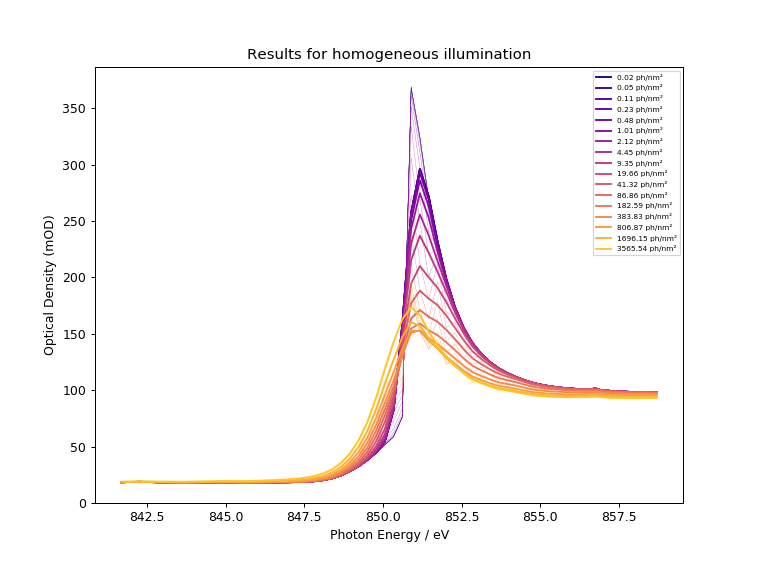

<IPython.core.display.Javascript object>


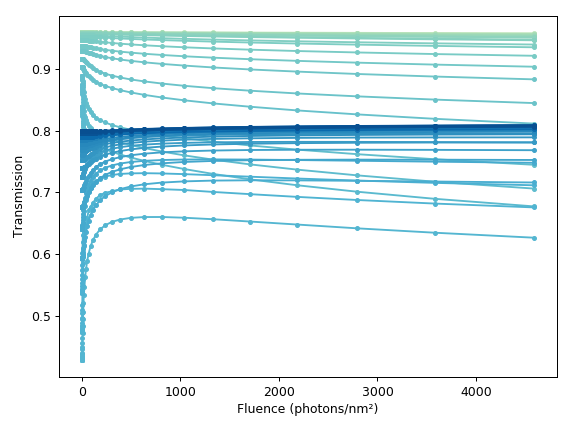

In [34]:
T = fl_dep_spectrum_T/fl_dep_spectrum_I
import matplotlib as mpl
plotcols =  mpl.cm.plasma(np.linspace(.0,0.9,N_local_fluences_to_calculate))#YlOrRd_r

#fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
plt.figure()


dE = np.mean(enax_rel[1:]-enax_rel[:-1])
aufl = 0.3

for i in range(N_local_fluences_to_calculate):
    if np.mod(i,3)==0:
        spec = 1e3*np.log10(1/T[:,i])
        spec_sm = sc.ndimage.gaussian_filter(spec,aufl/dE)
        plt.plot(enax_abs,spec, color = plotcols[i], lw=0.2)
        plt.plot(enax_abs,spec_sm, color = plotcols[i], label = f'{fluences_simulated[i]*XNLdyn.photons_per_J(PAR.E_i_abs[0]):.2f} ph/nm²')
plt.legend(fontsize = 6)


plt.title('Results for homogeneous illumination')
plt.ylabel('Optical Density (mOD)')
plt.xlabel('Photon Energy / eV')

plt.figure()

plt.xlabel('Fluence (photons/nm²)')
plt.ylabel('Transmission')
plotcols2 =  mpl.cm.GnBu(np.linspace(.2,0.95,N_points_E))#YlOrRd_r

for i in range(N_points_E):
    plt.plot(fluences_simulated*XNLdyn.photons_per_J(850), T[i,:], '.-', color = plotcols2[i])#, label ='For one z-stack'

#plt.xscale('log')
#plt.legend(loc = 'lower right')
plt.tight_layout()




In [67]:
final_transmissions.shape

(62, 30)

In [66]:
final_incidence_check.shape

(62, 30)

<IPython.core.display.Javascript object>


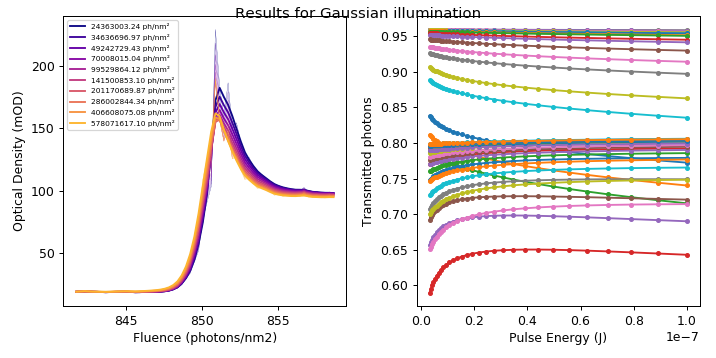

In [35]:
# These are the pulse energies for which we evaluate stuff
final_pulse_energies = np.logspace(np.log10(1/N_pulse_energies), np.log10(1), N_pulse_energies)* pulse_energy_max

final_transmissions = np.zeros((N_points_E, N_pulse_energies))
final_incidence_check = np.zeros((N_points_E, N_pulse_energies))
for i_photen in range(N_points_E):

    for ipe, pulse_en in enumerate(final_pulse_energies*XNLdyn.photons_per_J(enax_abs[i_photen])):
        local_fluences, dA = XNLdyn.calculate_fluences(Nsteps_r, pulse_en, pulse_profile_sigma)
        
        
        local_transmitted = np.interp(local_fluences, fluences_simulated*XNLdyn.photons_per_J(enax_abs[i_photen]),
                                      fl_dep_spectrum_T[i_photen,:])# tr[:, 0]
        final_transmissions[i_photen,ipe] = np.sum(local_transmitted*dA)

        
        local_incidence_check = np.interp(local_fluences, fluences_simulated*XNLdyn.photons_per_J(enax_abs[i_photen]),
                                          fl_dep_spectrum_I[i_photen,:])

        final_incidence_check[i_photen,ipe] = np.sum(local_incidence_check*dA) # should result equal final_pulse_energies

        
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
fig.suptitle('Results for Gaussian illumination')

plt.sca(ax1)

plotcols =  mpl.cm.plasma(np.linspace(.0,0.9,N_pulse_energies))#YlOrRd_r
for i in range(N_pulse_energies):
    if np.mod(i,3)==0:
        spec = 1e3*np.log10(final_incidence_check[:,i]/final_transmissions[:,i])
        spec_sm = sc.ndimage.gaussian_filter(spec,aufl/dE)
        ax1.plot(enax_abs, spec, color = plotcols[i], lw=0.2)#, label ='For one z-stack'

        ax1.plot(enax_abs, spec_sm, color = plotcols[i], label = f'{final_pulse_energies[i]*XNLdyn.photons_per_J(PAR.E_i_abs[0]):.2f} ph/nm²')#, label ='For one z-stack'
plt.xlabel('Fluence (photons/nm2)')
plt.ylabel('Optical Density (mOD)')
ax1.legend(fontsize = 6)

plt.sca(ax2)
plt.plot(final_pulse_energies, (final_transmissions/final_incidence_check).T, '.-')

plt.xlabel('Pulse Energy (J)')
plt.ylabel('Transmitted photons')
#plt.legend(loc = 'lower left')
plt.tight_layout()

<IPython.core.display.Javascript object>


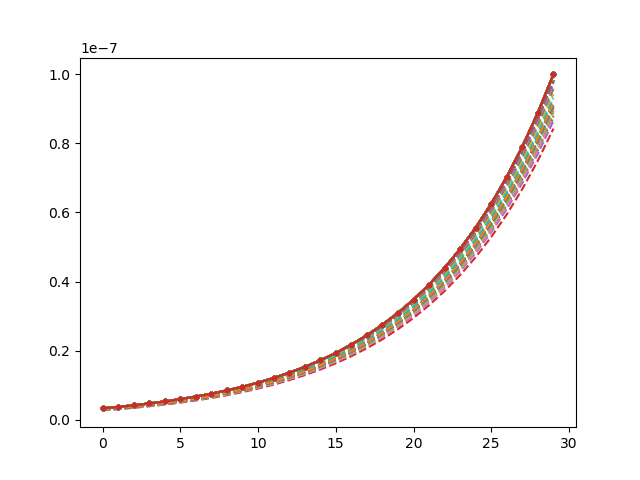

In [20]:
plt.figure()
plt.plot((1/XNLdyn.photons_per_J(enax_abs))*final_transmissions.T,'--')
plt.plot((1/XNLdyn.photons_per_J(enax_abs))*final_incidence_check.T,'.-')
#plt.plot(final_pulse_energies,'x')